# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 71288 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.all)


  0% (    1 of 71288) |          | Elapsed Time: 0:00:27 ETA:  22 days, 16:07:44

  0% (   74 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:15:49

  0% (  150 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:15:30

  0% (  229 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:15:13

  0% (  307 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:15:07

  0% (  385 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:15:01

  0% (  457 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:15:10

  0% (  535 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:15:06

  0% (  617 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:14:56

  0% (  696 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:14:53

  1% (  777 of 71288) |                    | Elapsed Time: 0:00:37 ETA:  0:14:42

  1% (  850 of 71288) |                    | Elapsed Time: 0:00:38 ETA:  0:14:45

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:39 ETA:  0:14:47

  1% (  971 of 71288) |                    | Elapsed Time: 0:00:40 ETA:  0:14:43

  1% ( 1052 of 71288) |                    | Elapsed Time: 0:00:41 ETA:  0:14:39

  1% ( 1134 of 71288) |                    | Elapsed Time: 0:00:42 ETA:  0:14:24

  1% ( 1215 of 71288) |                    | Elapsed Time: 0:00:43 ETA:  0:14:19

  1% ( 1286 of 71288) |                    | Elapsed Time: 0:00:44 ETA:  0:14:33

  1% ( 1368 of 71288) |                    | Elapsed Time: 0:00:45 ETA:  0:14:28

  2% ( 1432 of 71288) |                    | Elapsed Time: 0:00:46 ETA:  0:14:50

  2% ( 1506 of 71288) |                    | Elapsed Time: 0:00:47 ETA:  0:14:48

  2% ( 1587 of 71288) |                    | Elapsed Time: 0:00:48 ETA:  0:14:41

  2% ( 1667 of 71288) |                    | Elapsed Time: 0:00:49 ETA:  0:14:38

  2% ( 1747 of 71288) |                    | Elapsed Time: 0:00:50 ETA:  0:14:37

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:50 ETA:  0:14:57

  2% ( 1844 of 71288) |                    | Elapsed Time: 0:00:51 ETA:  0:15:27

  2% ( 1925 of 71288) |                    | Elapsed Time: 0:00:52 ETA:  0:15:20

  2% ( 1982 of 71288) |                    | Elapsed Time: 0:00:53 ETA:  0:15:59

  2% ( 2018 of 71288) |                    | Elapsed Time: 0:00:55 ETA:  0:17:41

  2% ( 2083 of 71288) |                    | Elapsed Time: 0:00:56 ETA:  0:17:58

  3% ( 2151 of 71288) |                    | Elapsed Time: 0:00:57 ETA:  0:18:23

  3% ( 2214 of 71288) |                    | Elapsed Time: 0:00:58 ETA:  0:18:58

  3% ( 2280 of 71288) |                    | Elapsed Time: 0:00:59 ETA:  0:19:30

  3% ( 2348 of 71288) |                    | Elapsed Time: 0:01:00 ETA:  0:19:12

  3% ( 2418 of 71288) |                    | Elapsed Time: 0:01:01 ETA:  0:18:51

  3% ( 2488 of 71288) |                    | Elapsed Time: 0:01:02 ETA:  0:19:01

  3% ( 2558 of 71288) |                    | Elapsed Time: 0:01:03 ETA:  0:18:34

  3% ( 2616 of 71288) |                    | Elapsed Time: 0:01:04 ETA:  0:16:56

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:01:05 ETA:  0:17:38

  3% ( 2737 of 71288) |                    | Elapsed Time: 0:01:06 ETA:  0:17:37

  3% ( 2813 of 71288) |                    | Elapsed Time: 0:01:07 ETA:  0:17:14

  4% ( 2889 of 71288) |                    | Elapsed Time: 0:01:08 ETA:  0:16:57

  4% ( 2967 of 71288) |                    | Elapsed Time: 0:01:09 ETA:  0:16:42

  4% ( 3047 of 71288) |                    | Elapsed Time: 0:01:10 ETA:  0:16:22

  4% ( 3119 of 71288) |                    | Elapsed Time: 0:01:11 ETA:  0:16:17

  4% ( 3201 of 71288) |                    | Elapsed Time: 0:01:12 ETA:  0:15:31

  4% ( 3275 of 71288) |                    | Elapsed Time: 0:01:13 ETA:  0:14:43

  4% ( 3356 of 71288) |                    | Elapsed Time: 0:01:14 ETA:  0:14:32

  4% ( 3436 of 71288) |                    | Elapsed Time: 0:01:15 ETA:  0:14:09

  4% ( 3513 of 71288) |                    | Elapsed Time: 0:01:16 ETA:  0:14:06

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:01:17 ETA:  0:14:03

  5% ( 3654 of 71288) |#                   | Elapsed Time: 0:01:18 ETA:  0:13:46

  5% ( 3746 of 71288) |#                   | Elapsed Time: 0:01:19 ETA:  0:13:30

  5% ( 3837 of 71288) |#                   | Elapsed Time: 0:01:20 ETA:  0:13:05

  5% ( 3918 of 71288) |#                   | Elapsed Time: 0:01:21 ETA:  0:13:05

  5% ( 4008 of 71288) |#                   | Elapsed Time: 0:01:22 ETA:  0:12:44

  5% ( 4099 of 71288) |#                   | Elapsed Time: 0:01:23 ETA:  0:12:32

  5% ( 4188 of 71288) |#                   | Elapsed Time: 0:01:24 ETA:  0:12:21

  5% ( 4270 of 71288) |#                   | Elapsed Time: 0:01:25 ETA:  0:12:14

  6% ( 4349 of 71288) |#                   | Elapsed Time: 0:01:26 ETA:  0:12:15

  6% ( 4432 of 71288) |#                   | Elapsed Time: 0:01:27 ETA:  0:12:21

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:01:27 ETA:  0:12:31

  6% ( 4517 of 71288) |#                   | Elapsed Time: 0:01:28 ETA:  0:13:07

  6% ( 4597 of 71288) |#                   | Elapsed Time: 0:01:29 ETA:  0:13:08

  6% ( 4679 of 71288) |#                   | Elapsed Time: 0:01:30 ETA:  0:13:17

  6% ( 4762 of 71288) |#                   | Elapsed Time: 0:01:31 ETA:  0:13:27

  6% ( 4844 of 71288) |#                   | Elapsed Time: 0:01:32 ETA:  0:13:36

  6% ( 4912 of 71288) |#                   | Elapsed Time: 0:01:33 ETA:  0:13:55

  6% ( 4977 of 71288) |#                   | Elapsed Time: 0:01:34 ETA:  0:14:15

  7% ( 5045 of 71288) |#                   | Elapsed Time: 0:01:35 ETA:  0:14:37

  7% ( 5127 of 71288) |#                   | Elapsed Time: 0:01:36 ETA:  0:14:24

  7% ( 5206 of 71288) |#                   | Elapsed Time: 0:01:37 ETA:  0:14:00

  7% ( 5267 of 71288) |#                   | Elapsed Time: 0:01:38 ETA:  0:14:26

  7% ( 5329 of 71288) |#                   | Elapsed Time: 0:01:39 ETA:  0:14:55

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:40 ETA:  0:15:16

  7% ( 5390 of 71288) |#                   | Elapsed Time: 0:01:41 ETA:  0:18:05

  7% ( 5454 of 71288) |#                   | Elapsed Time: 0:01:42 ETA:  0:18:12

  7% ( 5510 of 71288) |#                   | Elapsed Time: 0:01:43 ETA:  0:18:31

  7% ( 5572 of 71288) |#                   | Elapsed Time: 0:01:44 ETA:  0:18:44

  7% ( 5629 of 71288) |#                   | Elapsed Time: 0:01:45 ETA:  0:19:47

  7% ( 5695 of 71288) |#                   | Elapsed Time: 0:01:46 ETA:  0:20:19

  8% ( 5763 of 71288) |#                   | Elapsed Time: 0:01:47 ETA:  0:19:58

  8% ( 5855 of 71288) |#                   | Elapsed Time: 0:01:48 ETA:  0:18:42

  8% ( 5938 of 71288) |#                   | Elapsed Time: 0:01:49 ETA:  0:17:55

  8% ( 6020 of 71288) |#                   | Elapsed Time: 0:01:50 ETA:  0:15:16

  8% ( 6098 of 71288) |#                   | Elapsed Time: 0:01:51 ETA:  0:14:53

  8% ( 6171 of 71288) |#                   | Elapsed Time: 0:01:52 ETA:  0:14:27

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:53 ETA:  0:14:07

  8% ( 6314 of 71288) |#                   | Elapsed Time: 0:01:54 ETA:  0:13:36

  8% ( 6389 of 71288) |#                   | Elapsed Time: 0:01:55 ETA:  0:13:23

  9% ( 6465 of 71288) |#                   | Elapsed Time: 0:01:56 ETA:  0:13:12

  9% ( 6542 of 71288) |#                   | Elapsed Time: 0:01:57 ETA:  0:13:31

  9% ( 6601 of 71288) |#                   | Elapsed Time: 0:01:58 ETA:  0:14:02

  9% ( 6679 of 71288) |#                   | Elapsed Time: 0:01:59 ETA:  0:14:07

  9% ( 6756 of 71288) |#                   | Elapsed Time: 0:02:00 ETA:  0:14:08

  9% ( 6831 of 71288) |#                   | Elapsed Time: 0:02:01 ETA:  0:14:03

  9% ( 6901 of 71288) |#                   | Elapsed Time: 0:02:02 ETA:  0:14:09

  9% ( 6988 of 71288) |#                   | Elapsed Time: 0:02:03 ETA:  0:13:52

  9% ( 7065 of 71288) |#                   | Elapsed Time: 0:02:04 ETA:  0:13:48

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:02:05 ETA:  0:13:58

 10% ( 7208 of 71288) |##                  | Elapsed Time: 0:02:06 ETA:  0:13:54

 10% ( 7282 of 71288) |##                  | Elapsed Time: 0:02:07 ETA:  0:13:34

 10% ( 7361 of 71288) |##                  | Elapsed Time: 0:02:08 ETA:  0:13:31

 10% ( 7439 of 71288) |##                  | Elapsed Time: 0:02:09 ETA:  0:13:29

 10% ( 7518 of 71288) |##                  | Elapsed Time: 0:02:10 ETA:  0:13:23

 10% ( 7596 of 71288) |##                  | Elapsed Time: 0:02:11 ETA:  0:13:13

 10% ( 7675 of 71288) |##                  | Elapsed Time: 0:02:12 ETA:  0:13:23

 10% ( 7748 of 71288) |##                  | Elapsed Time: 0:02:13 ETA:  0:13:28

 10% ( 7824 of 71288) |##                  | Elapsed Time: 0:02:14 ETA:  0:13:17

 11% ( 7904 of 71288) |##                  | Elapsed Time: 0:02:15 ETA:  0:13:14

 11% ( 7985 of 71288) |##                  | Elapsed Time: 0:02:16 ETA:  0:13:03

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:02:17 ETA:  0:13:04

 11% ( 8099 of 71288) |##                  | Elapsed Time: 0:02:18 ETA:  0:13:02

 11% ( 8175 of 71288) |##                  | Elapsed Time: 0:02:19 ETA:  0:13:05

 11% ( 8256 of 71288) |##                  | Elapsed Time: 0:02:20 ETA:  0:13:00

 11% ( 8333 of 71288) |##                  | Elapsed Time: 0:02:21 ETA:  0:13:01

 11% ( 8413 of 71288) |##                  | Elapsed Time: 0:02:22 ETA:  0:12:50

 11% ( 8494 of 71288) |##                  | Elapsed Time: 0:02:23 ETA:  0:12:42

 12% ( 8571 of 71288) |##                  | Elapsed Time: 0:02:24 ETA:  0:12:45

 12% ( 8652 of 71288) |##                  | Elapsed Time: 0:02:25 ETA:  0:12:44

 12% ( 8732 of 71288) |##                  | Elapsed Time: 0:02:26 ETA:  0:12:40

 12% ( 8812 of 71288) |##                  | Elapsed Time: 0:02:27 ETA:  0:12:37

 12% ( 8891 of 71288) |##                  | Elapsed Time: 0:02:28 ETA:  0:12:31

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:02:28 ETA:  0:12:36

 12% ( 8991 of 71288) |##                  | Elapsed Time: 0:02:29 ETA:  0:12:34

 12% ( 9077 of 71288) |##                  | Elapsed Time: 0:02:30 ETA:  0:12:25

 12% ( 9162 of 71288) |##                  | Elapsed Time: 0:02:31 ETA:  0:12:19

 12% ( 9246 of 71288) |##                  | Elapsed Time: 0:02:32 ETA:  0:12:08

 13% ( 9329 of 71288) |##                  | Elapsed Time: 0:02:33 ETA:  0:12:04

 13% ( 9415 of 71288) |##                  | Elapsed Time: 0:02:34 ETA:  0:11:56

 13% ( 9501 of 71288) |##                  | Elapsed Time: 0:02:35 ETA:  0:11:48

 13% ( 9569 of 71288) |##                  | Elapsed Time: 0:02:37 ETA:  0:13:59

 13% ( 9652 of 71288) |##                  | Elapsed Time: 0:02:38 ETA:  0:13:42

 13% ( 9735 of 71288) |##                  | Elapsed Time: 0:02:39 ETA:  0:13:35

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:02:40 ETA:  0:13:44

 13% ( 9885 of 71288) |##                  | Elapsed Time: 0:02:41 ETA:  0:13:46

 13% ( 9969 of 71288) |##                  | Elapsed Time: 0:02:42 ETA:  0:13:45

 14% (10046 of 71288) |##                  | Elapsed Time: 0:02:43 ETA:  0:13:52

 14% (10129 of 71288) |##                  | Elapsed Time: 0:02:44 ETA:  0:13:56

 14% (10210 of 71288) |##                  | Elapsed Time: 0:02:45 ETA:  0:14:01

 14% (10298 of 71288) |##                  | Elapsed Time: 0:02:46 ETA:  0:11:43

 14% (10379 of 71288) |##                  | Elapsed Time: 0:02:47 ETA:  0:11:44

 14% (10466 of 71288) |##                  | Elapsed Time: 0:02:48 ETA:  0:11:38

 14% (10555 of 71288) |##                  | Elapsed Time: 0:02:49 ETA:  0:11:27

 14% (10643 of 71288) |##                  | Elapsed Time: 0:02:50 ETA:  0:11:24

 15% (10694 of 71288) |###                 | Elapsed Time: 0:02:51 ETA:  0:11:25

 15% (10773 of 71288) |###                 | Elapsed Time: 0:02:52 ETA:  0:11:21

 15% (10858 of 71288) |###                 | Elapsed Time: 0:02:53 ETA:  0:11:18

 15% (10942 of 71288) |###                 | Elapsed Time: 0:02:54 ETA:  0:11:14

 15% (11025 of 71288) |###                 | Elapsed Time: 0:02:55 ETA:  0:11:19

 15% (11107 of 71288) |###                 | Elapsed Time: 0:02:56 ETA:  0:11:17

 15% (11191 of 71288) |###                 | Elapsed Time: 0:02:57 ETA:  0:11:21

 15% (11274 of 71288) |###                 | Elapsed Time: 0:02:58 ETA:  0:11:27

 15% (11358 of 71288) |###                 | Elapsed Time: 0:02:59 ETA:  0:11:25

 16% (11423 of 71288) |###                 | Elapsed Time: 0:03:00 ETA:  0:11:46

 16% (11500 of 71288) |###                 | Elapsed Time: 0:03:01 ETA:  0:11:47

 16% (11585 of 71288) |###                 | Elapsed Time: 0:03:02 ETA:  0:11:57

 16% (11668 of 71288) |###                 | Elapsed Time: 0:03:03 ETA:  0:11:55

 16% (11749 of 71288) |###                 | Elapsed Time: 0:03:04 ETA:  0:11:55

 16% (11829 of 71288) |###                 | Elapsed Time: 0:03:05 ETA:  0:12:00

 16% (11911 of 71288) |###                 | Elapsed Time: 0:03:06 ETA:  0:12:00

 16% (11994 of 71288) |###                 | Elapsed Time: 0:03:07 ETA:  0:12:00

 16% (12077 of 71288) |###                 | Elapsed Time: 0:03:08 ETA:  0:11:35

 17% (12161 of 71288) |###                 | Elapsed Time: 0:03:09 ETA:  0:11:25

 17% (12240 of 71288) |###                 | Elapsed Time: 0:03:10 ETA:  0:11:25

 17% (12319 of 71288) |###                 | Elapsed Time: 0:03:11 ETA:  0:11:27

 17% (12403 of 71288) |###                 | Elapsed Time: 0:03:12 ETA:  0:11:25

 17% (12476 of 71288) |###                 | Elapsed Time: 0:03:13 ETA:  0:11:24

 17% (12560 of 71288) |###                 | Elapsed Time: 0:03:14 ETA:  0:11:17

 17% (12633 of 71288) |###                 | Elapsed Time: 0:03:15 ETA:  0:11:28

 17% (12714 of 71288) |###                 | Elapsed Time: 0:03:16 ETA:  0:11:29

 17% (12797 of 71288) |###                 | Elapsed Time: 0:03:17 ETA:  0:11:28

 18% (12877 of 71288) |###                 | Elapsed Time: 0:03:18 ETA:  0:11:32

 18% (12957 of 71288) |###                 | Elapsed Time: 0:03:19 ETA:  0:11:29

 18% (13039 of 71288) |###                 | Elapsed Time: 0:03:20 ETA:  0:11:25

 18% (13123 of 71288) |###                 | Elapsed Time: 0:03:21 ETA:  0:11:24

 18% (13208 of 71288) |###                 | Elapsed Time: 0:03:22 ETA:  0:11:18

 18% (13291 of 71288) |###                 | Elapsed Time: 0:03:23 ETA:  0:11:19

 18% (13367 of 71288) |###                 | Elapsed Time: 0:03:24 ETA:  0:11:06

 18% (13449 of 71288) |###                 | Elapsed Time: 0:03:25 ETA:  0:11:04

 18% (13528 of 71288) |###                 | Elapsed Time: 0:03:26 ETA:  0:11:08

 19% (13607 of 71288) |###                 | Elapsed Time: 0:03:27 ETA:  0:11:08

 19% (13681 of 71288) |###                 | Elapsed Time: 0:03:28 ETA:  0:11:15

 19% (13761 of 71288) |###                 | Elapsed Time: 0:03:29 ETA:  0:11:17

 19% (13836 of 71288) |###                 | Elapsed Time: 0:03:30 ETA:  0:11:27

 19% (13905 of 71288) |###                 | Elapsed Time: 0:03:31 ETA:  0:11:48

 19% (13978 of 71288) |###                 | Elapsed Time: 0:03:32 ETA:  0:12:00

 19% (14055 of 71288) |###                 | Elapsed Time: 0:03:33 ETA:  0:12:06

 19% (14137 of 71288) |###                 | Elapsed Time: 0:03:34 ETA:  0:12:04

 19% (14221 of 71288) |###                 | Elapsed Time: 0:03:35 ETA:  0:11:57

 20% (14258 of 71288) |####                | Elapsed Time: 0:03:36 ETA:  0:11:57

 20% (14341 of 71288) |####                | Elapsed Time: 0:03:37 ETA:  0:11:44

 20% (14418 of 71288) |####                | Elapsed Time: 0:03:38 ETA:  0:11:47

 20% (14500 of 71288) |####                | Elapsed Time: 0:03:39 ETA:  0:11:36

 20% (14577 of 71288) |####                | Elapsed Time: 0:03:40 ETA:  0:11:23

 20% (14660 of 71288) |####                | Elapsed Time: 0:03:41 ETA:  0:11:08

 20% (14730 of 71288) |####                | Elapsed Time: 0:03:42 ETA:  0:11:17

 20% (14772 of 71288) |####                | Elapsed Time: 0:03:44 ETA:  0:14:35

 20% (14841 of 71288) |####                | Elapsed Time: 0:03:45 ETA:  0:15:00

 20% (14898 of 71288) |####                | Elapsed Time: 0:03:46 ETA:  0:15:24

 20% (14970 of 71288) |####                | Elapsed Time: 0:03:47 ETA:  0:15:42

 21% (15043 of 71288) |####                | Elapsed Time: 0:03:48 ETA:  0:15:48

 21% (15117 of 71288) |####                | Elapsed Time: 0:03:49 ETA:  0:16:03

 21% (15149 of 71288) |####                | Elapsed Time: 0:03:49 ETA:  0:16:25

 21% (15224 of 71288) |####                | Elapsed Time: 0:03:50 ETA:  0:16:42

 21% (15296 of 71288) |####                | Elapsed Time: 0:03:51 ETA:  0:16:36

 21% (15374 of 71288) |####                | Elapsed Time: 0:03:52 ETA:  0:12:50

 21% (15453 of 71288) |####                | Elapsed Time: 0:03:53 ETA:  0:12:34

 21% (15527 of 71288) |####                | Elapsed Time: 0:03:54 ETA:  0:12:06

 21% (15604 of 71288) |####                | Elapsed Time: 0:03:55 ETA:  0:11:57

 21% (15673 of 71288) |####                | Elapsed Time: 0:03:56 ETA:  0:12:04

 22% (15750 of 71288) |####                | Elapsed Time: 0:03:57 ETA:  0:11:58

 22% (15827 of 71288) |####                | Elapsed Time: 0:03:59 ETA:  0:11:53

 22% (15898 of 71288) |####                | Elapsed Time: 0:04:00 ETA:  0:11:58

 22% (15973 of 71288) |####                | Elapsed Time: 0:04:01 ETA:  0:11:53

 22% (16040 of 71288) |####                | Elapsed Time: 0:04:02 ETA:  0:12:28

 22% (16123 of 71288) |####                | Elapsed Time: 0:04:03 ETA:  0:12:12

 22% (16208 of 71288) |####                | Elapsed Time: 0:04:04 ETA:  0:11:58

 22% (16292 of 71288) |####                | Elapsed Time: 0:04:05 ETA:  0:11:33

 22% (16377 of 71288) |####                | Elapsed Time: 0:04:06 ETA:  0:11:20

 23% (16462 of 71288) |####                | Elapsed Time: 0:04:07 ETA:  0:11:08

 23% (16546 of 71288) |####                | Elapsed Time: 0:04:08 ETA:  0:10:48

 23% (16627 of 71288) |####                | Elapsed Time: 0:04:09 ETA:  0:10:39

 23% (16713 of 71288) |####                | Elapsed Time: 0:04:10 ETA:  0:10:03

 23% (16798 of 71288) |####                | Elapsed Time: 0:04:11 ETA:  0:10:00

 23% (16878 of 71288) |####                | Elapsed Time: 0:04:12 ETA:  0:10:03

 23% (16931 of 71288) |####                | Elapsed Time: 0:04:12 ETA:  0:10:03

 23% (17000 of 71288) |####                | Elapsed Time: 0:04:13 ETA:  0:10:20

 23% (17078 of 71288) |####                | Elapsed Time: 0:04:14 ETA:  0:10:28

 24% (17149 of 71288) |####                | Elapsed Time: 0:04:15 ETA:  0:10:45

 24% (17230 of 71288) |####                | Elapsed Time: 0:04:16 ETA:  0:10:48

 24% (17311 of 71288) |####                | Elapsed Time: 0:04:17 ETA:  0:10:46

 24% (17391 of 71288) |####                | Elapsed Time: 0:04:18 ETA:  0:10:53

 24% (17474 of 71288) |####                | Elapsed Time: 0:04:19 ETA:  0:10:55

 24% (17563 of 71288) |####                | Elapsed Time: 0:04:20 ETA:  0:10:42

 24% (17652 of 71288) |####                | Elapsed Time: 0:04:21 ETA:  0:10:32

 24% (17724 of 71288) |####                | Elapsed Time: 0:04:22 ETA:  0:10:28

 24% (17802 of 71288) |####                | Elapsed Time: 0:04:23 ETA:  0:10:30

 25% (17823 of 71288) |#####               | Elapsed Time: 0:04:24 ETA:  0:10:19

 25% (17902 of 71288) |#####               | Elapsed Time: 0:04:25 ETA:  0:10:21

 25% (17982 of 71288) |#####               | Elapsed Time: 0:04:26 ETA:  0:10:22

 25% (18057 of 71288) |#####               | Elapsed Time: 0:04:27 ETA:  0:10:29

 25% (18139 of 71288) |#####               | Elapsed Time: 0:04:28 ETA:  0:10:29

 25% (18223 of 71288) |#####               | Elapsed Time: 0:04:29 ETA:  0:10:35

 25% (18305 of 71288) |#####               | Elapsed Time: 0:04:30 ETA:  0:10:45

 25% (18381 of 71288) |#####               | Elapsed Time: 0:04:31 ETA:  0:10:37

 25% (18455 of 71288) |#####               | Elapsed Time: 0:04:32 ETA:  0:10:40

 26% (18535 of 71288) |#####               | Elapsed Time: 0:04:33 ETA:  0:10:36

 26% (18613 of 71288) |#####               | Elapsed Time: 0:04:34 ETA:  0:10:36

 26% (18714 of 71288) |#####               | Elapsed Time: 0:04:35 ETA:  0:10:17

 26% (18785 of 71288) |#####               | Elapsed Time: 0:04:36 ETA:  0:10:32

 26% (18866 of 71288) |#####               | Elapsed Time: 0:04:37 ETA:  0:10:36

 26% (18947 of 71288) |#####               | Elapsed Time: 0:04:38 ETA:  0:10:34

 26% (19033 of 71288) |#####               | Elapsed Time: 0:04:39 ETA:  0:10:19

 26% (19126 of 71288) |#####               | Elapsed Time: 0:04:40 ETA:  0:09:53

 26% (19217 of 71288) |#####               | Elapsed Time: 0:04:41 ETA:  0:09:38

 27% (19286 of 71288) |#####               | Elapsed Time: 0:04:42 ETA:  0:09:49

 27% (19365 of 71288) |#####               | Elapsed Time: 0:04:43 ETA:  0:09:56

 27% (19454 of 71288) |#####               | Elapsed Time: 0:04:44 ETA:  0:09:47

 27% (19539 of 71288) |#####               | Elapsed Time: 0:04:45 ETA:  0:09:29

 27% (19605 of 71288) |#####               | Elapsed Time: 0:04:46 ETA:  0:09:27

 27% (19662 of 71288) |#####               | Elapsed Time: 0:04:47 ETA:  0:09:54

 27% (19737 of 71288) |#####               | Elapsed Time: 0:04:48 ETA:  0:10:07

 27% (19814 of 71288) |#####               | Elapsed Time: 0:04:49 ETA:  0:10:27

 27% (19899 of 71288) |#####               | Elapsed Time: 0:04:50 ETA:  0:10:33

 28% (19980 of 71288) |#####               | Elapsed Time: 0:04:51 ETA:  0:10:17

 28% (20063 of 71288) |#####               | Elapsed Time: 0:04:52 ETA:  0:10:11

 28% (20153 of 71288) |#####               | Elapsed Time: 0:04:53 ETA:  0:10:09

 28% (20243 of 71288) |#####               | Elapsed Time: 0:04:54 ETA:  0:10:02

 28% (20332 of 71288) |#####               | Elapsed Time: 0:04:55 ETA:  0:09:51

 28% (20423 of 71288) |#####               | Elapsed Time: 0:04:56 ETA:  0:09:11

 28% (20496 of 71288) |#####               | Elapsed Time: 0:04:57 ETA:  0:08:54

 28% (20587 of 71288) |#####               | Elapsed Time: 0:04:58 ETA:  0:08:37

 29% (20676 of 71288) |#####               | Elapsed Time: 0:04:59 ETA:  0:08:32

 29% (20765 of 71288) |#####               | Elapsed Time: 0:05:00 ETA:  0:08:23

 29% (20854 of 71288) |#####               | Elapsed Time: 0:05:01 ETA:  0:08:16

 29% (20944 of 71288) |#####               | Elapsed Time: 0:05:02 ETA:  0:08:18

 29% (21023 of 71288) |#####               | Elapsed Time: 0:05:03 ETA:  0:08:28

 29% (21103 of 71288) |#####               | Elapsed Time: 0:05:04 ETA:  0:08:36

 29% (21168 of 71288) |#####               | Elapsed Time: 0:05:07 ETA:  0:12:28

 29% (21237 of 71288) |#####               | Elapsed Time: 0:05:08 ETA:  0:12:51

 29% (21310 of 71288) |#####               | Elapsed Time: 0:05:09 ETA:  0:13:17

 30% (21387 of 71288) |######              | Elapsed Time: 0:05:10 ETA:  0:14:35

 30% (21458 of 71288) |######              | Elapsed Time: 0:05:11 ETA:  0:15:10

 30% (21536 of 71288) |######              | Elapsed Time: 0:05:12 ETA:  0:15:31

 30% (21611 of 71288) |######              | Elapsed Time: 0:05:13 ETA:  0:15:38

 30% (21695 of 71288) |######              | Elapsed Time: 0:05:14 ETA:  0:15:29

 30% (21768 of 71288) |######              | Elapsed Time: 0:05:15 ETA:  0:10:56

 30% (21858 of 71288) |######              | Elapsed Time: 0:05:16 ETA:  0:10:22

 30% (21937 of 71288) |######              | Elapsed Time: 0:05:17 ETA:  0:10:12

 30% (22019 of 71288) |######              | Elapsed Time: 0:05:18 ETA:  0:09:51

 30% (22089 of 71288) |######              | Elapsed Time: 0:05:19 ETA:  0:10:00

 31% (22172 of 71288) |######              | Elapsed Time: 0:05:20 ETA:  0:09:44

 31% (22250 of 71288) |######              | Elapsed Time: 0:05:21 ETA:  0:09:43

 31% (22278 of 71288) |######              | Elapsed Time: 0:05:22 ETA:  0:09:40

 31% (22353 of 71288) |######              | Elapsed Time: 0:05:23 ETA:  0:09:50

 31% (22439 of 71288) |######              | Elapsed Time: 0:05:24 ETA:  0:09:31

 31% (22520 of 71288) |######              | Elapsed Time: 0:05:25 ETA:  0:09:43

 31% (22603 of 71288) |######              | Elapsed Time: 0:05:26 ETA:  0:09:38

 31% (22684 of 71288) |######              | Elapsed Time: 0:05:27 ETA:  0:09:38

 31% (22763 of 71288) |######              | Elapsed Time: 0:05:28 ETA:  0:09:25

 32% (22837 of 71288) |######              | Elapsed Time: 0:05:29 ETA:  0:09:35

 32% (22909 of 71288) |######              | Elapsed Time: 0:05:30 ETA:  0:09:43

 32% (22986 of 71288) |######              | Elapsed Time: 0:05:31 ETA:  0:09:41

 32% (23064 of 71288) |######              | Elapsed Time: 0:05:32 ETA:  0:09:37

 32% (23131 of 71288) |######              | Elapsed Time: 0:05:33 ETA:  0:10:02

 32% (23169 of 71288) |######              | Elapsed Time: 0:05:33 ETA:  0:10:16

 32% (23241 of 71288) |######              | Elapsed Time: 0:05:34 ETA:  0:10:32

 32% (23322 of 71288) |######              | Elapsed Time: 0:05:35 ETA:  0:10:30

 32% (23398 of 71288) |######              | Elapsed Time: 0:05:36 ETA:  0:10:34

 32% (23478 of 71288) |######              | Elapsed Time: 0:05:37 ETA:  0:10:24

 33% (23542 of 71288) |######              | Elapsed Time: 0:05:38 ETA:  0:10:34

 33% (23614 of 71288) |######              | Elapsed Time: 0:05:39 ETA:  0:10:41

 33% (23688 of 71288) |######              | Elapsed Time: 0:05:40 ETA:  0:10:46

 33% (23764 of 71288) |######              | Elapsed Time: 0:05:41 ETA:  0:10:34

 33% (23846 of 71288) |######              | Elapsed Time: 0:05:42 ETA:  0:10:13

 33% (23931 of 71288) |######              | Elapsed Time: 0:05:43 ETA:  0:09:55

 33% (24018 of 71288) |######              | Elapsed Time: 0:05:44 ETA:  0:09:45

 33% (24060 of 71288) |######              | Elapsed Time: 0:05:45 ETA:  0:09:38

 33% (24133 of 71288) |######              | Elapsed Time: 0:05:46 ETA:  0:09:46

 33% (24207 of 71288) |######              | Elapsed Time: 0:05:47 ETA:  0:09:31

 34% (24290 of 71288) |######              | Elapsed Time: 0:05:48 ETA:  0:09:15

 34% (24372 of 71288) |######              | Elapsed Time: 0:05:49 ETA:  0:09:03

 34% (24453 of 71288) |######              | Elapsed Time: 0:05:50 ETA:  0:08:53

 34% (24538 of 71288) |######              | Elapsed Time: 0:05:51 ETA:  0:08:48

 34% (24625 of 71288) |######              | Elapsed Time: 0:05:52 ETA:  0:08:44

 34% (24706 of 71288) |######              | Elapsed Time: 0:05:53 ETA:  0:08:51

 34% (24778 of 71288) |######              | Elapsed Time: 0:05:54 ETA:  0:09:03

 34% (24857 of 71288) |######              | Elapsed Time: 0:05:55 ETA:  0:08:54

 34% (24927 of 71288) |######              | Elapsed Time: 0:05:56 ETA:  0:08:58

 35% (24951 of 71288) |#######             | Elapsed Time: 0:05:56 ETA:  0:09:06

 35% (25011 of 71288) |#######             | Elapsed Time: 0:05:57 ETA:  0:09:37

 35% (25078 of 71288) |#######             | Elapsed Time: 0:05:58 ETA:  0:09:57

 35% (25155 of 71288) |#######             | Elapsed Time: 0:05:59 ETA:  0:10:08

 35% (25232 of 71288) |#######             | Elapsed Time: 0:06:00 ETA:  0:10:24

 35% (25306 of 71288) |#######             | Elapsed Time: 0:06:01 ETA:  0:10:35

 35% (25384 of 71288) |#######             | Elapsed Time: 0:06:02 ETA:  0:10:24

 35% (25458 of 71288) |#######             | Elapsed Time: 0:06:03 ETA:  0:10:32

 35% (25531 of 71288) |#######             | Elapsed Time: 0:06:04 ETA:  0:10:25

 35% (25607 of 71288) |#######             | Elapsed Time: 0:06:05 ETA:  0:10:18

 36% (25683 of 71288) |#######             | Elapsed Time: 0:06:06 ETA:  0:10:02

 36% (25758 of 71288) |#######             | Elapsed Time: 0:06:07 ETA:  0:09:50

 36% (25823 of 71288) |#######             | Elapsed Time: 0:06:08 ETA:  0:10:09

 36% (25842 of 71288) |#######             | Elapsed Time: 0:06:09 ETA:  0:10:14

 36% (25919 of 71288) |#######             | Elapsed Time: 0:06:10 ETA:  0:10:08

 36% (25992 of 71288) |#######             | Elapsed Time: 0:06:11 ETA:  0:10:17

 36% (26067 of 71288) |#######             | Elapsed Time: 0:06:12 ETA:  0:10:13

 36% (26144 of 71288) |#######             | Elapsed Time: 0:06:13 ETA:  0:10:07

 36% (26218 of 71288) |#######             | Elapsed Time: 0:06:14 ETA:  0:10:09

 36% (26294 of 71288) |#######             | Elapsed Time: 0:06:15 ETA:  0:09:58

 36% (26376 of 71288) |#######             | Elapsed Time: 0:06:16 ETA:  0:09:45

 37% (26457 of 71288) |#######             | Elapsed Time: 0:06:17 ETA:  0:09:17

 37% (26538 of 71288) |#######             | Elapsed Time: 0:06:18 ETA:  0:09:09

 37% (26621 of 71288) |#######             | Elapsed Time: 0:06:19 ETA:  0:08:59

 37% (26703 of 71288) |#######             | Elapsed Time: 0:06:20 ETA:  0:08:46

 37% (26734 of 71288) |#######             | Elapsed Time: 0:06:20 ETA:  0:08:38

 37% (26818 of 71288) |#######             | Elapsed Time: 0:06:21 ETA:  0:08:28

 37% (26892 of 71288) |#######             | Elapsed Time: 0:06:22 ETA:  0:08:27

 37% (26967 of 71288) |#######             | Elapsed Time: 0:06:23 ETA:  0:08:27

 37% (27040 of 71288) |#######             | Elapsed Time: 0:06:24 ETA:  0:08:39

 38% (27111 of 71288) |#######             | Elapsed Time: 0:06:25 ETA:  0:08:52

 38% (27193 of 71288) |#######             | Elapsed Time: 0:06:26 ETA:  0:08:50

 38% (27261 of 71288) |#######             | Elapsed Time: 0:06:27 ETA:  0:09:10

 38% (27340 of 71288) |#######             | Elapsed Time: 0:06:28 ETA:  0:09:13

 38% (27420 of 71288) |#######             | Elapsed Time: 0:06:29 ETA:  0:09:13

 38% (27496 of 71288) |#######             | Elapsed Time: 0:06:30 ETA:  0:09:23

 38% (27572 of 71288) |#######             | Elapsed Time: 0:06:31 ETA:  0:09:19

 38% (27625 of 71288) |#######             | Elapsed Time: 0:06:32 ETA:  0:09:20

 38% (27700 of 71288) |#######             | Elapsed Time: 0:06:33 ETA:  0:09:15

 38% (27767 of 71288) |#######             | Elapsed Time: 0:06:34 ETA:  0:09:20

 39% (27850 of 71288) |#######             | Elapsed Time: 0:06:35 ETA:  0:09:18

 39% (27925 of 71288) |#######             | Elapsed Time: 0:06:36 ETA:  0:09:07

 39% (28004 of 71288) |#######             | Elapsed Time: 0:06:37 ETA:  0:09:06

 39% (28080 of 71288) |#######             | Elapsed Time: 0:06:38 ETA:  0:09:08

 39% (28160 of 71288) |#######             | Elapsed Time: 0:06:39 ETA:  0:09:01

 39% (28239 of 71288) |#######             | Elapsed Time: 0:06:40 ETA:  0:08:55

 39% (28317 of 71288) |#######             | Elapsed Time: 0:06:41 ETA:  0:08:50

 39% (28392 of 71288) |#######             | Elapsed Time: 0:06:42 ETA:  0:08:48

 39% (28465 of 71288) |#######             | Elapsed Time: 0:06:43 ETA:  0:08:39

 40% (28516 of 71288) |########            | Elapsed Time: 0:06:44 ETA:  0:08:52

 40% (28594 of 71288) |########            | Elapsed Time: 0:06:45 ETA:  0:08:47

 40% (28674 of 71288) |########            | Elapsed Time: 0:06:46 ETA:  0:08:45

 40% (28740 of 71288) |########            | Elapsed Time: 0:06:47 ETA:  0:08:58

 40% (28807 of 71288) |########            | Elapsed Time: 0:06:48 ETA:  0:09:16

 40% (28877 of 71288) |########            | Elapsed Time: 0:06:49 ETA:  0:09:29

 40% (28945 of 71288) |########            | Elapsed Time: 0:06:50 ETA:  0:09:43

 40% (29006 of 71288) |########            | Elapsed Time: 0:06:53 ETA:  0:14:32

 40% (29079 of 71288) |########            | Elapsed Time: 0:06:54 ETA:  0:14:30

 40% (29140 of 71288) |########            | Elapsed Time: 0:06:55 ETA:  0:14:42

 40% (29214 of 71288) |########            | Elapsed Time: 0:06:56 ETA:  0:14:49

 41% (29290 of 71288) |########            | Elapsed Time: 0:06:57 ETA:  0:14:56

 41% (29355 of 71288) |########            | Elapsed Time: 0:06:58 ETA:  0:14:57

 41% (29407 of 71288) |########            | Elapsed Time: 0:06:59 ETA:  0:14:52

 41% (29486 of 71288) |########            | Elapsed Time: 0:07:00 ETA:  0:14:31

 41% (29568 of 71288) |########            | Elapsed Time: 0:07:01 ETA:  0:14:02

 41% (29644 of 71288) |########            | Elapsed Time: 0:07:02 ETA:  0:09:13

 41% (29733 of 71288) |########            | Elapsed Time: 0:07:03 ETA:  0:08:48

 41% (29817 of 71288) |########            | Elapsed Time: 0:07:04 ETA:  0:08:16

 41% (29904 of 71288) |########            | Elapsed Time: 0:07:05 ETA:  0:07:57

 42% (29979 of 71288) |########            | Elapsed Time: 0:07:06 ETA:  0:07:58

 42% (30067 of 71288) |########            | Elapsed Time: 0:07:07 ETA:  0:07:28

 42% (30151 of 71288) |########            | Elapsed Time: 0:07:08 ETA:  0:07:20

 42% (30233 of 71288) |########            | Elapsed Time: 0:07:09 ETA:  0:07:15

 42% (30298 of 71288) |########            | Elapsed Time: 0:07:10 ETA:  0:07:24

 42% (30367 of 71288) |########            | Elapsed Time: 0:07:11 ETA:  0:07:31

 42% (30443 of 71288) |########            | Elapsed Time: 0:07:12 ETA:  0:07:45

 42% (30520 of 71288) |########            | Elapsed Time: 0:07:13 ETA:  0:07:53

 42% (30597 of 71288) |########            | Elapsed Time: 0:07:14 ETA:  0:08:06

 43% (30675 of 71288) |########            | Elapsed Time: 0:07:15 ETA:  0:08:01

 43% (30761 of 71288) |########            | Elapsed Time: 0:07:16 ETA:  0:08:02

 43% (30840 of 71288) |########            | Elapsed Time: 0:07:17 ETA:  0:08:09

 43% (30922 of 71288) |########            | Elapsed Time: 0:07:18 ETA:  0:08:07

 43% (31005 of 71288) |########            | Elapsed Time: 0:07:19 ETA:  0:07:53

 43% (31093 of 71288) |########            | Elapsed Time: 0:07:20 ETA:  0:07:28

 43% (31189 of 71288) |########            | Elapsed Time: 0:07:21 ETA:  0:07:05

 43% (31267 of 71288) |########            | Elapsed Time: 0:07:22 ETA:  0:07:02

 43% (31337 of 71288) |########            | Elapsed Time: 0:07:23 ETA:  0:07:11

 44% (31422 of 71288) |########            | Elapsed Time: 0:07:24 ETA:  0:07:12

 44% (31502 of 71288) |########            | Elapsed Time: 0:07:25 ETA:  0:07:09

 44% (31575 of 71288) |########            | Elapsed Time: 0:07:26 ETA:  0:07:21

 44% (31660 of 71288) |########            | Elapsed Time: 0:07:27 ETA:  0:07:16

 44% (31726 of 71288) |########            | Elapsed Time: 0:07:28 ETA:  0:07:46

 44% (31803 of 71288) |########            | Elapsed Time: 0:07:29 ETA:  0:08:03

 44% (31888 of 71288) |########            | Elapsed Time: 0:07:30 ETA:  0:07:53

 44% (31971 of 71288) |########            | Elapsed Time: 0:07:31 ETA:  0:07:45

 44% (32054 of 71288) |########            | Elapsed Time: 0:07:32 ETA:  0:07:27

 45% (32080 of 71288) |#########           | Elapsed Time: 0:07:32 ETA:  0:07:36

 45% (32170 of 71288) |#########           | Elapsed Time: 0:07:33 ETA:  0:07:21

 45% (32241 of 71288) |#########           | Elapsed Time: 0:07:34 ETA:  0:07:22

 45% (32315 of 71288) |#########           | Elapsed Time: 0:07:35 ETA:  0:07:37

 45% (32377 of 71288) |#########           | Elapsed Time: 0:07:36 ETA:  0:07:43

 45% (32450 of 71288) |#########           | Elapsed Time: 0:07:37 ETA:  0:07:47

 45% (32524 of 71288) |#########           | Elapsed Time: 0:07:38 ETA:  0:08:01

 45% (32600 of 71288) |#########           | Elapsed Time: 0:07:39 ETA:  0:08:11

 45% (32670 of 71288) |#########           | Elapsed Time: 0:07:40 ETA:  0:08:30

 45% (32748 of 71288) |#########           | Elapsed Time: 0:07:41 ETA:  0:08:23

 46% (32834 of 71288) |#########           | Elapsed Time: 0:07:42 ETA:  0:08:28

 46% (32909 of 71288) |#########           | Elapsed Time: 0:07:43 ETA:  0:08:21

 46% (32971 of 71288) |#########           | Elapsed Time: 0:07:44 ETA:  0:08:05

 46% (33053 of 71288) |#########           | Elapsed Time: 0:07:45 ETA:  0:07:35

 46% (33125 of 71288) |#########           | Elapsed Time: 0:07:46 ETA:  0:07:36

 46% (33199 of 71288) |#########           | Elapsed Time: 0:07:47 ETA:  0:07:37

 46% (33273 of 71288) |#########           | Elapsed Time: 0:07:48 ETA:  0:07:39

 46% (33351 of 71288) |#########           | Elapsed Time: 0:07:49 ETA:  0:07:28

 46% (33430 of 71288) |#########           | Elapsed Time: 0:07:50 ETA:  0:07:26

 47% (33506 of 71288) |#########           | Elapsed Time: 0:07:51 ETA:  0:07:39

 47% (33593 of 71288) |#########           | Elapsed Time: 0:07:52 ETA:  0:07:21

 47% (33679 of 71288) |#########           | Elapsed Time: 0:07:53 ETA:  0:07:20

 47% (33766 of 71288) |#########           | Elapsed Time: 0:07:54 ETA:  0:07:12

 47% (33862 of 71288) |#########           | Elapsed Time: 0:07:55 ETA:  0:06:49

 47% (33937 of 71288) |#########           | Elapsed Time: 0:07:56 ETA:  0:06:47

 47% (34014 of 71288) |#########           | Elapsed Time: 0:07:57 ETA:  0:06:46

 47% (34099 of 71288) |#########           | Elapsed Time: 0:07:58 ETA:  0:06:37

 47% (34167 of 71288) |#########           | Elapsed Time: 0:07:59 ETA:  0:06:47

 48% (34240 of 71288) |#########           | Elapsed Time: 0:08:00 ETA:  0:07:05

 48% (34323 of 71288) |#########           | Elapsed Time: 0:08:01 ETA:  0:07:09

 48% (34396 of 71288) |#########           | Elapsed Time: 0:08:02 ETA:  0:07:29

 48% (34480 of 71288) |#########           | Elapsed Time: 0:08:03 ETA:  0:07:22

 48% (34551 of 71288) |#########           | Elapsed Time: 0:08:04 ETA:  0:07:32

 48% (34628 of 71288) |#########           | Elapsed Time: 0:08:05 ETA:  0:07:28

 48% (34690 of 71288) |#########           | Elapsed Time: 0:08:06 ETA:  0:07:49

 48% (34753 of 71288) |#########           | Elapsed Time: 0:08:07 ETA:  0:08:20

 48% (34817 of 71288) |#########           | Elapsed Time: 0:08:08 ETA:  0:08:25

 48% (34891 of 71288) |#########           | Elapsed Time: 0:08:09 ETA:  0:08:23

 49% (34968 of 71288) |#########           | Elapsed Time: 0:08:10 ETA:  0:08:31

 49% (35041 of 71288) |#########           | Elapsed Time: 0:08:11 ETA:  0:08:31

 49% (35113 of 71288) |#########           | Elapsed Time: 0:08:12 ETA:  0:08:49

 49% (35199 of 71288) |#########           | Elapsed Time: 0:08:13 ETA:  0:08:24

 49% (35284 of 71288) |#########           | Elapsed Time: 0:08:14 ETA:  0:08:10

 49% (35370 of 71288) |#########           | Elapsed Time: 0:08:15 ETA:  0:07:34

 49% (35455 of 71288) |#########           | Elapsed Time: 0:08:16 ETA:  0:07:04

 49% (35535 of 71288) |#########           | Elapsed Time: 0:08:17 ETA:  0:06:41

 49% (35607 of 71288) |#########           | Elapsed Time: 0:08:18 ETA:  0:06:42

 50% (35645 of 71288) |##########          | Elapsed Time: 0:08:19 ETA:  0:06:42

 50% (35726 of 71288) |##########          | Elapsed Time: 0:08:20 ETA:  0:06:29

 50% (35800 of 71288) |##########          | Elapsed Time: 0:08:21 ETA:  0:06:25

 50% (35871 of 71288) |##########          | Elapsed Time: 0:08:22 ETA:  0:06:45

 50% (35947 of 71288) |##########          | Elapsed Time: 0:08:23 ETA:  0:06:55

 50% (36027 of 71288) |##########          | Elapsed Time: 0:08:24 ETA:  0:07:03

 50% (36111 of 71288) |##########          | Elapsed Time: 0:08:25 ETA:  0:07:03

 50% (36193 of 71288) |##########          | Elapsed Time: 0:08:26 ETA:  0:07:00

 50% (36277 of 71288) |##########          | Elapsed Time: 0:08:27 ETA:  0:06:43

 51% (36363 of 71288) |##########          | Elapsed Time: 0:08:28 ETA:  0:06:30

 51% (36449 of 71288) |##########          | Elapsed Time: 0:08:29 ETA:  0:06:23

 51% (36536 of 71288) |##########          | Elapsed Time: 0:08:30 ETA:  0:06:07

 51% (36612 of 71288) |##########          | Elapsed Time: 0:08:31 ETA:  0:06:00

 51% (36691 of 71288) |##########          | Elapsed Time: 0:08:32 ETA:  0:05:56

 51% (36774 of 71288) |##########          | Elapsed Time: 0:08:33 ETA:  0:05:51

 51% (36851 of 71288) |##########          | Elapsed Time: 0:08:34 ETA:  0:05:59

 51% (36934 of 71288) |##########          | Elapsed Time: 0:08:35 ETA:  0:05:56

 51% (37015 of 71288) |##########          | Elapsed Time: 0:08:36 ETA:  0:05:58

 52% (37097 of 71288) |##########          | Elapsed Time: 0:08:37 ETA:  0:06:02

 52% (37170 of 71288) |##########          | Elapsed Time: 0:08:38 ETA:  0:06:17

 52% (37257 of 71288) |##########          | Elapsed Time: 0:08:39 ETA:  0:06:16

 52% (37343 of 71288) |##########          | Elapsed Time: 0:08:40 ETA:  0:06:03

 52% (37427 of 71288) |##########          | Elapsed Time: 0:08:41 ETA:  0:05:52

 52% (37509 of 71288) |##########          | Elapsed Time: 0:08:42 ETA:  0:05:52

 52% (37567 of 71288) |##########          | Elapsed Time: 0:08:43 ETA:  0:06:15

 52% (37646 of 71288) |##########          | Elapsed Time: 0:08:44 ETA:  0:06:19

 52% (37727 of 71288) |##########          | Elapsed Time: 0:08:45 ETA:  0:06:18

 53% (37806 of 71288) |##########          | Elapsed Time: 0:08:46 ETA:  0:06:21

 53% (37891 of 71288) |##########          | Elapsed Time: 0:08:47 ETA:  0:06:04

 53% (37967 of 71288) |##########          | Elapsed Time: 0:08:48 ETA:  0:06:16

 53% (38034 of 71288) |##########          | Elapsed Time: 0:08:49 ETA:  0:06:39

 53% (38117 of 71288) |##########          | Elapsed Time: 0:08:50 ETA:  0:06:43

 53% (38195 of 71288) |##########          | Elapsed Time: 0:08:51 ETA:  0:06:49

 53% (38275 of 71288) |##########          | Elapsed Time: 0:08:52 ETA:  0:06:19

 53% (38318 of 71288) |##########          | Elapsed Time: 0:08:53 ETA:  0:06:24

 53% (38401 of 71288) |##########          | Elapsed Time: 0:08:54 ETA:  0:06:24

 53% (38474 of 71288) |##########          | Elapsed Time: 0:08:55 ETA:  0:06:31

 54% (38553 of 71288) |##########          | Elapsed Time: 0:08:56 ETA:  0:06:38

 54% (38631 of 71288) |##########          | Elapsed Time: 0:08:57 ETA:  0:06:35

 54% (38717 of 71288) |##########          | Elapsed Time: 0:08:58 ETA:  0:06:09

 54% (38723 of 71288) |##########          | Elapsed Time: 0:09:01 ETA:  0:12:59

 54% (38792 of 71288) |##########          | Elapsed Time: 0:09:02 ETA:  0:13:17

 54% (38857 of 71288) |##########          | Elapsed Time: 0:09:03 ETA:  0:13:51

 54% (38919 of 71288) |##########          | Elapsed Time: 0:09:04 ETA:  0:13:54

 54% (38997 of 71288) |##########          | Elapsed Time: 0:09:05 ETA:  0:14:03

 54% (39062 of 71288) |##########          | Elapsed Time: 0:09:06 ETA:  0:14:20

 54% (39130 of 71288) |##########          | Elapsed Time: 0:09:07 ETA:  0:14:47

 55% (39209 of 71288) |###########         | Elapsed Time: 0:09:08 ETA:  0:14:39

 55% (39282 of 71288) |###########         | Elapsed Time: 0:09:09 ETA:  0:15:11

 55% (39355 of 71288) |###########         | Elapsed Time: 0:09:10 ETA:  0:07:50

 55% (39434 of 71288) |###########         | Elapsed Time: 0:09:11 ETA:  0:07:35

 55% (39515 of 71288) |###########         | Elapsed Time: 0:09:12 ETA:  0:07:10

 55% (39593 of 71288) |###########         | Elapsed Time: 0:09:13 ETA:  0:06:45

 55% (39667 of 71288) |###########         | Elapsed Time: 0:09:14 ETA:  0:06:48

 55% (39750 of 71288) |###########         | Elapsed Time: 0:09:15 ETA:  0:06:22

 55% (39824 of 71288) |###########         | Elapsed Time: 0:09:16 ETA:  0:06:12

 55% (39909 of 71288) |###########         | Elapsed Time: 0:09:17 ETA:  0:06:06

 56% (39970 of 71288) |###########         | Elapsed Time: 0:09:18 ETA:  0:06:22

 56% (40036 of 71288) |###########         | Elapsed Time: 0:09:19 ETA:  0:06:30

 56% (40100 of 71288) |###########         | Elapsed Time: 0:09:20 ETA:  0:06:35

 56% (40177 of 71288) |###########         | Elapsed Time: 0:09:21 ETA:  0:06:39

 56% (40252 of 71288) |###########         | Elapsed Time: 0:09:22 ETA:  0:06:43

 56% (40331 of 71288) |###########         | Elapsed Time: 0:09:23 ETA:  0:06:34

 56% (40398 of 71288) |###########         | Elapsed Time: 0:09:24 ETA:  0:06:57

 56% (40466 of 71288) |###########         | Elapsed Time: 0:09:25 ETA:  0:07:06

 56% (40555 of 71288) |###########         | Elapsed Time: 0:09:26 ETA:  0:06:58

 57% (40635 of 71288) |###########         | Elapsed Time: 0:09:27 ETA:  0:06:28

 57% (40707 of 71288) |###########         | Elapsed Time: 0:09:28 ETA:  0:06:19

 57% (40782 of 71288) |###########         | Elapsed Time: 0:09:29 ETA:  0:06:17

 57% (40863 of 71288) |###########         | Elapsed Time: 0:09:30 ETA:  0:06:12

 57% (40941 of 71288) |###########         | Elapsed Time: 0:09:31 ETA:  0:06:07

 57% (40991 of 71288) |###########         | Elapsed Time: 0:09:32 ETA:  0:06:03

 57% (41064 of 71288) |###########         | Elapsed Time: 0:09:33 ETA:  0:05:54

 57% (41143 of 71288) |###########         | Elapsed Time: 0:09:34 ETA:  0:05:38

 57% (41211 of 71288) |###########         | Elapsed Time: 0:09:35 ETA:  0:06:06

 57% (41301 of 71288) |###########         | Elapsed Time: 0:09:36 ETA:  0:05:50

 58% (41382 of 71288) |###########         | Elapsed Time: 0:09:37 ETA:  0:05:36

 58% (41467 of 71288) |###########         | Elapsed Time: 0:09:38 ETA:  0:05:23

 58% (41549 of 71288) |###########         | Elapsed Time: 0:09:39 ETA:  0:05:20

 58% (41627 of 71288) |###########         | Elapsed Time: 0:09:40 ETA:  0:05:20

 58% (41705 of 71288) |###########         | Elapsed Time: 0:09:41 ETA:  0:05:26

 58% (41781 of 71288) |###########         | Elapsed Time: 0:09:42 ETA:  0:05:21

 58% (41857 of 71288) |###########         | Elapsed Time: 0:09:43 ETA:  0:05:25

 58% (41882 of 71288) |###########         | Elapsed Time: 0:09:43 ETA:  0:05:15

 58% (41954 of 71288) |###########         | Elapsed Time: 0:09:45 ETA:  0:05:38

 58% (42024 of 71288) |###########         | Elapsed Time: 0:09:46 ETA:  0:05:54

 59% (42099 of 71288) |###########         | Elapsed Time: 0:09:47 ETA:  0:06:05

 59% (42178 of 71288) |###########         | Elapsed Time: 0:09:48 ETA:  0:06:09

 59% (42248 of 71288) |###########         | Elapsed Time: 0:09:49 ETA:  0:06:17

 59% (42315 of 71288) |###########         | Elapsed Time: 0:09:50 ETA:  0:06:37

 59% (42397 of 71288) |###########         | Elapsed Time: 0:09:51 ETA:  0:06:26

 59% (42477 of 71288) |###########         | Elapsed Time: 0:09:52 ETA:  0:06:19

 59% (42565 of 71288) |###########         | Elapsed Time: 0:09:53 ETA:  0:05:54

 59% (42647 of 71288) |###########         | Elapsed Time: 0:09:54 ETA:  0:05:41

 59% (42732 of 71288) |###########         | Elapsed Time: 0:09:55 ETA:  0:05:19

 60% (42773 of 71288) |############        | Elapsed Time: 0:09:55 ETA:  0:05:06

 60% (42865 of 71288) |############        | Elapsed Time: 0:09:56 ETA:  0:04:47

 60% (42947 of 71288) |############        | Elapsed Time: 0:09:57 ETA:  0:04:33

 60% (43034 of 71288) |############        | Elapsed Time: 0:09:58 ETA:  0:04:05

 60% (43121 of 71288) |############        | Elapsed Time: 0:09:59 ETA:  0:03:59

 60% (43191 of 71288) |############        | Elapsed Time: 0:10:00 ETA:  0:04:10

 60% (43269 of 71288) |############        | Elapsed Time: 0:10:01 ETA:  0:04:21

 60% (43347 of 71288) |############        | Elapsed Time: 0:10:02 ETA:  0:04:25

 60% (43423 of 71288) |############        | Elapsed Time: 0:10:03 ETA:  0:04:50

 61% (43494 of 71288) |############        | Elapsed Time: 0:10:04 ETA:  0:05:07

 61% (43563 of 71288) |############        | Elapsed Time: 0:10:05 ETA:  0:05:36

 61% (43636 of 71288) |############        | Elapsed Time: 0:10:06 ETA:  0:05:45

 61% (43664 of 71288) |############        | Elapsed Time: 0:10:07 ETA:  0:05:58

 61% (43732 of 71288) |############        | Elapsed Time: 0:10:08 ETA:  0:06:27

 61% (43803 of 71288) |############        | Elapsed Time: 0:10:09 ETA:  0:06:25

 61% (43876 of 71288) |############        | Elapsed Time: 0:10:10 ETA:  0:06:32

 61% (43961 of 71288) |############        | Elapsed Time: 0:10:11 ETA:  0:06:18

 61% (44043 of 71288) |############        | Elapsed Time: 0:10:12 ETA:  0:05:51

 61% (44125 of 71288) |############        | Elapsed Time: 0:10:13 ETA:  0:05:35

 62% (44200 of 71288) |############        | Elapsed Time: 0:10:14 ETA:  0:05:25

 62% (44281 of 71288) |############        | Elapsed Time: 0:10:15 ETA:  0:05:12

 62% (44358 of 71288) |############        | Elapsed Time: 0:10:16 ETA:  0:05:13

 62% (44440 of 71288) |############        | Elapsed Time: 0:10:17 ETA:  0:04:54

 62% (44518 of 71288) |############        | Elapsed Time: 0:10:18 ETA:  0:04:43

 62% (44556 of 71288) |############        | Elapsed Time: 0:10:18 ETA:  0:04:31

 62% (44625 of 71288) |############        | Elapsed Time: 0:10:19 ETA:  0:04:52

 62% (44693 of 71288) |############        | Elapsed Time: 0:10:20 ETA:  0:05:11

 62% (44769 of 71288) |############        | Elapsed Time: 0:10:21 ETA:  0:05:17

 62% (44846 of 71288) |############        | Elapsed Time: 0:10:22 ETA:  0:05:14

 63% (44920 of 71288) |############        | Elapsed Time: 0:10:23 ETA:  0:05:27

 63% (44996 of 71288) |############        | Elapsed Time: 0:10:24 ETA:  0:05:28

 63% (45076 of 71288) |############        | Elapsed Time: 0:10:25 ETA:  0:05:30

 63% (45154 of 71288) |############        | Elapsed Time: 0:10:26 ETA:  0:05:28

 63% (45222 of 71288) |############        | Elapsed Time: 0:10:27 ETA:  0:05:43

 63% (45293 of 71288) |############        | Elapsed Time: 0:10:28 ETA:  0:05:39

 63% (45369 of 71288) |############        | Elapsed Time: 0:10:29 ETA:  0:05:26

 63% (45447 of 71288) |############        | Elapsed Time: 0:10:30 ETA:  0:05:37

 63% (45523 of 71288) |############        | Elapsed Time: 0:10:31 ETA:  0:05:29

 63% (45606 of 71288) |############        | Elapsed Time: 0:10:32 ETA:  0:05:17

 64% (45688 of 71288) |############        | Elapsed Time: 0:10:33 ETA:  0:05:18

 64% (45759 of 71288) |############        | Elapsed Time: 0:10:34 ETA:  0:05:29

 64% (45836 of 71288) |############        | Elapsed Time: 0:10:35 ETA:  0:05:14

 64% (45913 of 71288) |############        | Elapsed Time: 0:10:36 ETA:  0:05:04

 64% (45990 of 71288) |############        | Elapsed Time: 0:10:37 ETA:  0:05:03

 64% (46065 of 71288) |############        | Elapsed Time: 0:10:38 ETA:  0:04:55

 64% (46148 of 71288) |############        | Elapsed Time: 0:10:39 ETA:  0:04:46

 64% (46228 of 71288) |############        | Elapsed Time: 0:10:40 ETA:  0:04:44

 64% (46302 of 71288) |############        | Elapsed Time: 0:10:41 ETA:  0:04:55

 65% (46338 of 71288) |#############       | Elapsed Time: 0:10:42 ETA:  0:04:51

 65% (46427 of 71288) |#############       | Elapsed Time: 0:10:43 ETA:  0:04:25

 65% (46500 of 71288) |#############       | Elapsed Time: 0:10:44 ETA:  0:04:29

 65% (46586 of 71288) |#############       | Elapsed Time: 0:10:45 ETA:  0:04:15

 65% (46667 of 71288) |#############       | Elapsed Time: 0:10:46 ETA:  0:04:09

 65% (46741 of 71288) |#############       | Elapsed Time: 0:10:47 ETA:  0:04:10

 65% (46819 of 71288) |#############       | Elapsed Time: 0:10:48 ETA:  0:04:14

 65% (46907 of 71288) |#############       | Elapsed Time: 0:10:49 ETA:  0:03:58

 65% (46993 of 71288) |#############       | Elapsed Time: 0:10:50 ETA:  0:03:42

 66% (47066 of 71288) |#############       | Elapsed Time: 0:10:51 ETA:  0:03:54

 66% (47139 of 71288) |#############       | Elapsed Time: 0:10:52 ETA:  0:04:13

 66% (47215 of 71288) |#############       | Elapsed Time: 0:10:53 ETA:  0:04:08

 66% (47229 of 71288) |#############       | Elapsed Time: 0:10:53 ETA:  0:04:20

 66% (47302 of 71288) |#############       | Elapsed Time: 0:10:54 ETA:  0:04:30

 66% (47375 of 71288) |#############       | Elapsed Time: 0:10:55 ETA:  0:04:31

 66% (47453 of 71288) |#############       | Elapsed Time: 0:10:56 ETA:  0:04:31

 66% (47533 of 71288) |#############       | Elapsed Time: 0:10:57 ETA:  0:04:42

 66% (47602 of 71288) |#############       | Elapsed Time: 0:10:58 ETA:  0:05:07

 66% (47675 of 71288) |#############       | Elapsed Time: 0:10:59 ETA:  0:05:06

 66% (47758 of 71288) |#############       | Elapsed Time: 0:11:00 ETA:  0:04:50

 67% (47840 of 71288) |#############       | Elapsed Time: 0:11:01 ETA:  0:04:40

 67% (47918 of 71288) |#############       | Elapsed Time: 0:11:02 ETA:  0:04:36

 67% (48003 of 71288) |#############       | Elapsed Time: 0:11:03 ETA:  0:04:18

 67% (48079 of 71288) |#############       | Elapsed Time: 0:11:04 ETA:  0:04:13

 67% (48120 of 71288) |#############       | Elapsed Time: 0:11:05 ETA:  0:04:09

 67% (48201 of 71288) |#############       | Elapsed Time: 0:11:06 ETA:  0:04:06

 67% (48282 of 71288) |#############       | Elapsed Time: 0:11:07 ETA:  0:03:50

 67% (48363 of 71288) |#############       | Elapsed Time: 0:11:08 ETA:  0:03:39

 67% (48434 of 71288) |#############       | Elapsed Time: 0:11:09 ETA:  0:03:53

 68% (48510 of 71288) |#############       | Elapsed Time: 0:11:10 ETA:  0:04:00

 68% (48593 of 71288) |#############       | Elapsed Time: 0:11:11 ETA:  0:03:51

 68% (48663 of 71288) |#############       | Elapsed Time: 0:11:12 ETA:  0:04:09

 68% (48745 of 71288) |#############       | Elapsed Time: 0:11:13 ETA:  0:04:01

 68% (48827 of 71288) |#############       | Elapsed Time: 0:11:14 ETA:  0:03:58

 68% (48908 of 71288) |#############       | Elapsed Time: 0:11:15 ETA:  0:03:57

 68% (48974 of 71288) |#############       | Elapsed Time: 0:11:16 ETA:  0:04:15

 68% (49011 of 71288) |#############       | Elapsed Time: 0:11:16 ETA:  0:04:18

 68% (49097 of 71288) |#############       | Elapsed Time: 0:11:17 ETA:  0:03:56

 68% (49171 of 71288) |#############       | Elapsed Time: 0:11:18 ETA:  0:03:57

 69% (49240 of 71288) |#############       | Elapsed Time: 0:11:19 ETA:  0:04:16

 69% (49324 of 71288) |#############       | Elapsed Time: 0:11:20 ETA:  0:03:55

 69% (49401 of 71288) |#############       | Elapsed Time: 0:11:21 ETA:  0:04:01

 69% (49490 of 71288) |#############       | Elapsed Time: 0:11:22 ETA:  0:03:50

 69% (49559 of 71288) |#############       | Elapsed Time: 0:11:23 ETA:  0:04:05

 69% (49635 of 71288) |#############       | Elapsed Time: 0:11:24 ETA:  0:03:50

 69% (49706 of 71288) |#############       | Elapsed Time: 0:11:25 ETA:  0:04:01

 69% (49780 of 71288) |#############       | Elapsed Time: 0:11:26 ETA:  0:04:17

 69% (49860 of 71288) |#############       | Elapsed Time: 0:11:27 ETA:  0:04:12

 70% (49902 of 71288) |##############      | Elapsed Time: 0:11:28 ETA:  0:04:00

 70% (49978 of 71288) |##############      | Elapsed Time: 0:11:29 ETA:  0:04:11

 70% (50062 of 71288) |##############      | Elapsed Time: 0:11:30 ETA:  0:04:00

 70% (50136 of 71288) |##############      | Elapsed Time: 0:11:31 ETA:  0:04:21

 70% (50215 of 71288) |##############      | Elapsed Time: 0:11:32 ETA:  0:04:06

 70% (50294 of 71288) |##############      | Elapsed Time: 0:11:33 ETA:  0:04:01

 70% (50371 of 71288) |##############      | Elapsed Time: 0:11:34 ETA:  0:03:51

 70% (50438 of 71288) |##############      | Elapsed Time: 0:11:35 ETA:  0:04:00

 70% (50511 of 71288) |##############      | Elapsed Time: 0:11:36 ETA:  0:04:08

 70% (50595 of 71288) |##############      | Elapsed Time: 0:11:37 ETA:  0:03:57

 71% (50675 of 71288) |##############      | Elapsed Time: 0:11:38 ETA:  0:03:51

 71% (50702 of 71288) |##############      | Elapsed Time: 0:11:42 ETA:  0:11:27

 71% (50775 of 71288) |##############      | Elapsed Time: 0:11:43 ETA:  0:11:27

 71% (50793 of 71288) |##############      | Elapsed Time: 0:11:44 ETA:  0:12:30

 71% (50859 of 71288) |##############      | Elapsed Time: 0:11:45 ETA:  0:13:03

 71% (50929 of 71288) |##############      | Elapsed Time: 0:11:46 ETA:  0:13:20

 71% (51004 of 71288) |##############      | Elapsed Time: 0:11:47 ETA:  0:12:57

 71% (51074 of 71288) |##############      | Elapsed Time: 0:11:48 ETA:  0:13:01

 71% (51142 of 71288) |##############      | Elapsed Time: 0:11:49 ETA:  0:13:44

 71% (51207 of 71288) |##############      | Elapsed Time: 0:11:50 ETA:  0:14:25

 71% (51281 of 71288) |##############      | Elapsed Time: 0:11:51 ETA:  0:05:20

 72% (51362 of 71288) |##############      | Elapsed Time: 0:11:52 ETA:  0:05:05

 72% (51437 of 71288) |##############      | Elapsed Time: 0:11:53 ETA:  0:04:50

 72% (51510 of 71288) |##############      | Elapsed Time: 0:11:54 ETA:  0:04:38

 72% (51586 of 71288) |##############      | Elapsed Time: 0:11:55 ETA:  0:04:28

 72% (51661 of 71288) |##############      | Elapsed Time: 0:11:56 ETA:  0:04:27

 72% (51684 of 71288) |##############      | Elapsed Time: 0:11:56 ETA:  0:04:21

 72% (51765 of 71288) |##############      | Elapsed Time: 0:11:57 ETA:  0:04:00

 72% (51839 of 71288) |##############      | Elapsed Time: 0:11:58 ETA:  0:03:45

 72% (51914 of 71288) |##############      | Elapsed Time: 0:11:59 ETA:  0:03:42

 72% (51993 of 71288) |##############      | Elapsed Time: 0:12:00 ETA:  0:03:44

 73% (52076 of 71288) |##############      | Elapsed Time: 0:12:01 ETA:  0:03:30

 73% (52148 of 71288) |##############      | Elapsed Time: 0:12:02 ETA:  0:03:31

 73% (52226 of 71288) |##############      | Elapsed Time: 0:12:03 ETA:  0:03:31

 73% (52301 of 71288) |##############      | Elapsed Time: 0:12:04 ETA:  0:03:30

 73% (52383 of 71288) |##############      | Elapsed Time: 0:12:05 ETA:  0:03:21

 73% (52470 of 71288) |##############      | Elapsed Time: 0:12:06 ETA:  0:03:11

 73% (52550 of 71288) |##############      | Elapsed Time: 0:12:07 ETA:  0:03:03

 73% (52575 of 71288) |##############      | Elapsed Time: 0:12:07 ETA:  0:02:54

 73% (52646 of 71288) |##############      | Elapsed Time: 0:12:09 ETA:  0:03:03

 73% (52712 of 71288) |##############      | Elapsed Time: 0:12:10 ETA:  0:03:27

 74% (52785 of 71288) |##############      | Elapsed Time: 0:12:11 ETA:  0:03:24

 74% (52864 of 71288) |##############      | Elapsed Time: 0:12:12 ETA:  0:03:18

 74% (52937 of 71288) |##############      | Elapsed Time: 0:12:13 ETA:  0:03:22

 74% (53010 of 71288) |##############      | Elapsed Time: 0:12:14 ETA:  0:03:35

 74% (53086 of 71288) |##############      | Elapsed Time: 0:12:15 ETA:  0:03:52

 74% (53170 of 71288) |##############      | Elapsed Time: 0:12:16 ETA:  0:03:45

 74% (53248 of 71288) |##############      | Elapsed Time: 0:12:17 ETA:  0:03:44

 74% (53319 of 71288) |##############      | Elapsed Time: 0:12:18 ETA:  0:03:43

 74% (53391 of 71288) |##############      | Elapsed Time: 0:12:19 ETA:  0:03:34

 75% (53467 of 71288) |###############     | Elapsed Time: 0:12:20 ETA:  0:03:44

 75% (53541 of 71288) |###############     | Elapsed Time: 0:12:21 ETA:  0:03:40

 75% (53621 of 71288) |###############     | Elapsed Time: 0:12:22 ETA:  0:03:27

 75% (53699 of 71288) |###############     | Elapsed Time: 0:12:23 ETA:  0:03:22

 75% (53782 of 71288) |###############     | Elapsed Time: 0:12:24 ETA:  0:03:23

 75% (53862 of 71288) |###############     | Elapsed Time: 0:12:25 ETA:  0:03:19

 75% (53940 of 71288) |###############     | Elapsed Time: 0:12:26 ETA:  0:03:11

 75% (54026 of 71288) |###############     | Elapsed Time: 0:12:27 ETA:  0:02:49

 75% (54108 of 71288) |###############     | Elapsed Time: 0:12:28 ETA:  0:02:29

 76% (54188 of 71288) |###############     | Elapsed Time: 0:12:29 ETA:  0:02:31

 76% (54257 of 71288) |###############     | Elapsed Time: 0:12:30 ETA:  0:02:36

 76% (54333 of 71288) |###############     | Elapsed Time: 0:12:31 ETA:  0:02:41

 76% (54358 of 71288) |###############     | Elapsed Time: 0:12:31 ETA:  0:02:36

 76% (54434 of 71288) |###############     | Elapsed Time: 0:12:32 ETA:  0:02:44

 76% (54512 of 71288) |###############     | Elapsed Time: 0:12:33 ETA:  0:02:46

 76% (54590 of 71288) |###############     | Elapsed Time: 0:12:34 ETA:  0:02:43

 76% (54661 of 71288) |###############     | Elapsed Time: 0:12:35 ETA:  0:03:03

 76% (54736 of 71288) |###############     | Elapsed Time: 0:12:36 ETA:  0:03:16

 76% (54816 of 71288) |###############     | Elapsed Time: 0:12:37 ETA:  0:03:10

 77% (54896 of 71288) |###############     | Elapsed Time: 0:12:38 ETA:  0:02:54

 77% (54979 of 71288) |###############     | Elapsed Time: 0:12:39 ETA:  0:02:42

 77% (55051 of 71288) |###############     | Elapsed Time: 0:12:40 ETA:  0:02:53

 77% (55121 of 71288) |###############     | Elapsed Time: 0:12:41 ETA:  0:03:01

 77% (55200 of 71288) |###############     | Elapsed Time: 0:12:42 ETA:  0:02:58

 77% (55249 of 71288) |###############     | Elapsed Time: 0:12:43 ETA:  0:02:57

 77% (55323 of 71288) |###############     | Elapsed Time: 0:12:44 ETA:  0:02:51

 77% (55397 of 71288) |###############     | Elapsed Time: 0:12:45 ETA:  0:02:49

 77% (55480 of 71288) |###############     | Elapsed Time: 0:12:46 ETA:  0:02:43

 77% (55560 of 71288) |###############     | Elapsed Time: 0:12:47 ETA:  0:02:41

 78% (55627 of 71288) |###############     | Elapsed Time: 0:12:48 ETA:  0:03:03

 78% (55703 of 71288) |###############     | Elapsed Time: 0:12:49 ETA:  0:02:57

 78% (55784 of 71288) |###############     | Elapsed Time: 0:12:50 ETA:  0:02:42

 78% (55850 of 71288) |###############     | Elapsed Time: 0:12:51 ETA:  0:02:59

 78% (55924 of 71288) |###############     | Elapsed Time: 0:12:52 ETA:  0:03:04

 78% (56004 of 71288) |###############     | Elapsed Time: 0:12:53 ETA:  0:02:55

 78% (56087 of 71288) |###############     | Elapsed Time: 0:12:54 ETA:  0:02:42

 78% (56140 of 71288) |###############     | Elapsed Time: 0:12:55 ETA:  0:02:54

 78% (56210 of 71288) |###############     | Elapsed Time: 0:12:56 ETA:  0:03:08

 78% (56293 of 71288) |###############     | Elapsed Time: 0:12:57 ETA:  0:02:43

 79% (56379 of 71288) |###############     | Elapsed Time: 0:12:58 ETA:  0:02:27

 79% (56450 of 71288) |###############     | Elapsed Time: 0:12:59 ETA:  0:02:39

 79% (56519 of 71288) |###############     | Elapsed Time: 0:13:00 ETA:  0:02:34

 79% (56598 of 71288) |###############     | Elapsed Time: 0:13:01 ETA:  0:02:26

 79% (56668 of 71288) |###############     | Elapsed Time: 0:13:02 ETA:  0:02:40

 79% (56742 of 71288) |###############     | Elapsed Time: 0:13:03 ETA:  0:02:55

 79% (56813 of 71288) |###############     | Elapsed Time: 0:13:04 ETA:  0:02:58

 79% (56885 of 71288) |###############     | Elapsed Time: 0:13:05 ETA:  0:02:54

 79% (56953 of 71288) |###############     | Elapsed Time: 0:13:06 ETA:  0:03:15

 80% (57031 of 71288) |################    | Elapsed Time: 0:13:07 ETA:  0:03:29

 80% (57099 of 71288) |################    | Elapsed Time: 0:13:08 ETA:  0:03:31

 80% (57177 of 71288) |################    | Elapsed Time: 0:13:09 ETA:  0:03:32

 80% (57247 of 71288) |################    | Elapsed Time: 0:13:10 ETA:  0:03:31

 80% (57324 of 71288) |################    | Elapsed Time: 0:13:11 ETA:  0:03:20

 80% (57403 of 71288) |################    | Elapsed Time: 0:13:12 ETA:  0:03:05

 80% (57478 of 71288) |################    | Elapsed Time: 0:13:13 ETA:  0:03:00

 80% (57553 of 71288) |################    | Elapsed Time: 0:13:14 ETA:  0:02:48

 80% (57629 of 71288) |################    | Elapsed Time: 0:13:15 ETA:  0:02:44

 80% (57701 of 71288) |################    | Elapsed Time: 0:13:16 ETA:  0:02:46

 81% (57779 of 71288) |################    | Elapsed Time: 0:13:17 ETA:  0:02:31

 81% (57854 of 71288) |################    | Elapsed Time: 0:13:18 ETA:  0:02:33

 81% (57922 of 71288) |################    | Elapsed Time: 0:13:19 ETA:  0:02:28

 81% (58001 of 71288) |################    | Elapsed Time: 0:13:20 ETA:  0:02:26

 81% (58080 of 71288) |################    | Elapsed Time: 0:13:21 ETA:  0:02:24

 81% (58154 of 71288) |################    | Elapsed Time: 0:13:22 ETA:  0:02:24

 81% (58232 of 71288) |################    | Elapsed Time: 0:13:23 ETA:  0:02:18

 81% (58277 of 71288) |################    | Elapsed Time: 0:13:24 ETA:  0:03:03

 81% (58353 of 71288) |################    | Elapsed Time: 0:13:25 ETA:  0:02:56

 81% (58424 of 71288) |################    | Elapsed Time: 0:13:26 ETA:  0:03:06

 82% (58505 of 71288) |################    | Elapsed Time: 0:13:27 ETA:  0:02:57

 82% (58582 of 71288) |################    | Elapsed Time: 0:13:28 ETA:  0:02:50

 82% (58664 of 71288) |################    | Elapsed Time: 0:13:29 ETA:  0:02:44

 82% (58731 of 71288) |################    | Elapsed Time: 0:13:30 ETA:  0:03:02

 82% (58813 of 71288) |################    | Elapsed Time: 0:13:31 ETA:  0:03:08

 82% (58889 of 71288) |################    | Elapsed Time: 0:13:32 ETA:  0:02:17

 82% (58968 of 71288) |################    | Elapsed Time: 0:13:33 ETA:  0:02:10

 82% (59051 of 71288) |################    | Elapsed Time: 0:13:34 ETA:  0:01:52

 82% (59126 of 71288) |################    | Elapsed Time: 0:13:35 ETA:  0:01:59

 83% (59201 of 71288) |################    | Elapsed Time: 0:13:36 ETA:  0:02:01

 83% (59277 of 71288) |################    | Elapsed Time: 0:13:37 ETA:  0:02:09

 83% (59347 of 71288) |################    | Elapsed Time: 0:13:38 ETA:  0:02:03

 83% (59418 of 71288) |################    | Elapsed Time: 0:13:39 ETA:  0:02:09

 83% (59496 of 71288) |################    | Elapsed Time: 0:13:40 ETA:  0:02:06

 83% (59573 of 71288) |################    | Elapsed Time: 0:13:41 ETA:  0:02:04

 83% (59645 of 71288) |################    | Elapsed Time: 0:13:42 ETA:  0:02:12

 83% (59704 of 71288) |################    | Elapsed Time: 0:13:43 ETA:  0:02:15

 83% (59778 of 71288) |################    | Elapsed Time: 0:13:44 ETA:  0:02:15

 83% (59866 of 71288) |################    | Elapsed Time: 0:13:45 ETA:  0:01:55

 84% (59954 of 71288) |################    | Elapsed Time: 0:13:46 ETA:  0:01:39

 84% (60027 of 71288) |################    | Elapsed Time: 0:13:47 ETA:  0:01:34

 84% (60101 of 71288) |################    | Elapsed Time: 0:13:48 ETA:  0:01:30

 84% (60176 of 71288) |################    | Elapsed Time: 0:13:49 ETA:  0:01:33

 84% (60262 of 71288) |################    | Elapsed Time: 0:13:50 ETA:  0:01:19

 84% (60342 of 71288) |################    | Elapsed Time: 0:13:51 ETA:  0:01:08

 84% (60419 of 71288) |################    | Elapsed Time: 0:13:52 ETA:  0:01:13

 84% (60501 of 71288) |################    | Elapsed Time: 0:13:53 ETA:  0:01:02

 85% (60595 of 71288) |#################   | Elapsed Time: 0:13:54 ETA:  0:01:20

 85% (60673 of 71288) |#################   | Elapsed Time: 0:13:55 ETA:  0:01:11

 85% (60734 of 71288) |#################   | Elapsed Time: 0:13:56 ETA:  0:01:27

 85% (60810 of 71288) |#################   | Elapsed Time: 0:13:57 ETA:  0:01:25

 85% (60893 of 71288) |#################   | Elapsed Time: 0:13:58 ETA:  0:01:29

 85% (60967 of 71288) |#################   | Elapsed Time: 0:13:59 ETA:  0:01:37

 85% (61048 of 71288) |#################   | Elapsed Time: 0:14:00 ETA:  0:01:32

 85% (61123 of 71288) |#################   | Elapsed Time: 0:14:01 ETA:  0:01:42

 85% (61195 of 71288) |#################   | Elapsed Time: 0:14:02 ETA:  0:01:55

 85% (61267 of 71288) |#################   | Elapsed Time: 0:14:03 ETA:  0:02:00

 86% (61341 of 71288) |#################   | Elapsed Time: 0:14:04 ETA:  0:02:06

 86% (61419 of 71288) |#################   | Elapsed Time: 0:14:05 ETA:  0:01:45

 86% (61486 of 71288) |#################   | Elapsed Time: 0:14:06 ETA:  0:01:39

 86% (61563 of 71288) |#################   | Elapsed Time: 0:14:07 ETA:  0:01:47

 86% (61630 of 71288) |#################   | Elapsed Time: 0:14:08 ETA:  0:01:56

 86% (61696 of 71288) |#################   | Elapsed Time: 0:14:09 ETA:  0:02:14

 86% (61775 of 71288) |#################   | Elapsed Time: 0:14:10 ETA:  0:02:08

 86% (61851 of 71288) |#################   | Elapsed Time: 0:14:11 ETA:  0:02:02

 86% (61929 of 71288) |#################   | Elapsed Time: 0:14:12 ETA:  0:01:50

 86% (62003 of 71288) |#################   | Elapsed Time: 0:14:13 ETA:  0:01:49

 87% (62080 of 71288) |#################   | Elapsed Time: 0:14:14 ETA:  0:01:46

 87% (62159 of 71288) |#################   | Elapsed Time: 0:14:15 ETA:  0:01:47

 87% (62235 of 71288) |#################   | Elapsed Time: 0:14:16 ETA:  0:01:47

 87% (62308 of 71288) |#################   | Elapsed Time: 0:14:17 ETA:  0:01:38

 87% (62378 of 71288) |#################   | Elapsed Time: 0:14:18 ETA:  0:01:26

 87% (62451 of 71288) |#################   | Elapsed Time: 0:14:19 ETA:  0:01:33

 87% (62532 of 71288) |#################   | Elapsed Time: 0:14:20 ETA:  0:01:26

 87% (62608 of 71288) |#################   | Elapsed Time: 0:14:21 ETA:  0:01:28

 87% (62691 of 71288) |#################   | Elapsed Time: 0:14:22 ETA:  0:01:15

 88% (62755 of 71288) |#################   | Elapsed Time: 0:14:23 ETA:  0:01:31

 88% (62830 of 71288) |#################   | Elapsed Time: 0:14:24 ETA:  0:01:34

 88% (62903 of 71288) |#################   | Elapsed Time: 0:14:25 ETA:  0:01:37

 88% (62971 of 71288) |#################   | Elapsed Time: 0:14:26 ETA:  0:01:43

 88% (63043 of 71288) |#################   | Elapsed Time: 0:14:27 ETA:  0:01:51

 88% (63122 of 71288) |#################   | Elapsed Time: 0:14:28 ETA:  0:01:41

 88% (63199 of 71288) |#################   | Elapsed Time: 0:14:29 ETA:  0:01:44

 88% (63269 of 71288) |#################   | Elapsed Time: 0:14:30 ETA:  0:01:46

 88% (63343 of 71288) |#################   | Elapsed Time: 0:14:31 ETA:  0:01:58

 88% (63429 of 71288) |#################   | Elapsed Time: 0:14:32 ETA:  0:01:25

 89% (63503 of 71288) |#################   | Elapsed Time: 0:14:33 ETA:  0:01:26

 89% (63575 of 71288) |#################   | Elapsed Time: 0:14:34 ETA:  0:01:26

 89% (63652 of 71288) |#################   | Elapsed Time: 0:14:35 ETA:  0:01:12

 89% (63728 of 71288) |#################   | Elapsed Time: 0:14:36 ETA:  0:00:59

 89% (63801 of 71288) |#################   | Elapsed Time: 0:14:37 ETA:  0:01:06

 89% (63879 of 71288) |#################   | Elapsed Time: 0:14:38 ETA:  0:01:04

 89% (63954 of 71288) |#################   | Elapsed Time: 0:14:39 ETA:  0:01:02

 89% (64032 of 71288) |#################   | Elapsed Time: 0:14:40 ETA:  0:00:55

 89% (64109 of 71288) |#################   | Elapsed Time: 0:14:41 ETA:  0:01:07

 90% (64160 of 71288) |##################  | Elapsed Time: 0:14:42 ETA:  0:00:58

 90% (64238 of 71288) |##################  | Elapsed Time: 0:14:43 ETA:  0:00:51

 90% (64318 of 71288) |##################  | Elapsed Time: 0:14:44 ETA:  0:00:46

 90% (64391 of 71288) |##################  | Elapsed Time: 0:14:45 ETA:  0:00:50

 90% (64471 of 71288) |##################  | Elapsed Time: 0:14:46 ETA:  0:00:39

 90% (64550 of 71288) |##################  | Elapsed Time: 0:14:47 ETA:  0:00:36

 90% (64631 of 71288) |##################  | Elapsed Time: 0:14:48 ETA:  0:00:32

 90% (64706 of 71288) |##################  | Elapsed Time: 0:14:49 ETA:  0:00:37

 90% (64777 of 71288) |##################  | Elapsed Time: 0:14:50 ETA:  0:00:43

 90% (64852 of 71288) |##################  | Elapsed Time: 0:14:51 ETA:  0:00:50

 91% (64923 of 71288) |##################  | Elapsed Time: 0:14:52 ETA:  0:00:55

 91% (64995 of 71288) |##################  | Elapsed Time: 0:14:53 ETA:  0:01:07

 91% (65051 of 71288) |##################  | Elapsed Time: 0:14:54 ETA:  0:01:02

 91% (65128 of 71288) |##################  | Elapsed Time: 0:14:55 ETA:  0:01:06

 91% (65203 of 71288) |##################  | Elapsed Time: 0:14:56 ETA:  0:01:10

 91% (65277 of 71288) |##################  | Elapsed Time: 0:14:57 ETA:  0:01:13

 91% (65351 of 71288) |##################  | Elapsed Time: 0:14:58 ETA:  0:01:13

 91% (65397 of 71288) |##################  | Elapsed Time: 0:15:04 ETA:  0:11:13

 91% (65470 of 71288) |##################  | Elapsed Time: 0:15:05 ETA:  0:11:20

 91% (65543 of 71288) |##################  | Elapsed Time: 0:15:06 ETA:  0:11:14

 92% (65616 of 71288) |##################  | Elapsed Time: 0:15:07 ETA:  0:11:09

 92% (65681 of 71288) |##################  | Elapsed Time: 0:15:08 ETA:  0:11:16

 92% (65754 of 71288) |##################  | Elapsed Time: 0:15:09 ETA:  0:11:26

 92% (65826 of 71288) |##################  | Elapsed Time: 0:15:10 ETA:  0:11:33

 92% (65899 of 71288) |##################  | Elapsed Time: 0:15:11 ETA:  0:11:36

 92% (65942 of 71288) |##################  | Elapsed Time: 0:15:11 ETA:  0:12:13

 92% (66014 of 71288) |##################  | Elapsed Time: 0:15:12 ETA:  0:01:33

 92% (66083 of 71288) |##################  | Elapsed Time: 0:15:13 ETA:  0:01:36

 92% (66161 of 71288) |##################  | Elapsed Time: 0:15:14 ETA:  0:01:26

 92% (66229 of 71288) |##################  | Elapsed Time: 0:15:15 ETA:  0:01:34

 93% (66305 of 71288) |##################  | Elapsed Time: 0:15:16 ETA:  0:01:15

 93% (66379 of 71288) |##################  | Elapsed Time: 0:15:17 ETA:  0:01:12

 93% (66459 of 71288) |##################  | Elapsed Time: 0:15:18 ETA:  0:00:58

 93% (66533 of 71288) |##################  | Elapsed Time: 0:15:19 ETA:  0:00:55

 93% (66605 of 71288) |##################  | Elapsed Time: 0:15:20 ETA:  0:00:54

 93% (66684 of 71288) |##################  | Elapsed Time: 0:15:21 ETA:  0:00:42

 93% (66762 of 71288) |##################  | Elapsed Time: 0:15:22 ETA:  0:00:29

 93% (66833 of 71288) |##################  | Elapsed Time: 0:15:24 ETA:  0:00:33

 93% (66908 of 71288) |##################  | Elapsed Time: 0:15:25 ETA:  0:00:33

 93% (66983 of 71288) |##################  | Elapsed Time: 0:15:26 ETA:  0:00:30

 94% (67058 of 71288) |##################  | Elapsed Time: 0:15:27 ETA:  0:00:38

 94% (67136 of 71288) |##################  | Elapsed Time: 0:15:28 ETA:  0:00:30

 94% (67217 of 71288) |##################  | Elapsed Time: 0:15:29 ETA:  0:00:16

 94% (67290 of 71288) |##################  | Elapsed Time: 0:15:30 ETA:  0:00:24

 94% (67364 of 71288) |##################  | Elapsed Time: 0:15:31 ETA:  0:00:29

 94% (67438 of 71288) |##################  | Elapsed Time: 0:15:32 ETA:  0:00:16

 94% (67509 of 71288) |##################  | Elapsed Time: 0:15:33 ETA:  0:00:21

 94% (67584 of 71288) |##################  | Elapsed Time: 0:15:34 ETA:  0:00:21

 94% (67657 of 71288) |##################  | Elapsed Time: 0:15:35 ETA:  0:00:23

 95% (67724 of 71288) |################### | Elapsed Time: 0:15:35 ETA:  0:00:19

 95% (67796 of 71288) |################### | Elapsed Time: 0:15:36 ETA:  0:00:26

 95% (67878 of 71288) |################### | Elapsed Time: 0:15:37 ETA:  0:00:23

 95% (67956 of 71288) |################### | Elapsed Time: 0:15:39 ETA:  0:00:16

 95% (68030 of 71288) |################### | Elapsed Time: 0:15:40 ETA:  0:00:15

 95% (68101 of 71288) |################### | Elapsed Time: 0:15:41 ETA:  0:00:18

 95% (68179 of 71288) |################### | Elapsed Time: 0:15:42 ETA:  0:00:07

 95% (68257 of 71288) |################### | Elapsed Time: 0:15:43 ETA:  0:00:01

 95% (68335 of 71288) |################### | Elapsed Time: 0:15:44 ETA:  0:00:00

 95% (68412 of 71288) |################### | Elapsed Time: 0:15:45 ETA:  0:00:00

 96% (68491 of 71288) |################### | Elapsed Time: 0:15:46 ETA:  0:00:00

 96% (68563 of 71288) |################### | Elapsed Time: 0:15:47 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:15:47 ETA:  0:00:00

 96% (68681 of 71288) |################### | Elapsed Time: 0:15:48 ETA:  0:00:08

 96% (68756 of 71288) |################### | Elapsed Time: 0:15:49 ETA:  0:00:04

 96% (68837 of 71288) |################### | Elapsed Time: 0:15:50 ETA:  0:00:00

 96% (68912 of 71288) |################### | Elapsed Time: 0:15:51 ETA:  0:00:02

 96% (68985 of 71288) |################### | Elapsed Time: 0:15:52 ETA:  0:00:09

 96% (69057 of 71288) |################### | Elapsed Time: 0:15:53 ETA:  0:00:16

 96% (69132 of 71288) |################### | Elapsed Time: 0:15:54 ETA:  0:00:21

 97% (69207 of 71288) |################### | Elapsed Time: 0:15:55 ETA:  0:00:16

 97% (69282 of 71288) |################### | Elapsed Time: 0:15:56 ETA:  0:00:12

 97% (69357 of 71288) |################### | Elapsed Time: 0:15:57 ETA:  0:00:00

 97% (69430 of 71288) |################### | Elapsed Time: 0:15:58 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:15:59 ETA:  0:00:05

 97% (69578 of 71288) |################### | Elapsed Time: 0:16:00 ETA:  0:00:09

 97% (69651 of 71288) |################### | Elapsed Time: 0:16:01 ETA:  0:00:08

 97% (69729 of 71288) |################### | Elapsed Time: 0:16:02 ETA:  0:00:00

 97% (69796 of 71288) |################### | Elapsed Time: 0:16:03 ETA:  0:00:10

 98% (69872 of 71288) |################### | Elapsed Time: 0:16:04 ETA:  0:00:07

 98% (69949 of 71288) |################### | Elapsed Time: 0:16:05 ETA:  0:00:03

 98% (70021 of 71288) |################### | Elapsed Time: 0:16:06 ETA:  0:00:07

 98% (70092 of 71288) |################### | Elapsed Time: 0:16:07 ETA:  0:00:10

 98% (70166 of 71288) |################### | Elapsed Time: 0:16:08 ETA:  0:00:11

 98% (70243 of 71288) |################### | Elapsed Time: 0:16:09 ETA:  0:00:04

 98% (70314 of 71288) |################### | Elapsed Time: 0:16:10 ETA:  0:00:06

 98% (70397 of 71288) |################### | Elapsed Time: 0:16:12 ETA:  0:00:00

 98% (70475 of 71288) |################### | Elapsed Time: 0:16:13 ETA:  0:00:00

 98% (70553 of 71288) |################### | Elapsed Time: 0:16:14 ETA:  0:00:00

 99% (70631 of 71288) |################### | Elapsed Time: 0:16:15 ETA:  0:00:00

 99% (70703 of 71288) |################### | Elapsed Time: 0:16:16 ETA:  0:00:00

 99% (70775 of 71288) |################### | Elapsed Time: 0:16:17 ETA:  0:00:00

 99% (70852 of 71288) |################### | Elapsed Time: 0:16:18 ETA:  0:00:00

 99% (70931 of 71288) |################### | Elapsed Time: 0:16:19 ETA:  0:00:00

 99% (71007 of 71288) |################### | Elapsed Time: 0:16:20 ETA:  0:00:00

 99% (71077 of 71288) |################### | Elapsed Time: 0:16:21 ETA:  0:00:00

 99% (71149 of 71288) |################### | Elapsed Time: 0:16:22 ETA:  0:00:00

 99% (71225 of 71288) |################### | Elapsed Time: 0:16:23 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:16:24 Time: 0:16:24


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

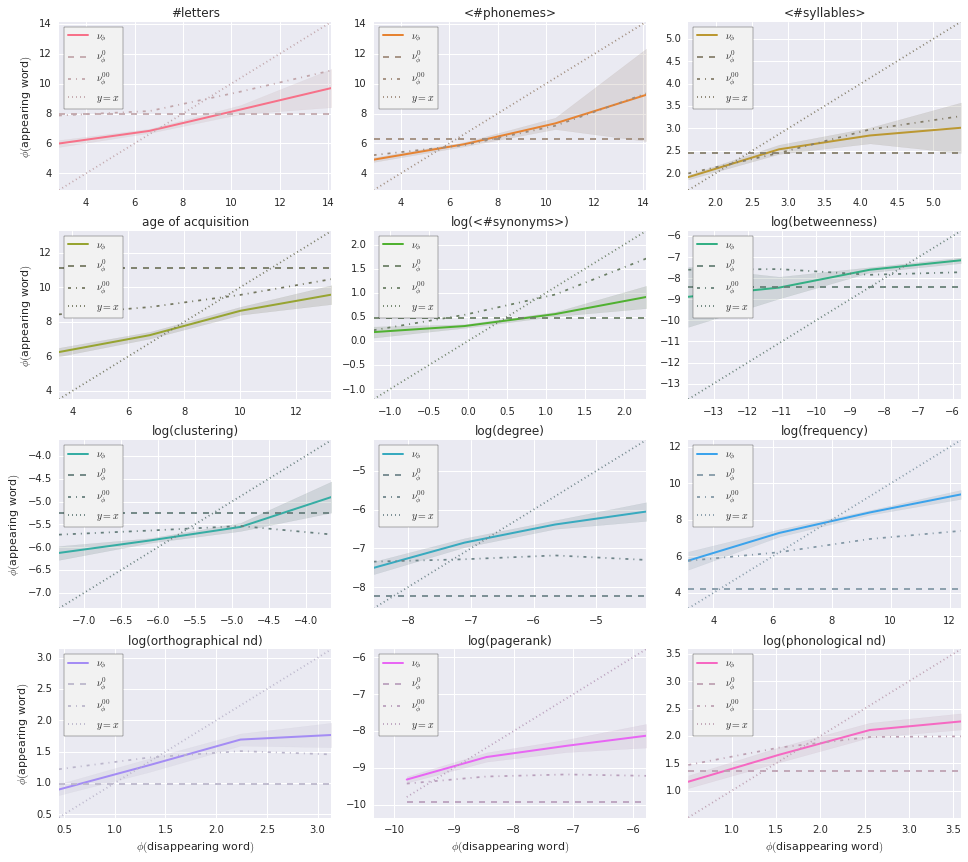

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

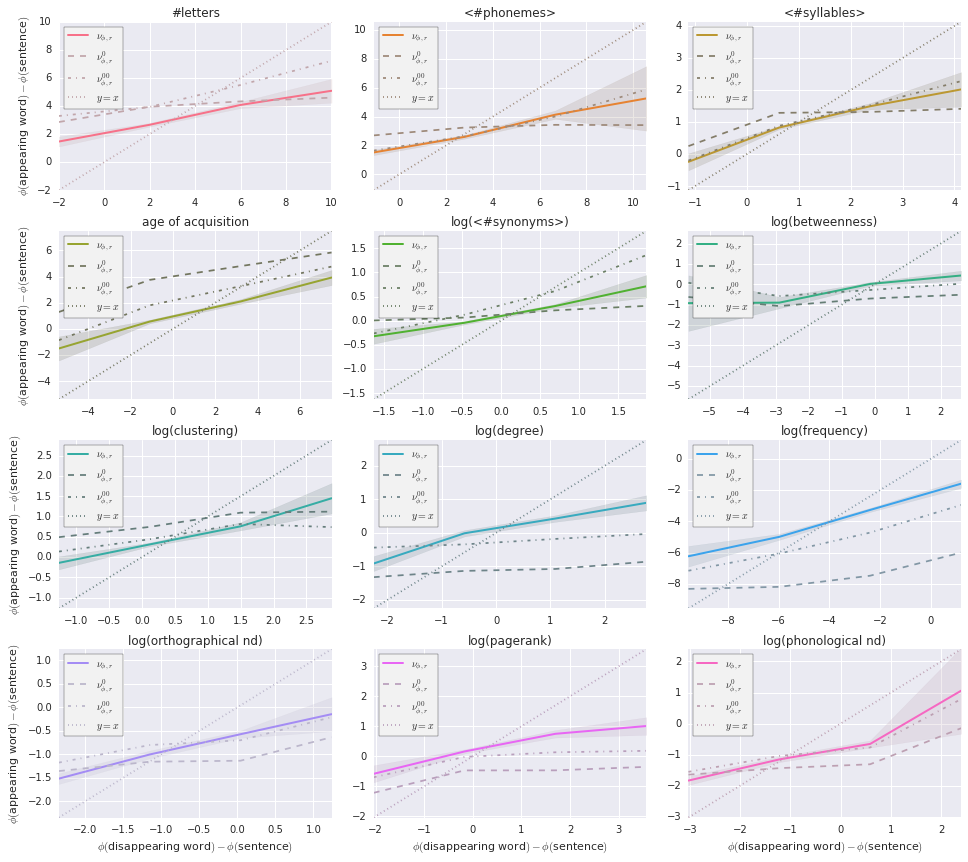

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

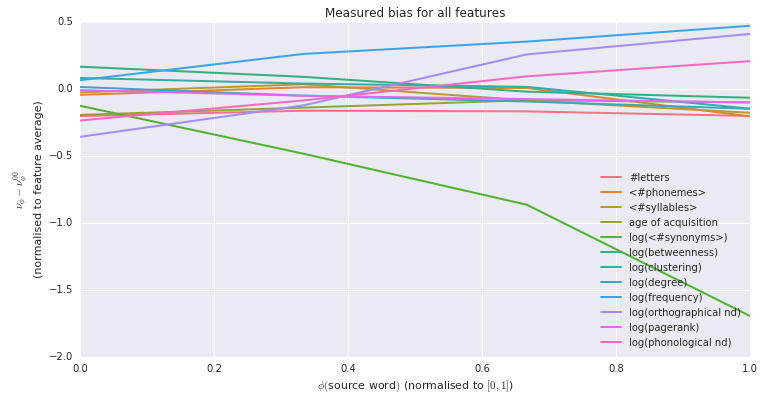

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

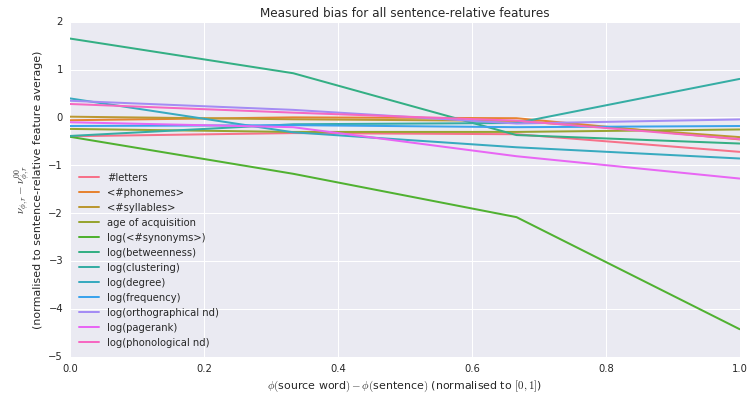

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

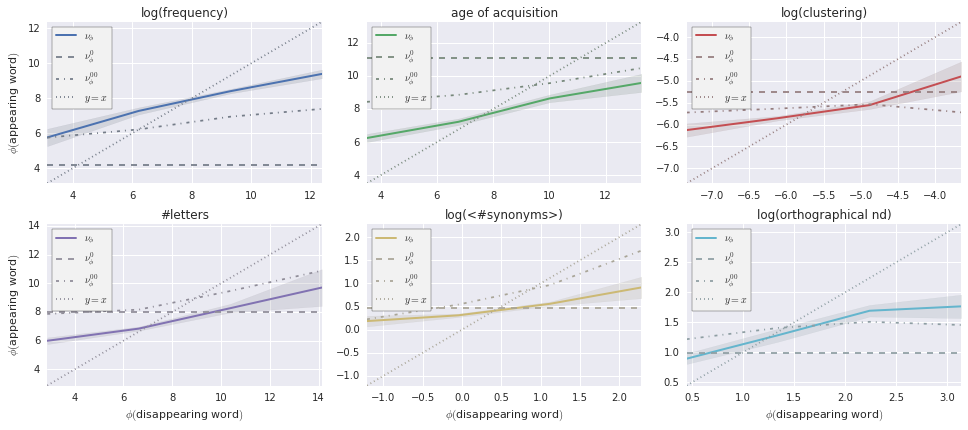

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

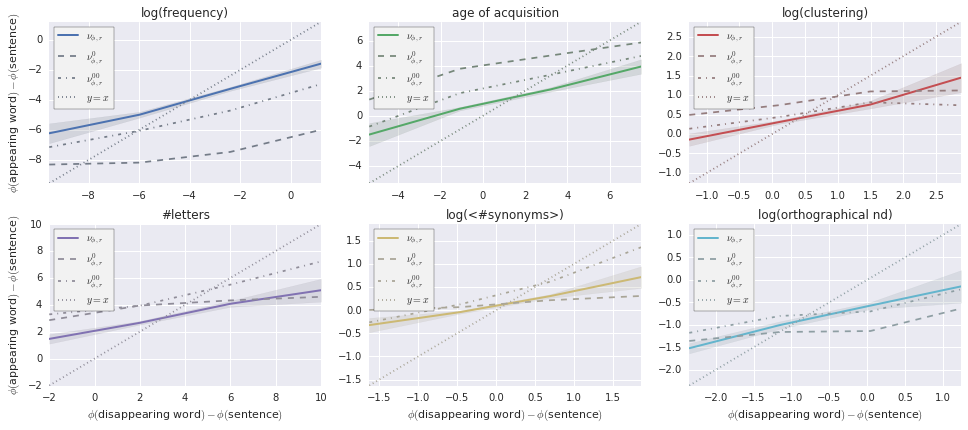

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

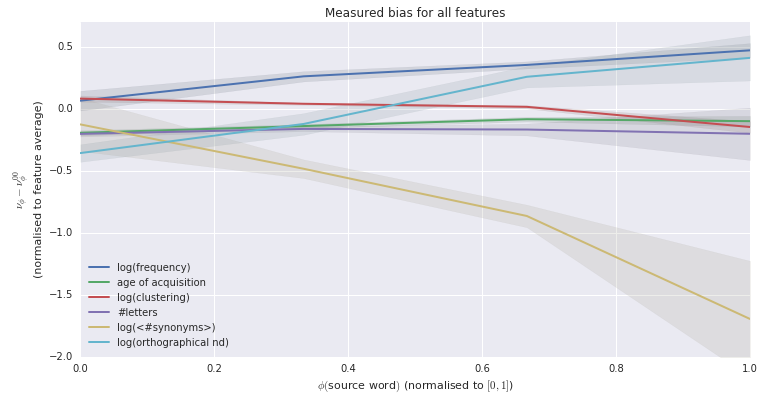

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

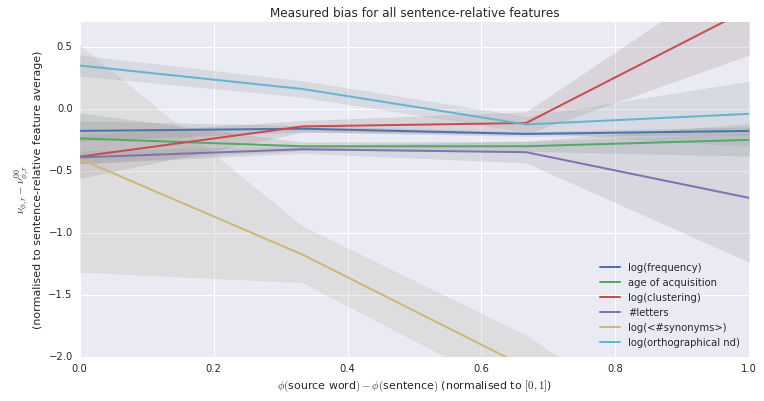

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


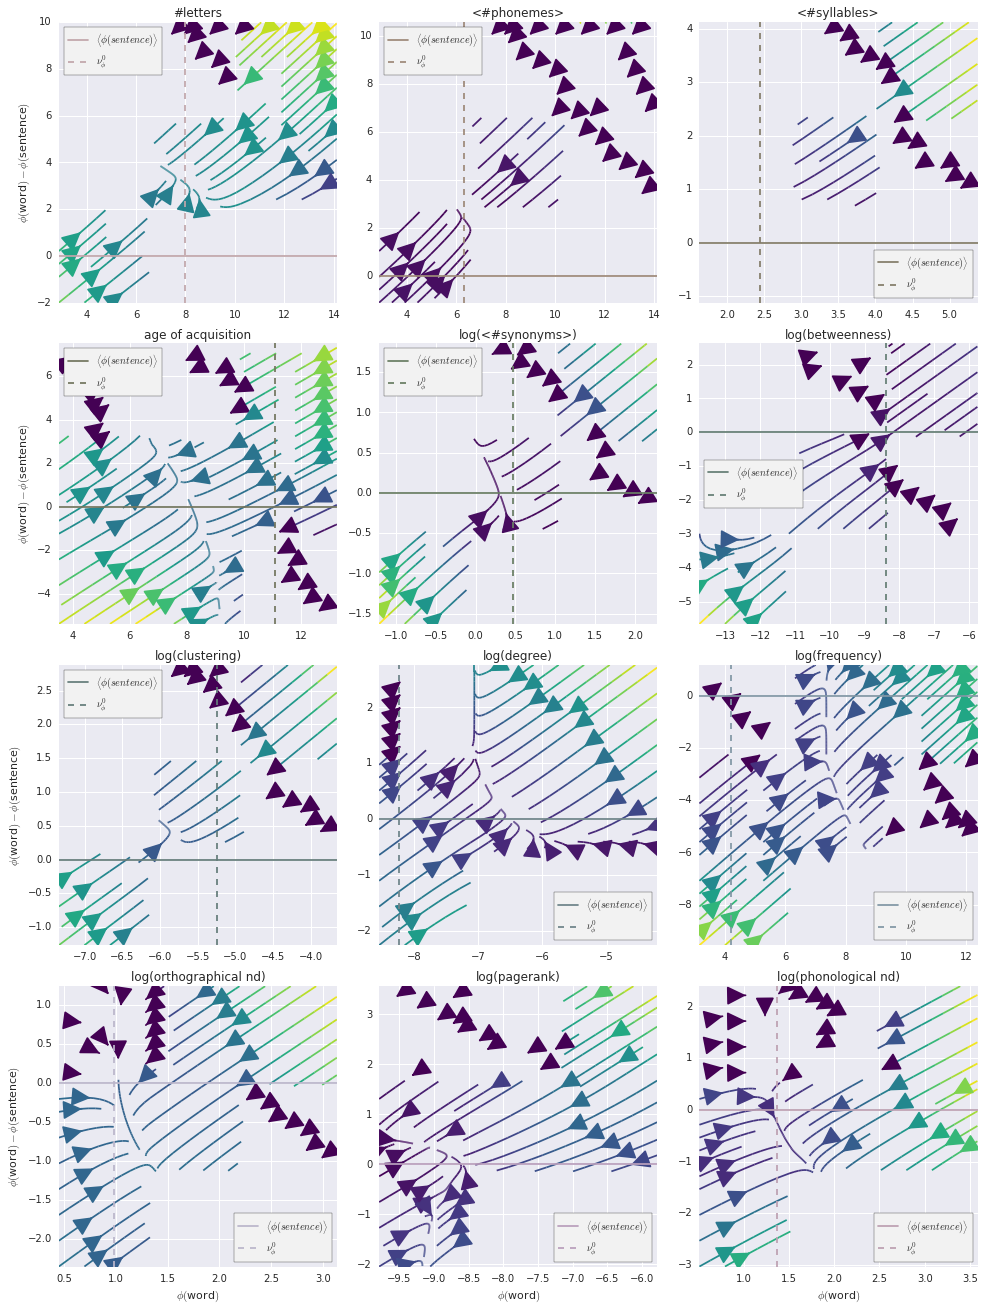

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


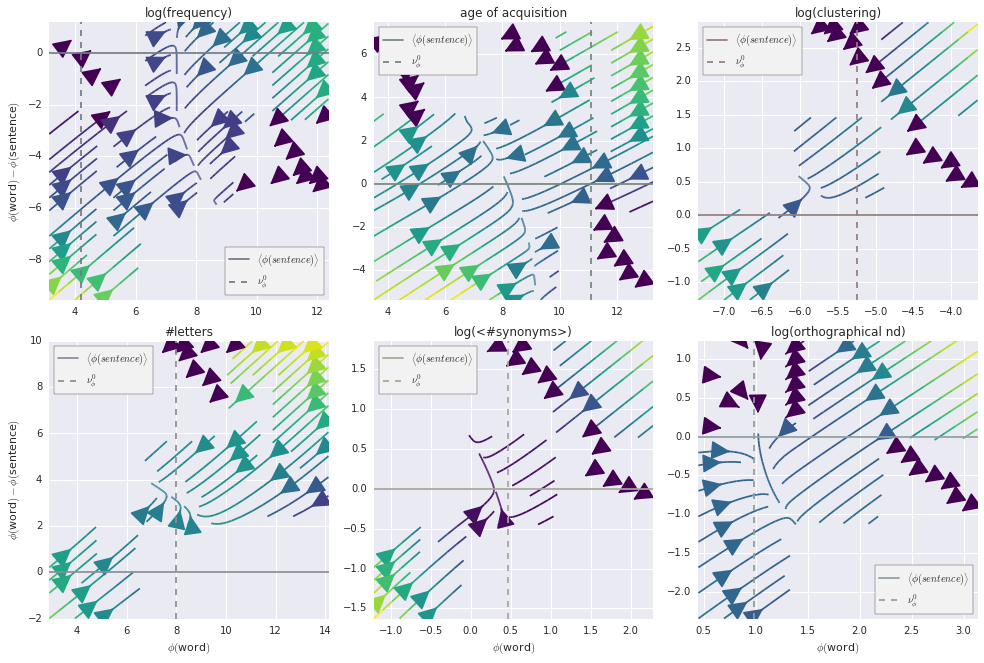

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.52249297  0.17584485  0.08740586  0.07198788  0.03433431  0.02976014
  0.02195916  0.01893649  0.01403977  0.01007515]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.479942,0.287349,-0.081596,0.248965,0.215588,-0.423089,0.208287,0.282616,-0.404264,0.278699,-0.169101,-0.003093
Component-1,-0.297574,0.412176,-0.135510,0.294778,0.267516,0.438942,-0.176408,0.286757,0.432023,-0.221346,0.151683,-0.008595
Component-2,0.740406,0.283615,-0.129143,0.086227,0.555507,-0.157776,-0.011621,0.058932,-0.050621,0.069707,-0.006207,-0.051951


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 71288) |          | Elapsed Time: 0:00:44 ETA:  36 days, 13:57:35

  0% (  120 of 71288) |                    | Elapsed Time: 0:00:45 ETA:  0:09:17

  0% (  236 of 71288) |                    | Elapsed Time: 0:00:46 ETA:  0:09:22

  0% (  348 of 71288) |                    | Elapsed Time: 0:00:47 ETA:  0:09:31

  0% (  460 of 71288) |                    | Elapsed Time: 0:00:48 ETA:  0:09:35

  0% (  582 of 71288) |                    | Elapsed Time: 0:00:49 ETA:  0:09:27

  0% (  707 of 71288) |                    | Elapsed Time: 0:00:50 ETA:  0:09:18

  1% (  833 of 71288) |                    | Elapsed Time: 0:00:51 ETA:  0:09:11

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:51 ETA:  0:09:06

  1% ( 1021 of 71288) |                    | Elapsed Time: 0:00:52 ETA:  0:09:00

  1% ( 1151 of 71288) |                    | Elapsed Time: 0:00:53 ETA:  0:08:52

  1% ( 1280 of 71288) |                    | Elapsed Time: 0:00:54 ETA:  0:08:44

  1% ( 1411 of 71288) |                    | Elapsed Time: 0:00:55 ETA:  0:08:33

  2% ( 1557 of 71288) |                    | Elapsed Time: 0:00:56 ETA:  0:08:14

  2% ( 1710 of 71288) |                    | Elapsed Time: 0:00:57 ETA:  0:07:58

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:58 ETA:  0:07:54

  2% ( 1937 of 71288) |                    | Elapsed Time: 0:00:59 ETA:  0:07:39

  2% ( 2004 of 71288) |                    | Elapsed Time: 0:01:00 ETA:  0:08:10

  2% ( 2071 of 71288) |                    | Elapsed Time: 0:01:01 ETA:  0:08:42

  3% ( 2141 of 71288) |                    | Elapsed Time: 0:01:02 ETA:  0:09:16

  3% ( 2216 of 71288) |                    | Elapsed Time: 0:01:03 ETA:  0:09:51

  3% ( 2287 of 71288) |                    | Elapsed Time: 0:01:04 ETA:  0:10:35

  3% ( 2357 of 71288) |                    | Elapsed Time: 0:01:05 ETA:  0:11:41

  3% ( 2427 of 71288) |                    | Elapsed Time: 0:01:06 ETA:  0:13:09

  3% ( 2497 of 71288) |                    | Elapsed Time: 0:01:07 ETA:  0:13:57

  3% ( 2568 of 71288) |                    | Elapsed Time: 0:01:08 ETA:  0:15:54

  3% ( 2646 of 71288) |                    | Elapsed Time: 0:01:09 ETA:  0:15:35

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:01:09 ETA:  0:15:07

  3% ( 2800 of 71288) |                    | Elapsed Time: 0:01:10 ETA:  0:13:42

  4% ( 2914 of 71288) |                    | Elapsed Time: 0:01:11 ETA:  0:12:51

  4% ( 3026 of 71288) |                    | Elapsed Time: 0:01:12 ETA:  0:12:03

  4% ( 3149 of 71288) |                    | Elapsed Time: 0:01:13 ETA:  0:11:08

  4% ( 3284 of 71288) |                    | Elapsed Time: 0:01:14 ETA:  0:10:10

  4% ( 3419 of 71288) |                    | Elapsed Time: 0:01:15 ETA:  0:09:21

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:01:16 ETA:  0:08:30

  5% ( 3734 of 71288) |#                   | Elapsed Time: 0:01:17 ETA:  0:07:41

  5% ( 3902 of 71288) |#                   | Elapsed Time: 0:01:18 ETA:  0:07:24

  5% ( 4073 of 71288) |#                   | Elapsed Time: 0:01:19 ETA:  0:07:04

  5% ( 4249 of 71288) |#                   | Elapsed Time: 0:01:20 ETA:  0:06:40

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:01:21 ETA:  0:06:04

  6% ( 4600 of 71288) |#                   | Elapsed Time: 0:01:22 ETA:  0:06:00

  6% ( 4742 of 71288) |#                   | Elapsed Time: 0:01:23 ETA:  0:05:56

  6% ( 4879 of 71288) |#                   | Elapsed Time: 0:01:24 ETA:  0:05:59

  7% ( 5016 of 71288) |#                   | Elapsed Time: 0:01:25 ETA:  0:06:09

  7% ( 5153 of 71288) |#                   | Elapsed Time: 0:01:26 ETA:  0:06:19

  7% ( 5262 of 71288) |#                   | Elapsed Time: 0:01:27 ETA:  0:06:43

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:28 ETA:  0:06:51

  7% ( 5479 of 71288) |#                   | Elapsed Time: 0:01:29 ETA:  0:07:12

  7% ( 5538 of 71288) |#                   | Elapsed Time: 0:01:30 ETA:  0:07:52

  7% ( 5656 of 71288) |#                   | Elapsed Time: 0:01:31 ETA:  0:08:05

  8% ( 5767 of 71288) |#                   | Elapsed Time: 0:01:32 ETA:  0:08:21

  8% ( 5948 of 71288) |#                   | Elapsed Time: 0:01:33 ETA:  0:07:56

  8% ( 6098 of 71288) |#                   | Elapsed Time: 0:01:34 ETA:  0:07:48

  8% ( 6210 of 71288) |#                   | Elapsed Time: 0:01:35 ETA:  0:08:01

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:35 ETA:  0:07:56

  8% ( 6338 of 71288) |#                   | Elapsed Time: 0:01:36 ETA:  0:08:21

  9% ( 6438 of 71288) |#                   | Elapsed Time: 0:01:37 ETA:  0:08:40

  9% ( 6536 of 71288) |#                   | Elapsed Time: 0:01:38 ETA:  0:08:14

  9% ( 6670 of 71288) |#                   | Elapsed Time: 0:01:39 ETA:  0:08:04

  9% ( 6823 of 71288) |#                   | Elapsed Time: 0:01:40 ETA:  0:07:40

  9% ( 6967 of 71288) |#                   | Elapsed Time: 0:01:41 ETA:  0:08:00

  9% ( 7103 of 71288) |#                   | Elapsed Time: 0:01:42 ETA:  0:08:07

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:42 ETA:  0:08:02

 10% ( 7237 of 71288) |##                  | Elapsed Time: 0:01:43 ETA:  0:08:06

 10% ( 7346 of 71288) |##                  | Elapsed Time: 0:01:44 ETA:  0:07:59

 10% ( 7451 of 71288) |##                  | Elapsed Time: 0:01:45 ETA:  0:07:55

 10% ( 7557 of 71288) |##                  | Elapsed Time: 0:01:47 ETA:  0:07:50

 10% ( 7671 of 71288) |##                  | Elapsed Time: 0:01:48 ETA:  0:08:01

 10% ( 7782 of 71288) |##                  | Elapsed Time: 0:01:49 ETA:  0:08:26

 11% ( 7888 of 71288) |##                  | Elapsed Time: 0:01:50 ETA:  0:08:50

 11% ( 7995 of 71288) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:09

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:51 ETA:  0:09:09

 11% ( 8130 of 71288) |##                  | Elapsed Time: 0:01:52 ETA:  0:09:07

 11% ( 8242 of 71288) |##                  | Elapsed Time: 0:01:53 ETA:  0:09:05

 11% ( 8354 of 71288) |##                  | Elapsed Time: 0:01:54 ETA:  0:08:59

 11% ( 8464 of 71288) |##                  | Elapsed Time: 0:01:55 ETA:  0:08:55

 12% ( 8572 of 71288) |##                  | Elapsed Time: 0:01:56 ETA:  0:08:58

 12% ( 8682 of 71288) |##                  | Elapsed Time: 0:01:57 ETA:  0:08:58

 12% ( 8792 of 71288) |##                  | Elapsed Time: 0:01:58 ETA:  0:08:55

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:59 ETA:  0:08:52

 12% ( 9042 of 71288) |##                  | Elapsed Time: 0:02:00 ETA:  0:08:37

 12% ( 9166 of 71288) |##                  | Elapsed Time: 0:02:01 ETA:  0:08:27

 13% ( 9292 of 71288) |##                  | Elapsed Time: 0:02:02 ETA:  0:08:16

 13% ( 9424 of 71288) |##                  | Elapsed Time: 0:02:03 ETA:  0:08:01

 13% ( 9554 of 71288) |##                  | Elapsed Time: 0:02:04 ETA:  0:07:47

 13% ( 9696 of 71288) |##                  | Elapsed Time: 0:02:05 ETA:  0:07:27

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:02:06 ETA:  0:07:12

 13% ( 9930 of 71288) |##                  | Elapsed Time: 0:02:07 ETA:  0:07:01

 14% (10055 of 71288) |##                  | Elapsed Time: 0:02:08 ETA:  0:07:02

 14% (10187 of 71288) |##                  | Elapsed Time: 0:02:09 ETA:  0:06:59

 14% (10328 of 71288) |##                  | Elapsed Time: 0:02:10 ETA:  0:06:50

 14% (10475 of 71288) |##                  | Elapsed Time: 0:02:11 ETA:  0:06:40

 14% (10622 of 71288) |##                  | Elapsed Time: 0:02:12 ETA:  0:06:32

 15% (10694 of 71288) |###                 | Elapsed Time: 0:02:12 ETA:  0:06:25

 15% (10841 of 71288) |###                 | Elapsed Time: 0:02:13 ETA:  0:06:22

 15% (10992 of 71288) |###                 | Elapsed Time: 0:02:14 ETA:  0:06:15

 15% (11142 of 71288) |###                 | Elapsed Time: 0:02:15 ETA:  0:06:04

 15% (11291 of 71288) |###                 | Elapsed Time: 0:02:16 ETA:  0:05:54

 16% (11425 of 71288) |###                 | Elapsed Time: 0:02:17 ETA:  0:05:52

 16% (11535 of 71288) |###                 | Elapsed Time: 0:02:18 ETA:  0:06:05

 16% (11585 of 71288) |###                 | Elapsed Time: 0:02:19 ETA:  0:06:13

 16% (11700 of 71288) |###                 | Elapsed Time: 0:02:20 ETA:  0:06:27

 16% (11807 of 71288) |###                 | Elapsed Time: 0:02:21 ETA:  0:06:43

 16% (11921 of 71288) |###                 | Elapsed Time: 0:02:22 ETA:  0:06:59

 16% (12038 of 71288) |###                 | Elapsed Time: 0:02:23 ETA:  0:07:16

 17% (12156 of 71288) |###                 | Elapsed Time: 0:02:24 ETA:  0:07:34

 17% (12260 of 71288) |###                 | Elapsed Time: 0:02:25 ETA:  0:08:00

 17% (12384 of 71288) |###                 | Elapsed Time: 0:02:26 ETA:  0:08:05

 17% (12476 of 71288) |###                 | Elapsed Time: 0:02:27 ETA:  0:07:56

 17% (12594 of 71288) |###                 | Elapsed Time: 0:02:28 ETA:  0:07:52

 17% (12719 of 71288) |###                 | Elapsed Time: 0:02:29 ETA:  0:07:45

 18% (12845 of 71288) |###                 | Elapsed Time: 0:02:30 ETA:  0:07:32

 18% (12966 of 71288) |###                 | Elapsed Time: 0:02:31 ETA:  0:07:27

 18% (13097 of 71288) |###                 | Elapsed Time: 0:02:32 ETA:  0:07:17

 18% (13225 of 71288) |###                 | Elapsed Time: 0:02:33 ETA:  0:07:11

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:34 ETA:  0:06:57

 18% (13470 of 71288) |###                 | Elapsed Time: 0:02:35 ETA:  0:07:09

 19% (13568 of 71288) |###                 | Elapsed Time: 0:02:36 ETA:  0:07:20

 19% (13681 of 71288) |###                 | Elapsed Time: 0:02:37 ETA:  0:07:26

 19% (13793 of 71288) |###                 | Elapsed Time: 0:02:38 ETA:  0:07:34

 19% (13860 of 71288) |###                 | Elapsed Time: 0:02:39 ETA:  0:08:11

 19% (13940 of 71288) |###                 | Elapsed Time: 0:02:40 ETA:  0:08:50

 19% (14021 of 71288) |###                 | Elapsed Time: 0:02:41 ETA:  0:09:30

 19% (14146 of 71288) |###                 | Elapsed Time: 0:02:42 ETA:  0:09:32

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:43 ETA:  0:09:15

 20% (14382 of 71288) |####                | Elapsed Time: 0:02:44 ETA:  0:08:57

 20% (14500 of 71288) |####                | Elapsed Time: 0:02:45 ETA:  0:08:41

 20% (14626 of 71288) |####                | Elapsed Time: 0:02:46 ETA:  0:08:30

 20% (14729 of 71288) |####                | Elapsed Time: 0:02:47 ETA:  0:08:36

 20% (14872 of 71288) |####                | Elapsed Time: 0:02:48 ETA:  0:07:43

 21% (15025 of 71288) |####                | Elapsed Time: 0:02:49 ETA:  0:06:59

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:50 ETA:  0:06:27

 21% (15296 of 71288) |####                | Elapsed Time: 0:02:51 ETA:  0:06:16

 21% (15459 of 71288) |####                | Elapsed Time: 0:02:52 ETA:  0:05:55

 21% (15617 of 71288) |####                | Elapsed Time: 0:02:53 ETA:  0:05:40

 22% (15733 of 71288) |####                | Elapsed Time: 0:02:54 ETA:  0:05:40

 22% (15832 of 71288) |####                | Elapsed Time: 0:02:55 ETA:  0:05:51

 22% (15932 of 71288) |####                | Elapsed Time: 0:02:56 ETA:  0:05:51

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:56 ETA:  0:06:02

 22% (16186 of 71288) |####                | Elapsed Time: 0:02:57 ETA:  0:06:04

 22% (16326 of 71288) |####                | Elapsed Time: 0:02:58 ETA:  0:06:04

 23% (16470 of 71288) |####                | Elapsed Time: 0:02:59 ETA:  0:06:04

 23% (16611 of 71288) |####                | Elapsed Time: 0:03:00 ETA:  0:06:14

 23% (16761 of 71288) |####                | Elapsed Time: 0:03:01 ETA:  0:06:17

 23% (16904 of 71288) |####                | Elapsed Time: 0:03:03 ETA:  0:06:03

 23% (16931 of 71288) |####                | Elapsed Time: 0:03:03 ETA:  0:05:46

 23% (17053 of 71288) |####                | Elapsed Time: 0:03:04 ETA:  0:05:35

 24% (17167 of 71288) |####                | Elapsed Time: 0:03:05 ETA:  0:05:35

 24% (17334 of 71288) |####                | Elapsed Time: 0:03:06 ETA:  0:05:25

 24% (17487 of 71288) |####                | Elapsed Time: 0:03:07 ETA:  0:05:18

 24% (17647 of 71288) |####                | Elapsed Time: 0:03:08 ETA:  0:05:10

 25% (17823 of 71288) |#####               | Elapsed Time: 0:03:09 ETA:  0:05:04

 25% (17980 of 71288) |#####               | Elapsed Time: 0:03:10 ETA:  0:04:57

 25% (18089 of 71288) |#####               | Elapsed Time: 0:03:11 ETA:  0:05:10

 25% (18212 of 71288) |#####               | Elapsed Time: 0:03:12 ETA:  0:05:09

 25% (18332 of 71288) |#####               | Elapsed Time: 0:03:13 ETA:  0:05:06

 25% (18468 of 71288) |#####               | Elapsed Time: 0:03:14 ETA:  0:05:18

 26% (18634 of 71288) |#####               | Elapsed Time: 0:03:15 ETA:  0:05:11

 26% (18714 of 71288) |#####               | Elapsed Time: 0:03:15 ETA:  0:05:21

 26% (18848 of 71288) |#####               | Elapsed Time: 0:03:16 ETA:  0:05:30

 26% (18992 of 71288) |#####               | Elapsed Time: 0:03:17 ETA:  0:05:27

 26% (19148 of 71288) |#####               | Elapsed Time: 0:03:18 ETA:  0:05:26

 27% (19291 of 71288) |#####               | Elapsed Time: 0:03:19 ETA:  0:05:11

 27% (19447 of 71288) |#####               | Elapsed Time: 0:03:20 ETA:  0:04:56

 27% (19605 of 71288) |#####               | Elapsed Time: 0:03:21 ETA:  0:04:38

 27% (19770 of 71288) |#####               | Elapsed Time: 0:03:22 ETA:  0:04:26

 27% (19935 of 71288) |#####               | Elapsed Time: 0:03:23 ETA:  0:04:25

 28% (20094 of 71288) |#####               | Elapsed Time: 0:03:24 ETA:  0:04:19

 28% (20262 of 71288) |#####               | Elapsed Time: 0:03:25 ETA:  0:04:07

 28% (20427 of 71288) |#####               | Elapsed Time: 0:03:26 ETA:  0:03:59

 28% (20496 of 71288) |#####               | Elapsed Time: 0:03:27 ETA:  0:03:56

 28% (20663 of 71288) |#####               | Elapsed Time: 0:03:28 ETA:  0:03:47

 29% (20827 of 71288) |#####               | Elapsed Time: 0:03:29 ETA:  0:03:43

 29% (20997 of 71288) |#####               | Elapsed Time: 0:03:30 ETA:  0:03:41

 29% (21122 of 71288) |#####               | Elapsed Time: 0:03:31 ETA:  0:03:53

 29% (21250 of 71288) |#####               | Elapsed Time: 0:03:32 ETA:  0:04:05

 30% (21387 of 71288) |######              | Elapsed Time: 0:03:33 ETA:  0:04:24

 30% (21538 of 71288) |######              | Elapsed Time: 0:03:34 ETA:  0:04:29

 30% (21682 of 71288) |######              | Elapsed Time: 0:03:35 ETA:  0:04:33

 30% (21846 of 71288) |######              | Elapsed Time: 0:03:36 ETA:  0:04:33

 30% (21989 of 71288) |######              | Elapsed Time: 0:03:37 ETA:  0:04:41

 31% (22134 of 71288) |######              | Elapsed Time: 0:03:38 ETA:  0:04:51

 31% (22242 of 71288) |######              | Elapsed Time: 0:03:39 ETA:  0:04:58

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:39 ETA:  0:04:51

 31% (22445 of 71288) |######              | Elapsed Time: 0:03:40 ETA:  0:04:29

 31% (22604 of 71288) |######              | Elapsed Time: 0:03:41 ETA:  0:04:22

 31% (22765 of 71288) |######              | Elapsed Time: 0:03:42 ETA:  0:04:17

 32% (22900 of 71288) |######              | Elapsed Time: 0:03:43 ETA:  0:04:20

 32% (22995 of 71288) |######              | Elapsed Time: 0:03:44 ETA:  0:04:48

 32% (23078 of 71288) |######              | Elapsed Time: 0:03:45 ETA:  0:05:16

 32% (23169 of 71288) |######              | Elapsed Time: 0:03:46 ETA:  0:05:22

 32% (23292 of 71288) |######              | Elapsed Time: 0:03:47 ETA:  0:05:13

 32% (23414 of 71288) |######              | Elapsed Time: 0:03:48 ETA:  0:05:19

 33% (23526 of 71288) |######              | Elapsed Time: 0:03:49 ETA:  0:05:45

 33% (23640 of 71288) |######              | Elapsed Time: 0:03:50 ETA:  0:06:10

 33% (23771 of 71288) |######              | Elapsed Time: 0:03:51 ETA:  0:06:26

 33% (23924 of 71288) |######              | Elapsed Time: 0:03:52 ETA:  0:06:14

 33% (24060 of 71288) |######              | Elapsed Time: 0:03:53 ETA:  0:05:41

 33% (24189 of 71288) |######              | Elapsed Time: 0:03:54 ETA:  0:05:16

 34% (24300 of 71288) |######              | Elapsed Time: 0:03:55 ETA:  0:05:25

 34% (24413 of 71288) |######              | Elapsed Time: 0:03:56 ETA:  0:05:29

 34% (24574 of 71288) |######              | Elapsed Time: 0:03:57 ETA:  0:05:09

 34% (24726 of 71288) |######              | Elapsed Time: 0:03:58 ETA:  0:04:50

 34% (24826 of 71288) |######              | Elapsed Time: 0:03:59 ETA:  0:04:55

 35% (24951 of 71288) |#######             | Elapsed Time: 0:04:00 ETA:  0:04:50

 35% (25011 of 71288) |#######             | Elapsed Time: 0:04:01 ETA:  0:05:34

 35% (25123 of 71288) |#######             | Elapsed Time: 0:04:02 ETA:  0:05:56

 35% (25265 of 71288) |#######             | Elapsed Time: 0:04:03 ETA:  0:05:47

 35% (25371 of 71288) |#######             | Elapsed Time: 0:04:04 ETA:  0:05:49

 35% (25488 of 71288) |#######             | Elapsed Time: 0:04:05 ETA:  0:05:46

 35% (25632 of 71288) |#######             | Elapsed Time: 0:04:06 ETA:  0:05:54

 36% (25785 of 71288) |#######             | Elapsed Time: 0:04:07 ETA:  0:05:52

 36% (25842 of 71288) |#######             | Elapsed Time: 0:04:07 ETA:  0:05:42

 36% (25981 of 71288) |#######             | Elapsed Time: 0:04:08 ETA:  0:05:41

 36% (26123 of 71288) |#######             | Elapsed Time: 0:04:09 ETA:  0:04:57

 36% (26269 of 71288) |#######             | Elapsed Time: 0:04:10 ETA:  0:04:39

 37% (26406 of 71288) |#######             | Elapsed Time: 0:04:11 ETA:  0:04:40

 37% (26520 of 71288) |#######             | Elapsed Time: 0:04:12 ETA:  0:04:36

 37% (26634 of 71288) |#######             | Elapsed Time: 0:04:13 ETA:  0:04:36

 37% (26734 of 71288) |#######             | Elapsed Time: 0:04:14 ETA:  0:04:48

 37% (26847 of 71288) |#######             | Elapsed Time: 0:04:15 ETA:  0:05:07

 37% (26983 of 71288) |#######             | Elapsed Time: 0:04:16 ETA:  0:04:59

 38% (27130 of 71288) |#######             | Elapsed Time: 0:04:17 ETA:  0:04:53

 38% (27273 of 71288) |#######             | Elapsed Time: 0:04:18 ETA:  0:04:52

 38% (27438 of 71288) |#######             | Elapsed Time: 0:04:19 ETA:  0:04:42

 38% (27536 of 71288) |#######             | Elapsed Time: 0:04:20 ETA:  0:05:00

 38% (27625 of 71288) |#######             | Elapsed Time: 0:04:21 ETA:  0:05:05

 38% (27761 of 71288) |#######             | Elapsed Time: 0:04:22 ETA:  0:04:53

 39% (27873 of 71288) |#######             | Elapsed Time: 0:04:23 ETA:  0:04:54

 39% (27999 of 71288) |#######             | Elapsed Time: 0:04:24 ETA:  0:04:47

 39% (28155 of 71288) |#######             | Elapsed Time: 0:04:25 ETA:  0:04:37

 39% (28317 of 71288) |#######             | Elapsed Time: 0:04:26 ETA:  0:04:29

 39% (28467 of 71288) |#######             | Elapsed Time: 0:04:27 ETA:  0:04:25

 40% (28516 of 71288) |########            | Elapsed Time: 0:04:28 ETA:  0:04:43

 40% (28650 of 71288) |########            | Elapsed Time: 0:04:29 ETA:  0:04:24

 40% (28782 of 71288) |########            | Elapsed Time: 0:04:30 ETA:  0:04:10

 40% (28903 of 71288) |########            | Elapsed Time: 0:04:31 ETA:  0:04:17

 40% (29031 of 71288) |########            | Elapsed Time: 0:04:32 ETA:  0:04:08

 40% (29155 of 71288) |########            | Elapsed Time: 0:04:33 ETA:  0:04:08

 41% (29302 of 71288) |########            | Elapsed Time: 0:04:34 ETA:  0:04:11

 41% (29407 of 71288) |########            | Elapsed Time: 0:04:34 ETA:  0:04:19

 41% (29552 of 71288) |########            | Elapsed Time: 0:04:35 ETA:  0:04:20

 41% (29702 of 71288) |########            | Elapsed Time: 0:04:36 ETA:  0:04:09

 41% (29838 of 71288) |########            | Elapsed Time: 0:04:37 ETA:  0:04:07

 42% (29968 of 71288) |########            | Elapsed Time: 0:04:38 ETA:  0:04:07

 42% (30111 of 71288) |########            | Elapsed Time: 0:04:39 ETA:  0:03:56

 42% (30257 of 71288) |########            | Elapsed Time: 0:04:40 ETA:  0:03:47

 42% (30298 of 71288) |########            | Elapsed Time: 0:04:41 ETA:  0:03:38

 42% (30417 of 71288) |########            | Elapsed Time: 0:04:42 ETA:  0:03:50

 42% (30537 of 71288) |########            | Elapsed Time: 0:04:43 ETA:  0:04:00

 43% (30675 of 71288) |########            | Elapsed Time: 0:04:44 ETA:  0:04:03

 43% (30823 of 71288) |########            | Elapsed Time: 0:04:45 ETA:  0:04:03

 43% (30936 of 71288) |########            | Elapsed Time: 0:04:46 ETA:  0:04:13

 43% (31067 of 71288) |########            | Elapsed Time: 0:04:47 ETA:  0:04:12

 43% (31189 of 71288) |########            | Elapsed Time: 0:04:48 ETA:  0:04:20

 43% (31317 of 71288) |########            | Elapsed Time: 0:04:49 ETA:  0:04:29

 44% (31465 of 71288) |########            | Elapsed Time: 0:04:50 ETA:  0:04:21

 44% (31615 of 71288) |########            | Elapsed Time: 0:04:51 ETA:  0:04:06

 44% (31725 of 71288) |########            | Elapsed Time: 0:04:52 ETA:  0:04:09

 44% (31850 of 71288) |########            | Elapsed Time: 0:04:53 ETA:  0:04:14

 44% (31986 of 71288) |########            | Elapsed Time: 0:04:54 ETA:  0:04:18

 45% (32080 of 71288) |#########           | Elapsed Time: 0:04:54 ETA:  0:04:13

 45% (32213 of 71288) |#########           | Elapsed Time: 0:04:55 ETA:  0:04:11

 45% (32352 of 71288) |#########           | Elapsed Time: 0:04:56 ETA:  0:04:03

 45% (32459 of 71288) |#########           | Elapsed Time: 0:04:57 ETA:  0:04:12

 45% (32585 of 71288) |#########           | Elapsed Time: 0:04:58 ETA:  0:04:22

 45% (32709 of 71288) |#########           | Elapsed Time: 0:04:59 ETA:  0:04:34

 46% (32844 of 71288) |#########           | Elapsed Time: 0:05:00 ETA:  0:04:20

 46% (32971 of 71288) |#########           | Elapsed Time: 0:05:01 ETA:  0:04:10

 46% (33126 of 71288) |#########           | Elapsed Time: 0:05:02 ETA:  0:04:00

 46% (33255 of 71288) |#########           | Elapsed Time: 0:05:03 ETA:  0:03:56

 46% (33359 of 71288) |#########           | Elapsed Time: 0:05:04 ETA:  0:04:09

 47% (33516 of 71288) |#########           | Elapsed Time: 0:05:05 ETA:  0:03:59

 47% (33643 of 71288) |#########           | Elapsed Time: 0:05:06 ETA:  0:03:49

 47% (33772 of 71288) |#########           | Elapsed Time: 0:05:07 ETA:  0:03:46

 47% (33862 of 71288) |#########           | Elapsed Time: 0:05:08 ETA:  0:03:42

 47% (34018 of 71288) |#########           | Elapsed Time: 0:05:09 ETA:  0:03:32

 47% (34164 of 71288) |#########           | Elapsed Time: 0:05:10 ETA:  0:03:30

 48% (34326 of 71288) |#########           | Elapsed Time: 0:05:11 ETA:  0:03:27

 48% (34484 of 71288) |#########           | Elapsed Time: 0:05:12 ETA:  0:03:14

 48% (34624 of 71288) |#########           | Elapsed Time: 0:05:13 ETA:  0:02:58

 48% (34753 of 71288) |#########           | Elapsed Time: 0:05:14 ETA:  0:03:11

 48% (34847 of 71288) |#########           | Elapsed Time: 0:05:15 ETA:  0:03:26

 49% (34993 of 71288) |#########           | Elapsed Time: 0:05:16 ETA:  0:03:18

 49% (35143 of 71288) |#########           | Elapsed Time: 0:05:17 ETA:  0:03:20

 49% (35306 of 71288) |#########           | Elapsed Time: 0:05:18 ETA:  0:03:11

 49% (35467 of 71288) |#########           | Elapsed Time: 0:05:19 ETA:  0:03:10

 50% (35645 of 71288) |##########          | Elapsed Time: 0:05:20 ETA:  0:03:13

 50% (35796 of 71288) |##########          | Elapsed Time: 0:05:21 ETA:  0:02:54

 50% (35879 of 71288) |##########          | Elapsed Time: 0:05:22 ETA:  0:03:17

 50% (35979 of 71288) |##########          | Elapsed Time: 0:05:23 ETA:  0:03:13

 50% (36099 of 71288) |##########          | Elapsed Time: 0:05:24 ETA:  0:03:24

 50% (36218 of 71288) |##########          | Elapsed Time: 0:05:25 ETA:  0:03:38

 50% (36337 of 71288) |##########          | Elapsed Time: 0:05:26 ETA:  0:04:01

 51% (36463 of 71288) |##########          | Elapsed Time: 0:05:27 ETA:  0:04:20

 51% (36536 of 71288) |##########          | Elapsed Time: 0:05:28 ETA:  0:04:33

 51% (36666 of 71288) |##########          | Elapsed Time: 0:05:29 ETA:  0:04:28

 51% (36807 of 71288) |##########          | Elapsed Time: 0:05:30 ETA:  0:04:33

 51% (36963 of 71288) |##########          | Elapsed Time: 0:05:31 ETA:  0:03:51

 52% (37124 of 71288) |##########          | Elapsed Time: 0:05:32 ETA:  0:03:21

 52% (37252 of 71288) |##########          | Elapsed Time: 0:05:33 ETA:  0:03:16

 52% (37370 of 71288) |##########          | Elapsed Time: 0:05:34 ETA:  0:03:16

 52% (37427 of 71288) |##########          | Elapsed Time: 0:05:35 ETA:  0:03:11

 52% (37550 of 71288) |##########          | Elapsed Time: 0:05:36 ETA:  0:03:11

 52% (37694 of 71288) |##########          | Elapsed Time: 0:05:37 ETA:  0:03:06

 53% (37841 of 71288) |##########          | Elapsed Time: 0:05:38 ETA:  0:02:58

 53% (37969 of 71288) |##########          | Elapsed Time: 0:05:39 ETA:  0:03:03

 53% (38112 of 71288) |##########          | Elapsed Time: 0:05:40 ETA:  0:03:08

 53% (38264 of 71288) |##########          | Elapsed Time: 0:05:41 ETA:  0:03:11

 53% (38318 of 71288) |##########          | Elapsed Time: 0:05:41 ETA:  0:03:08

 53% (38459 of 71288) |##########          | Elapsed Time: 0:05:42 ETA:  0:02:56

 54% (38612 of 71288) |##########          | Elapsed Time: 0:05:43 ETA:  0:02:45

 54% (38746 of 71288) |##########          | Elapsed Time: 0:05:44 ETA:  0:02:39

 54% (38887 of 71288) |##########          | Elapsed Time: 0:05:45 ETA:  0:02:39

 54% (39047 of 71288) |##########          | Elapsed Time: 0:05:46 ETA:  0:02:32

 55% (39209 of 71288) |###########         | Elapsed Time: 0:05:47 ETA:  0:02:26

 55% (39375 of 71288) |###########         | Elapsed Time: 0:05:48 ETA:  0:02:19

 55% (39518 of 71288) |###########         | Elapsed Time: 0:05:49 ETA:  0:02:16

 55% (39662 of 71288) |###########         | Elapsed Time: 0:05:50 ETA:  0:02:14

 55% (39786 of 71288) |###########         | Elapsed Time: 0:05:51 ETA:  0:02:25

 55% (39912 of 71288) |###########         | Elapsed Time: 0:05:52 ETA:  0:02:27

 56% (40049 of 71288) |###########         | Elapsed Time: 0:05:53 ETA:  0:02:29

 56% (40100 of 71288) |###########         | Elapsed Time: 0:05:54 ETA:  0:02:52

 56% (40263 of 71288) |###########         | Elapsed Time: 0:05:55 ETA:  0:02:38

 56% (40388 of 71288) |###########         | Elapsed Time: 0:05:56 ETA:  0:02:45

 56% (40563 of 71288) |###########         | Elapsed Time: 0:05:57 ETA:  0:02:40

 57% (40723 of 71288) |###########         | Elapsed Time: 0:05:58 ETA:  0:02:32

 57% (40869 of 71288) |###########         | Elapsed Time: 0:05:59 ETA:  0:02:30

 57% (40991 of 71288) |###########         | Elapsed Time: 0:06:00 ETA:  0:02:29

 57% (41139 of 71288) |###########         | Elapsed Time: 0:06:01 ETA:  0:02:18

 57% (41290 of 71288) |###########         | Elapsed Time: 0:06:02 ETA:  0:02:11

 58% (41447 of 71288) |###########         | Elapsed Time: 0:06:03 ETA:  0:01:53

 58% (41598 of 71288) |###########         | Elapsed Time: 0:06:04 ETA:  0:01:57

 58% (41745 of 71288) |###########         | Elapsed Time: 0:06:05 ETA:  0:01:48

 58% (41882 of 71288) |###########         | Elapsed Time: 0:06:06 ETA:  0:02:09

 58% (42034 of 71288) |###########         | Elapsed Time: 0:06:07 ETA:  0:02:05

 59% (42158 of 71288) |###########         | Elapsed Time: 0:06:08 ETA:  0:02:05

 59% (42297 of 71288) |###########         | Elapsed Time: 0:06:09 ETA:  0:02:08

 59% (42448 of 71288) |###########         | Elapsed Time: 0:06:10 ETA:  0:02:07

 59% (42601 of 71288) |###########         | Elapsed Time: 0:06:11 ETA:  0:02:08

 60% (42773 of 71288) |############        | Elapsed Time: 0:06:12 ETA:  0:02:08

 60% (42936 of 71288) |############        | Elapsed Time: 0:06:13 ETA:  0:01:52

 60% (43066 of 71288) |############        | Elapsed Time: 0:06:14 ETA:  0:01:57

 60% (43164 of 71288) |############        | Elapsed Time: 0:06:15 ETA:  0:02:20

 60% (43246 of 71288) |############        | Elapsed Time: 0:06:16 ETA:  0:02:39

 60% (43328 of 71288) |############        | Elapsed Time: 0:06:17 ETA:  0:03:08

 60% (43410 of 71288) |############        | Elapsed Time: 0:06:18 ETA:  0:03:47

 61% (43529 of 71288) |############        | Elapsed Time: 0:06:19 ETA:  0:04:09

 61% (43664 of 71288) |############        | Elapsed Time: 0:06:20 ETA:  0:04:34

 61% (43790 of 71288) |############        | Elapsed Time: 0:06:21 ETA:  0:05:01

 61% (43912 of 71288) |############        | Elapsed Time: 0:06:22 ETA:  0:05:07

 61% (44009 of 71288) |############        | Elapsed Time: 0:06:23 ETA:  0:05:07

 61% (44144 of 71288) |############        | Elapsed Time: 0:06:24 ETA:  0:04:25

 62% (44289 of 71288) |############        | Elapsed Time: 0:06:25 ETA:  0:03:41

 62% (44433 of 71288) |############        | Elapsed Time: 0:06:26 ETA:  0:03:03

 62% (44556 of 71288) |############        | Elapsed Time: 0:06:27 ETA:  0:02:40

 62% (44645 of 71288) |############        | Elapsed Time: 0:06:28 ETA:  0:02:55

 62% (44741 of 71288) |############        | Elapsed Time: 0:06:29 ETA:  0:03:09

 62% (44884 of 71288) |############        | Elapsed Time: 0:06:30 ETA:  0:02:59

 63% (45021 of 71288) |############        | Elapsed Time: 0:06:31 ETA:  0:02:50

 63% (45174 of 71288) |############        | Elapsed Time: 0:06:32 ETA:  0:02:22

 63% (45293 of 71288) |############        | Elapsed Time: 0:06:33 ETA:  0:02:30

 63% (45409 of 71288) |############        | Elapsed Time: 0:06:34 ETA:  0:02:43

 63% (45447 of 71288) |############        | Elapsed Time: 0:06:34 ETA:  0:02:48

 63% (45591 of 71288) |############        | Elapsed Time: 0:06:35 ETA:  0:02:55

 64% (45718 of 71288) |############        | Elapsed Time: 0:06:36 ETA:  0:02:34

 64% (45853 of 71288) |############        | Elapsed Time: 0:06:37 ETA:  0:02:14

 64% (46004 of 71288) |############        | Elapsed Time: 0:06:38 ETA:  0:02:10

 64% (46169 of 71288) |############        | Elapsed Time: 0:06:39 ETA:  0:01:56

 65% (46338 of 71288) |#############       | Elapsed Time: 0:06:40 ETA:  0:01:41

 65% (46487 of 71288) |#############       | Elapsed Time: 0:06:41 ETA:  0:01:24

 65% (46633 of 71288) |#############       | Elapsed Time: 0:06:42 ETA:  0:01:24

 65% (46751 of 71288) |#############       | Elapsed Time: 0:06:43 ETA:  0:01:34

 65% (46901 of 71288) |#############       | Elapsed Time: 0:06:44 ETA:  0:01:23

 65% (47035 of 71288) |#############       | Elapsed Time: 0:06:45 ETA:  0:01:22

 66% (47169 of 71288) |#############       | Elapsed Time: 0:06:46 ETA:  0:01:28

 66% (47229 of 71288) |#############       | Elapsed Time: 0:06:47 ETA:  0:01:44

 66% (47371 of 71288) |#############       | Elapsed Time: 0:06:48 ETA:  0:01:51

 66% (47542 of 71288) |#############       | Elapsed Time: 0:06:49 ETA:  0:01:36

 66% (47662 of 71288) |#############       | Elapsed Time: 0:06:50 ETA:  0:01:48

 67% (47765 of 71288) |#############       | Elapsed Time: 0:06:51 ETA:  0:02:07

 67% (47915 of 71288) |#############       | Elapsed Time: 0:06:52 ETA:  0:01:51

 67% (48071 of 71288) |#############       | Elapsed Time: 0:06:53 ETA:  0:01:47

 67% (48120 of 71288) |#############       | Elapsed Time: 0:06:53 ETA:  0:01:43

 67% (48279 of 71288) |#############       | Elapsed Time: 0:06:54 ETA:  0:01:30

 67% (48407 of 71288) |#############       | Elapsed Time: 0:06:55 ETA:  0:01:29

 68% (48548 of 71288) |#############       | Elapsed Time: 0:06:56 ETA:  0:01:29

 68% (48700 of 71288) |#############       | Elapsed Time: 0:06:57 ETA:  0:01:36

 68% (48828 of 71288) |#############       | Elapsed Time: 0:06:58 ETA:  0:01:31

 68% (48954 of 71288) |#############       | Elapsed Time: 0:06:59 ETA:  0:01:20

 68% (49011 of 71288) |#############       | Elapsed Time: 0:07:00 ETA:  0:01:27

 68% (49140 of 71288) |#############       | Elapsed Time: 0:07:01 ETA:  0:01:39

 69% (49277 of 71288) |#############       | Elapsed Time: 0:07:02 ETA:  0:01:41

 69% (49433 of 71288) |#############       | Elapsed Time: 0:07:03 ETA:  0:01:41

 69% (49578 of 71288) |#############       | Elapsed Time: 0:07:04 ETA:  0:01:33

 69% (49706 of 71288) |#############       | Elapsed Time: 0:07:05 ETA:  0:01:38

 69% (49821 of 71288) |#############       | Elapsed Time: 0:07:06 ETA:  0:01:54

 70% (49902 of 71288) |##############      | Elapsed Time: 0:07:06 ETA:  0:01:44

 70% (50039 of 71288) |##############      | Elapsed Time: 0:07:07 ETA:  0:01:37

 70% (50174 of 71288) |##############      | Elapsed Time: 0:07:08 ETA:  0:01:34

 70% (50320 of 71288) |##############      | Elapsed Time: 0:07:09 ETA:  0:01:25

 70% (50438 of 71288) |##############      | Elapsed Time: 0:07:10 ETA:  0:01:33

 70% (50564 of 71288) |##############      | Elapsed Time: 0:07:11 ETA:  0:01:46

 71% (50736 of 71288) |##############      | Elapsed Time: 0:07:12 ETA:  0:01:32

 71% (50793 of 71288) |##############      | Elapsed Time: 0:07:13 ETA:  0:01:32

 71% (50918 of 71288) |##############      | Elapsed Time: 0:07:14 ETA:  0:01:26

 71% (51054 of 71288) |##############      | Elapsed Time: 0:07:15 ETA:  0:01:32

 71% (51195 of 71288) |##############      | Elapsed Time: 0:07:16 ETA:  0:01:29

 72% (51353 of 71288) |##############      | Elapsed Time: 0:07:17 ETA:  0:01:18

 72% (51498 of 71288) |##############      | Elapsed Time: 0:07:18 ETA:  0:01:18

 72% (51626 of 71288) |##############      | Elapsed Time: 0:07:19 ETA:  0:01:12

 72% (51684 of 71288) |##############      | Elapsed Time: 0:07:19 ETA:  0:01:07

 72% (51834 of 71288) |##############      | Elapsed Time: 0:07:20 ETA:  0:01:16

 72% (51966 of 71288) |##############      | Elapsed Time: 0:07:21 ETA:  0:01:13

 73% (52108 of 71288) |##############      | Elapsed Time: 0:07:22 ETA:  0:01:05

 73% (52254 of 71288) |##############      | Elapsed Time: 0:07:23 ETA:  0:01:00

 73% (52406 of 71288) |##############      | Elapsed Time: 0:07:24 ETA:  0:00:54

 73% (52575 of 71288) |##############      | Elapsed Time: 0:07:25 ETA:  0:00:51

 73% (52684 of 71288) |##############      | Elapsed Time: 0:07:26 ETA:  0:00:58

 74% (52777 of 71288) |##############      | Elapsed Time: 0:07:27 ETA:  0:01:18

 74% (52941 of 71288) |##############      | Elapsed Time: 0:07:28 ETA:  0:01:11

 74% (53082 of 71288) |##############      | Elapsed Time: 0:07:29 ETA:  0:01:05

 74% (53245 of 71288) |##############      | Elapsed Time: 0:07:30 ETA:  0:00:55

 74% (53384 of 71288) |##############      | Elapsed Time: 0:07:31 ETA:  0:00:57

 75% (53467 of 71288) |###############     | Elapsed Time: 0:07:32 ETA:  0:01:12

 75% (53553 of 71288) |###############     | Elapsed Time: 0:07:33 ETA:  0:01:52

 75% (53725 of 71288) |###############     | Elapsed Time: 0:07:34 ETA:  0:01:29

 75% (53881 of 71288) |###############     | Elapsed Time: 0:07:35 ETA:  0:01:07

 75% (54029 of 71288) |###############     | Elapsed Time: 0:07:36 ETA:  0:00:43

 75% (54177 of 71288) |###############     | Elapsed Time: 0:07:37 ETA:  0:00:48

 76% (54306 of 71288) |###############     | Elapsed Time: 0:07:38 ETA:  0:00:53

 76% (54358 of 71288) |###############     | Elapsed Time: 0:07:38 ETA:  0:01:03

 76% (54503 of 71288) |###############     | Elapsed Time: 0:07:39 ETA:  0:00:58

 76% (54636 of 71288) |###############     | Elapsed Time: 0:07:40 ETA:  0:00:51

 76% (54757 of 71288) |###############     | Elapsed Time: 0:07:41 ETA:  0:00:34

 77% (54920 of 71288) |###############     | Elapsed Time: 0:07:42 ETA:  0:00:38

 77% (55051 of 71288) |###############     | Elapsed Time: 0:07:43 ETA:  0:00:48

 77% (55161 of 71288) |###############     | Elapsed Time: 0:07:44 ETA:  0:01:04

 77% (55249 of 71288) |###############     | Elapsed Time: 0:07:45 ETA:  0:01:03

 77% (55362 of 71288) |###############     | Elapsed Time: 0:07:46 ETA:  0:01:10

 77% (55476 of 71288) |###############     | Elapsed Time: 0:07:47 ETA:  0:01:19

 78% (55623 of 71288) |###############     | Elapsed Time: 0:07:48 ETA:  0:01:17

 78% (55787 of 71288) |###############     | Elapsed Time: 0:07:49 ETA:  0:01:02

 78% (55925 of 71288) |###############     | Elapsed Time: 0:07:50 ETA:  0:00:54

 78% (56072 of 71288) |###############     | Elapsed Time: 0:07:51 ETA:  0:01:00

 78% (56140 of 71288) |###############     | Elapsed Time: 0:07:52 ETA:  0:00:57

 78% (56297 of 71288) |###############     | Elapsed Time: 0:07:53 ETA:  0:00:34

 79% (56446 of 71288) |###############     | Elapsed Time: 0:07:54 ETA:  0:00:34

 79% (56501 of 71288) |###############     | Elapsed Time: 0:07:55 ETA:  0:00:59

 79% (56651 of 71288) |###############     | Elapsed Time: 0:07:56 ETA:  0:00:42

 79% (56749 of 71288) |###############     | Elapsed Time: 0:07:57 ETA:  0:01:04

 79% (56865 of 71288) |###############     | Elapsed Time: 0:07:58 ETA:  0:01:27

 79% (56983 of 71288) |###############     | Elapsed Time: 0:07:59 ETA:  0:01:37

 80% (57031 of 71288) |################    | Elapsed Time: 0:07:59 ETA:  0:01:46

 80% (57152 of 71288) |################    | Elapsed Time: 0:08:00 ETA:  0:01:50

 80% (57281 of 71288) |################    | Elapsed Time: 0:08:01 ETA:  0:02:06

 80% (57433 of 71288) |################    | Elapsed Time: 0:08:02 ETA:  0:02:03

 80% (57564 of 71288) |################    | Elapsed Time: 0:08:03 ETA:  0:01:18

 80% (57704 of 71288) |################    | Elapsed Time: 0:08:04 ETA:  0:01:22

 81% (57861 of 71288) |################    | Elapsed Time: 0:08:05 ETA:  0:00:51

 81% (57922 of 71288) |################    | Elapsed Time: 0:08:05 ETA:  0:00:42

 81% (58058 of 71288) |################    | Elapsed Time: 0:08:06 ETA:  0:00:33

 81% (58189 of 71288) |################    | Elapsed Time: 0:08:07 ETA:  0:00:36

 81% (58346 of 71288) |################    | Elapsed Time: 0:08:08 ETA:  0:00:19

 82% (58473 of 71288) |################    | Elapsed Time: 0:08:09 ETA:  0:00:18

 82% (58632 of 71288) |################    | Elapsed Time: 0:08:10 ETA:  0:00:14

 82% (58778 of 71288) |################    | Elapsed Time: 0:08:11 ETA:  0:00:07

 82% (58813 of 71288) |################    | Elapsed Time: 0:08:12 ETA:  0:00:06

 82% (58957 of 71288) |################    | Elapsed Time: 0:08:13 ETA:  0:00:11

 82% (59106 of 71288) |################    | Elapsed Time: 0:08:14 ETA:  0:00:04

 83% (59231 of 71288) |################    | Elapsed Time: 0:08:15 ETA:  0:00:08

 83% (59374 of 71288) |################    | Elapsed Time: 0:08:16 ETA:  0:00:02

 83% (59520 of 71288) |################    | Elapsed Time: 0:08:17 ETA:  0:00:06

 83% (59648 of 71288) |################    | Elapsed Time: 0:08:18 ETA:  0:00:04

 83% (59704 of 71288) |################    | Elapsed Time: 0:08:18 ETA:  0:00:09

 83% (59850 of 71288) |################    | Elapsed Time: 0:08:19 ETA:  0:00:09

 84% (59993 of 71288) |################    | Elapsed Time: 0:08:20 ETA:  0:00:06

 84% (60124 of 71288) |################    | Elapsed Time: 0:08:21 ETA:  0:00:11

 84% (60267 of 71288) |################    | Elapsed Time: 0:08:22 ETA:  0:00:13

 84% (60393 of 71288) |################    | Elapsed Time: 0:08:23 ETA:  0:00:11

 84% (60536 of 71288) |################    | Elapsed Time: 0:08:24 ETA:  0:00:10

 85% (60595 of 71288) |#################   | Elapsed Time: 0:08:25 ETA:  0:00:18

 85% (60707 of 71288) |#################   | Elapsed Time: 0:08:26 ETA:  0:00:25

 85% (60845 of 71288) |#################   | Elapsed Time: 0:08:27 ETA:  0:00:25

 85% (60978 of 71288) |#################   | Elapsed Time: 0:08:28 ETA:  0:00:30

 85% (61116 of 71288) |#################   | Elapsed Time: 0:08:29 ETA:  0:00:31

 85% (61268 of 71288) |#################   | Elapsed Time: 0:08:30 ETA:  0:00:20

 86% (61383 of 71288) |#################   | Elapsed Time: 0:08:31 ETA:  0:00:33

 86% (61486 of 71288) |#################   | Elapsed Time: 0:08:32 ETA:  0:00:32

 86% (61623 of 71288) |#################   | Elapsed Time: 0:08:33 ETA:  0:00:34

 86% (61751 of 71288) |#################   | Elapsed Time: 0:08:34 ETA:  0:00:32

 86% (61897 of 71288) |#################   | Elapsed Time: 0:08:35 ETA:  0:00:15

 87% (62035 of 71288) |#################   | Elapsed Time: 0:08:36 ETA:  0:00:15

 87% (62188 of 71288) |#################   | Elapsed Time: 0:08:37 ETA:  0:00:05

 87% (62333 of 71288) |#################   | Elapsed Time: 0:08:38 ETA:  0:00:01

 87% (62378 of 71288) |#################   | Elapsed Time: 0:08:38 ETA:  0:00:06

 87% (62506 of 71288) |#################   | Elapsed Time: 0:08:39 ETA:  0:00:00

 87% (62641 of 71288) |#################   | Elapsed Time: 0:08:40 ETA:  0:00:00

 88% (62771 of 71288) |#################   | Elapsed Time: 0:08:41 ETA:  0:00:00

 88% (62879 of 71288) |#################   | Elapsed Time: 0:08:42 ETA:  0:00:04

 88% (63038 of 71288) |#################   | Elapsed Time: 0:08:43 ETA:  0:00:00

 88% (63184 of 71288) |#################   | Elapsed Time: 0:08:44 ETA:  0:00:00

 88% (63269 of 71288) |#################   | Elapsed Time: 0:08:44 ETA:  0:00:00

 88% (63430 of 71288) |#################   | Elapsed Time: 0:08:45 ETA:  0:00:00

 89% (63566 of 71288) |#################   | Elapsed Time: 0:08:46 ETA:  0:00:00

 89% (63705 of 71288) |#################   | Elapsed Time: 0:08:47 ETA:  0:00:00

 89% (63864 of 71288) |#################   | Elapsed Time: 0:08:49 ETA:  0:00:00

 89% (63997 of 71288) |#################   | Elapsed Time: 0:08:50 ETA:  0:00:00

 90% (64160 of 71288) |##################  | Elapsed Time: 0:08:51 ETA:  0:00:00

 90% (64285 of 71288) |##################  | Elapsed Time: 0:08:52 ETA:  0:00:00

 90% (64417 of 71288) |##################  | Elapsed Time: 0:08:53 ETA:  0:00:00

 90% (64548 of 71288) |##################  | Elapsed Time: 0:08:54 ETA:  0:00:00

 90% (64700 of 71288) |##################  | Elapsed Time: 0:08:55 ETA:  0:00:00

 90% (64822 of 71288) |##################  | Elapsed Time: 0:08:56 ETA:  0:00:00

 91% (64949 of 71288) |##################  | Elapsed Time: 0:08:57 ETA:  0:00:00

 91% (65051 of 71288) |##################  | Elapsed Time: 0:08:57 ETA:  0:00:00

 91% (65191 of 71288) |##################  | Elapsed Time: 0:08:58 ETA:  0:00:00

 91% (65324 of 71288) |##################  | Elapsed Time: 0:08:59 ETA:  0:00:00

 91% (65478 of 71288) |##################  | Elapsed Time: 0:09:00 ETA:  0:00:00

 92% (65606 of 71288) |##################  | Elapsed Time: 0:09:01 ETA:  0:00:00

 92% (65753 of 71288) |##################  | Elapsed Time: 0:09:02 ETA:  0:00:00

 92% (65892 of 71288) |##################  | Elapsed Time: 0:09:03 ETA:  0:00:00

 92% (65942 of 71288) |##################  | Elapsed Time: 0:09:04 ETA:  0:00:00

 92% (66083 of 71288) |##################  | Elapsed Time: 0:09:05 ETA:  0:00:00

 92% (66239 of 71288) |##################  | Elapsed Time: 0:09:06 ETA:  0:00:00

 93% (66388 of 71288) |##################  | Elapsed Time: 0:09:07 ETA:  0:00:00

 93% (66503 of 71288) |##################  | Elapsed Time: 0:09:08 ETA:  0:00:00

 93% (66648 of 71288) |##################  | Elapsed Time: 0:09:09 ETA:  0:00:00

 93% (66794 of 71288) |##################  | Elapsed Time: 0:09:10 ETA:  0:00:00

 93% (66833 of 71288) |##################  | Elapsed Time: 0:09:10 ETA:  0:00:00

 93% (66976 of 71288) |##################  | Elapsed Time: 0:09:11 ETA:  0:00:00

 94% (67126 of 71288) |##################  | Elapsed Time: 0:09:12 ETA:  0:00:00

 94% (67270 of 71288) |##################  | Elapsed Time: 0:09:13 ETA:  0:00:00

 94% (67414 of 71288) |##################  | Elapsed Time: 0:09:14 ETA:  0:00:00

 94% (67553 of 71288) |##################  | Elapsed Time: 0:09:15 ETA:  0:00:00

 94% (67681 of 71288) |##################  | Elapsed Time: 0:09:16 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:09:17 ETA:  0:00:00

 95% (67872 of 71288) |################### | Elapsed Time: 0:09:18 ETA:  0:00:00

 95% (68014 of 71288) |################### | Elapsed Time: 0:09:19 ETA:  0:00:00

 95% (68143 of 71288) |################### | Elapsed Time: 0:09:20 ETA:  0:00:00

 95% (68289 of 71288) |################### | Elapsed Time: 0:09:21 ETA:  0:00:00

 95% (68428 of 71288) |################### | Elapsed Time: 0:09:22 ETA:  0:00:00

 96% (68551 of 71288) |################### | Elapsed Time: 0:09:23 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:09:23 ETA:  0:00:00

 96% (68751 of 71288) |################### | Elapsed Time: 0:09:24 ETA:  0:00:00

 96% (68894 of 71288) |################### | Elapsed Time: 0:09:25 ETA:  0:00:00

 96% (68995 of 71288) |################### | Elapsed Time: 0:09:26 ETA:  0:00:00

 96% (69121 of 71288) |################### | Elapsed Time: 0:09:27 ETA:  0:00:00

 97% (69260 of 71288) |################### | Elapsed Time: 0:09:28 ETA:  0:00:00

 97% (69396 of 71288) |################### | Elapsed Time: 0:09:29 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:09:30 ETA:  0:00:00

 97% (69650 of 71288) |################### | Elapsed Time: 0:09:31 ETA:  0:00:00

 97% (69803 of 71288) |################### | Elapsed Time: 0:09:32 ETA:  0:00:00

 98% (69950 of 71288) |################### | Elapsed Time: 0:09:33 ETA:  0:00:00

 98% (70092 of 71288) |################### | Elapsed Time: 0:09:34 ETA:  0:00:00

 98% (70230 of 71288) |################### | Elapsed Time: 0:09:35 ETA:  0:00:00

 98% (70344 of 71288) |################### | Elapsed Time: 0:09:36 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:09:36 ETA:  0:00:00

 98% (70547 of 71288) |################### | Elapsed Time: 0:09:37 ETA:  0:00:00

 99% (70695 of 71288) |################### | Elapsed Time: 0:09:38 ETA:  0:00:00

 99% (70834 of 71288) |################### | Elapsed Time: 0:09:39 ETA:  0:00:00

 99% (70974 of 71288) |################### | Elapsed Time: 0:09:40 ETA:  0:00:00

 99% (71111 of 71288) |################### | Elapsed Time: 0:09:41 ETA:  0:00:00

 99% (71254 of 71288) |################### | Elapsed Time: 0:09:42 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:09:43 Time: 0:09:43


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

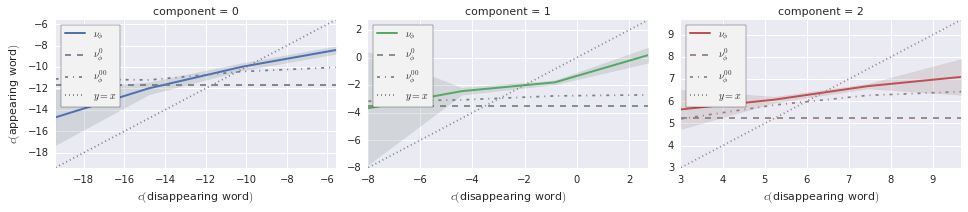

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.54721295  0.18870685  0.15627032  0.0413981   0.03818336]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,-0.717049,-0.090498,0.314984,-0.553709,0.268019,-0.002856
Component-1,-0.511884,-0.096783,0.333026,0.739676,-0.265263,0.014708
Component-2,-0.462458,0.118929,-0.871593,0.097545,0.029225,0.044098


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (    1 of 71288) |           | Elapsed Time: 0:00:11 ETA:  9 days, 17:54:01

  0% (  134 of 71288) |                    | Elapsed Time: 0:00:12 ETA:  0:08:45

  0% (  258 of 71288) |                    | Elapsed Time: 0:00:13 ETA:  0:09:02

  0% (  383 of 71288) |                    | Elapsed Time: 0:00:14 ETA:  0:09:06

  0% (  506 of 71288) |                    | Elapsed Time: 0:00:15 ETA:  0:09:10

  0% (  644 of 71288) |                    | Elapsed Time: 0:00:16 ETA:  0:08:59

  1% (  785 of 71288) |                    | Elapsed Time: 0:00:17 ETA:  0:08:49

  1% (  892 of 71288) |                    | Elapsed Time: 0:00:18 ETA:  0:08:41

  1% ( 1035 of 71288) |                    | Elapsed Time: 0:00:19 ETA:  0:08:34

  1% ( 1186 of 71288) |                    | Elapsed Time: 0:00:20 ETA:  0:08:26

  1% ( 1331 of 71288) |                    | Elapsed Time: 0:00:21 ETA:  0:08:20

  2% ( 1483 of 71288) |                    | Elapsed Time: 0:00:22 ETA:  0:08:07

  2% ( 1640 of 71288) |                    | Elapsed Time: 0:00:23 ETA:  0:07:53

  2% ( 1783 of 71288) |                    | Elapsed Time: 0:00:24 ETA:  0:07:41

  2% ( 1943 of 71288) |                    | Elapsed Time: 0:00:25 ETA:  0:07:32

  2% ( 2021 of 71288) |                    | Elapsed Time: 0:00:26 ETA:  0:07:56

  2% ( 2100 of 71288) |                    | Elapsed Time: 0:00:27 ETA:  0:08:23

  3% ( 2179 of 71288) |                    | Elapsed Time: 0:00:28 ETA:  0:08:52

  3% ( 2266 of 71288) |                    | Elapsed Time: 0:00:29 ETA:  0:09:24

  3% ( 2345 of 71288) |                    | Elapsed Time: 0:00:30 ETA:  0:10:02

  3% ( 2425 of 71288) |                    | Elapsed Time: 0:00:31 ETA:  0:10:49

  3% ( 2505 of 71288) |                    | Elapsed Time: 0:00:32 ETA:  0:11:49

  3% ( 2593 of 71288) |                    | Elapsed Time: 0:00:33 ETA:  0:12:42

  3% ( 2674 of 71288) |                    | Elapsed Time: 0:00:34 ETA:  0:13:50

  3% ( 2811 of 71288) |                    | Elapsed Time: 0:00:35 ETA:  0:12:44

  4% ( 2936 of 71288) |                    | Elapsed Time: 0:00:36 ETA:  0:11:59

  4% ( 3063 of 71288) |                    | Elapsed Time: 0:00:37 ETA:  0:11:17

  4% ( 3128 of 71288) |                    | Elapsed Time: 0:00:46 ETA:  0:22:34

  4% ( 3258 of 71288) |                    | Elapsed Time: 0:00:47 ETA:  0:21:14

  4% ( 3388 of 71288) |                    | Elapsed Time: 0:00:48 ETA:  0:20:04

  4% ( 3527 of 71288) |                    | Elapsed Time: 0:00:49 ETA:  0:18:51

  5% ( 3565 of 71288) |#                   | Elapsed Time: 0:00:49 ETA:  0:18:55

  5% ( 3723 of 71288) |#                   | Elapsed Time: 0:00:50 ETA:  0:17:39

  5% ( 3882 of 71288) |#                   | Elapsed Time: 0:00:51 ETA:  0:17:15

  5% ( 4045 of 71288) |#                   | Elapsed Time: 0:00:52 ETA:  0:16:37

  5% ( 4207 of 71288) |#                   | Elapsed Time: 0:00:53 ETA:  0:16:04

  6% ( 4375 of 71288) |#                   | Elapsed Time: 0:00:54 ETA:  0:06:57

  6% ( 4456 of 71288) |#                   | Elapsed Time: 0:00:55 ETA:  0:06:45

  6% ( 4603 of 71288) |#                   | Elapsed Time: 0:00:56 ETA:  0:06:38

  6% ( 4748 of 71288) |#                   | Elapsed Time: 0:00:57 ETA:  0:06:35

  6% ( 4893 of 71288) |#                   | Elapsed Time: 0:00:58 ETA:  0:06:38

  7% ( 5033 of 71288) |#                   | Elapsed Time: 0:00:59 ETA:  0:06:44

  7% ( 5178 of 71288) |#                   | Elapsed Time: 0:01:00 ETA:  0:06:48

  7% ( 5302 of 71288) |#                   | Elapsed Time: 0:01:01 ETA:  0:07:01

  7% ( 5347 of 71288) |#                   | Elapsed Time: 0:01:01 ETA:  0:07:04

  7% ( 5480 of 71288) |#                   | Elapsed Time: 0:01:02 ETA:  0:07:19

  7% ( 5547 of 71288) |#                   | Elapsed Time: 0:01:03 ETA:  0:07:58

  7% ( 5678 of 71288) |#                   | Elapsed Time: 0:01:04 ETA:  0:08:05

  8% ( 5800 of 71288) |#                   | Elapsed Time: 0:01:05 ETA:  0:08:16

  8% ( 5962 of 71288) |#                   | Elapsed Time: 0:01:06 ETA:  0:08:06

  8% ( 6109 of 71288) |#                   | Elapsed Time: 0:01:07 ETA:  0:08:02

  8% ( 6215 of 71288) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:22

  8% ( 6238 of 71288) |#                   | Elapsed Time: 0:01:08 ETA:  0:08:25

  8% ( 6336 of 71288) |#                   | Elapsed Time: 0:01:09 ETA:  0:08:46

  9% ( 6439 of 71288) |#                   | Elapsed Time: 0:01:10 ETA:  0:09:04

  9% ( 6539 of 71288) |#                   | Elapsed Time: 0:01:11 ETA:  0:08:42

  9% ( 6667 of 71288) |#                   | Elapsed Time: 0:01:12 ETA:  0:08:43

  9% ( 6809 of 71288) |#                   | Elapsed Time: 0:01:13 ETA:  0:08:30

  9% ( 6947 of 71288) |#                   | Elapsed Time: 0:01:14 ETA:  0:08:44

  9% ( 7084 of 71288) |#                   | Elapsed Time: 0:01:15 ETA:  0:08:49

 10% ( 7129 of 71288) |##                  | Elapsed Time: 0:01:16 ETA:  0:08:42

 10% ( 7238 of 71288) |##                  | Elapsed Time: 0:01:17 ETA:  0:08:44

 10% ( 7350 of 71288) |##                  | Elapsed Time: 0:01:18 ETA:  0:08:34

 10% ( 7463 of 71288) |##                  | Elapsed Time: 0:01:19 ETA:  0:08:27

 10% ( 7572 of 71288) |##                  | Elapsed Time: 0:01:20 ETA:  0:08:21

 10% ( 7691 of 71288) |##                  | Elapsed Time: 0:01:21 ETA:  0:08:25

 10% ( 7804 of 71288) |##                  | Elapsed Time: 0:01:22 ETA:  0:08:42

 11% ( 7918 of 71288) |##                  | Elapsed Time: 0:01:23 ETA:  0:08:56

 11% ( 8020 of 71288) |##                  | Elapsed Time: 0:01:24 ETA:  0:09:09

 11% ( 8132 of 71288) |##                  | Elapsed Time: 0:01:25 ETA:  0:09:08

 11% ( 8253 of 71288) |##                  | Elapsed Time: 0:01:26 ETA:  0:09:00

 11% ( 8376 of 71288) |##                  | Elapsed Time: 0:01:27 ETA:  0:08:52

 11% ( 8491 of 71288) |##                  | Elapsed Time: 0:01:28 ETA:  0:08:50

 12% ( 8604 of 71288) |##                  | Elapsed Time: 0:01:29 ETA:  0:08:47

 12% ( 8722 of 71288) |##                  | Elapsed Time: 0:01:30 ETA:  0:08:46

 12% ( 8835 of 71288) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:45

 12% ( 8912 of 71288) |##                  | Elapsed Time: 0:01:31 ETA:  0:08:44

 12% ( 9046 of 71288) |##                  | Elapsed Time: 0:01:32 ETA:  0:08:32

 12% ( 9180 of 71288) |##                  | Elapsed Time: 0:01:33 ETA:  0:08:18

 13% ( 9315 of 71288) |##                  | Elapsed Time: 0:01:34 ETA:  0:08:09

 13% ( 9460 of 71288) |##                  | Elapsed Time: 0:01:35 ETA:  0:07:57

 13% ( 9603 of 71288) |##                  | Elapsed Time: 0:01:36 ETA:  0:07:41

 13% ( 9755 of 71288) |##                  | Elapsed Time: 0:01:37 ETA:  0:07:21

 13% ( 9803 of 71288) |##                  | Elapsed Time: 0:01:38 ETA:  0:07:13

 13% ( 9939 of 71288) |##                  | Elapsed Time: 0:01:39 ETA:  0:07:01

 14% (10068 of 71288) |##                  | Elapsed Time: 0:01:40 ETA:  0:06:57

 14% (10206 of 71288) |##                  | Elapsed Time: 0:01:41 ETA:  0:06:54

 14% (10349 of 71288) |##                  | Elapsed Time: 0:01:42 ETA:  0:06:49

 14% (10494 of 71288) |##                  | Elapsed Time: 0:01:43 ETA:  0:06:44

 14% (10643 of 71288) |##                  | Elapsed Time: 0:01:44 ETA:  0:06:41

 15% (10694 of 71288) |###                 | Elapsed Time: 0:01:44 ETA:  0:06:40

 15% (10843 of 71288) |###                 | Elapsed Time: 0:01:45 ETA:  0:06:40

 15% (10998 of 71288) |###                 | Elapsed Time: 0:01:46 ETA:  0:06:32

 15% (11146 of 71288) |###                 | Elapsed Time: 0:01:47 ETA:  0:06:26

 15% (11292 of 71288) |###                 | Elapsed Time: 0:01:48 ETA:  0:06:17

 16% (11434 of 71288) |###                 | Elapsed Time: 0:01:49 ETA:  0:06:15

 16% (11554 of 71288) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:23

 16% (11585 of 71288) |###                 | Elapsed Time: 0:01:50 ETA:  0:06:26

 16% (11714 of 71288) |###                 | Elapsed Time: 0:01:51 ETA:  0:06:35

 16% (11833 of 71288) |###                 | Elapsed Time: 0:01:52 ETA:  0:06:45

 16% (11965 of 71288) |###                 | Elapsed Time: 0:01:53 ETA:  0:06:52

 16% (12099 of 71288) |###                 | Elapsed Time: 0:01:54 ETA:  0:07:02

 17% (12220 of 71288) |###                 | Elapsed Time: 0:01:55 ETA:  0:07:14

 17% (12351 of 71288) |###                 | Elapsed Time: 0:01:56 ETA:  0:07:21

 17% (12476 of 71288) |###                 | Elapsed Time: 0:01:57 ETA:  0:07:27

 17% (12578 of 71288) |###                 | Elapsed Time: 0:01:58 ETA:  0:07:39

 17% (12679 of 71288) |###                 | Elapsed Time: 0:01:59 ETA:  0:07:54

 17% (12804 of 71288) |###                 | Elapsed Time: 0:02:00 ETA:  0:07:49

 18% (12939 of 71288) |###                 | Elapsed Time: 0:02:01 ETA:  0:07:47

 18% (13075 of 71288) |###                 | Elapsed Time: 0:02:02 ETA:  0:07:45

 18% (13215 of 71288) |###                 | Elapsed Time: 0:02:03 ETA:  0:07:33

 18% (13367 of 71288) |###                 | Elapsed Time: 0:02:05 ETA:  0:07:27

 18% (13486 of 71288) |###                 | Elapsed Time: 0:02:06 ETA:  0:07:29

 19% (13598 of 71288) |###                 | Elapsed Time: 0:02:07 ETA:  0:07:22

 19% (13725 of 71288) |###                 | Elapsed Time: 0:02:08 ETA:  0:07:07

 19% (13832 of 71288) |###                 | Elapsed Time: 0:02:09 ETA:  0:07:16

 19% (13916 of 71288) |###                 | Elapsed Time: 0:02:10 ETA:  0:07:44

 19% (14009 of 71288) |###                 | Elapsed Time: 0:02:11 ETA:  0:08:11

 19% (14144 of 71288) |###                 | Elapsed Time: 0:02:12 ETA:  0:08:12

 20% (14258 of 71288) |####                | Elapsed Time: 0:02:12 ETA:  0:08:17

 20% (14398 of 71288) |####                | Elapsed Time: 0:02:13 ETA:  0:08:00

 20% (14537 of 71288) |####                | Elapsed Time: 0:02:14 ETA:  0:07:48

 20% (14678 of 71288) |####                | Elapsed Time: 0:02:15 ETA:  0:07:31

 20% (14806 of 71288) |####                | Elapsed Time: 0:02:16 ETA:  0:07:29

 21% (14971 of 71288) |####                | Elapsed Time: 0:02:17 ETA:  0:06:58

 21% (15117 of 71288) |####                | Elapsed Time: 0:02:19 ETA:  0:06:29

 21% (15149 of 71288) |####                | Elapsed Time: 0:02:19 ETA:  0:06:07

 21% (15299 of 71288) |####                | Elapsed Time: 0:02:20 ETA:  0:06:00

 21% (15467 of 71288) |####                | Elapsed Time: 0:02:21 ETA:  0:05:45

 21% (15637 of 71288) |####                | Elapsed Time: 0:02:22 ETA:  0:05:32

 22% (15752 of 71288) |####                | Elapsed Time: 0:02:23 ETA:  0:05:40

 22% (15860 of 71288) |####                | Elapsed Time: 0:02:24 ETA:  0:05:53

 22% (15966 of 71288) |####                | Elapsed Time: 0:02:25 ETA:  0:06:01

 22% (16040 of 71288) |####                | Elapsed Time: 0:02:25 ETA:  0:06:14

 22% (16198 of 71288) |####                | Elapsed Time: 0:02:26 ETA:  0:06:07

 22% (16354 of 71288) |####                | Elapsed Time: 0:02:27 ETA:  0:06:00

 23% (16512 of 71288) |####                | Elapsed Time: 0:02:28 ETA:  0:05:55

 23% (16670 of 71288) |####                | Elapsed Time: 0:02:29 ETA:  0:05:59

 23% (16831 of 71288) |####                | Elapsed Time: 0:02:30 ETA:  0:06:01

 23% (16931 of 71288) |####                | Elapsed Time: 0:02:31 ETA:  0:05:48

 23% (17061 of 71288) |####                | Elapsed Time: 0:02:32 ETA:  0:05:37

 24% (17194 of 71288) |####                | Elapsed Time: 0:02:33 ETA:  0:05:25

 24% (17369 of 71288) |####                | Elapsed Time: 0:02:34 ETA:  0:05:12

 24% (17537 of 71288) |####                | Elapsed Time: 0:02:35 ETA:  0:05:08

 24% (17705 of 71288) |####                | Elapsed Time: 0:02:36 ETA:  0:05:03

 25% (17823 of 71288) |#####               | Elapsed Time: 0:02:37 ETA:  0:04:58

 25% (17989 of 71288) |#####               | Elapsed Time: 0:02:38 ETA:  0:04:54

 25% (18120 of 71288) |#####               | Elapsed Time: 0:02:39 ETA:  0:05:04

 25% (18258 of 71288) |#####               | Elapsed Time: 0:02:40 ETA:  0:05:07

 25% (18391 of 71288) |#####               | Elapsed Time: 0:02:41 ETA:  0:05:05

 26% (18559 of 71288) |#####               | Elapsed Time: 0:02:42 ETA:  0:04:52

 26% (18714 of 71288) |#####               | Elapsed Time: 0:02:43 ETA:  0:04:54

 26% (18860 of 71288) |#####               | Elapsed Time: 0:02:44 ETA:  0:05:01

 26% (19013 of 71288) |#####               | Elapsed Time: 0:02:45 ETA:  0:05:05

 26% (19184 of 71288) |#####               | Elapsed Time: 0:02:46 ETA:  0:05:03

 27% (19340 of 71288) |#####               | Elapsed Time: 0:02:47 ETA:  0:05:05

 27% (19512 of 71288) |#####               | Elapsed Time: 0:02:48 ETA:  0:04:50

 27% (19605 of 71288) |#####               | Elapsed Time: 0:02:48 ETA:  0:04:42

 27% (19772 of 71288) |#####               | Elapsed Time: 0:02:49 ETA:  0:04:30

 27% (19942 of 71288) |#####               | Elapsed Time: 0:02:50 ETA:  0:04:28

 28% (20107 of 71288) |#####               | Elapsed Time: 0:02:51 ETA:  0:04:27

 28% (20280 of 71288) |#####               | Elapsed Time: 0:02:52 ETA:  0:04:17

 28% (20451 of 71288) |#####               | Elapsed Time: 0:02:53 ETA:  0:04:11

 28% (20496 of 71288) |#####               | Elapsed Time: 0:02:53 ETA:  0:04:11

 28% (20667 of 71288) |#####               | Elapsed Time: 0:02:54 ETA:  0:04:06

 29% (20838 of 71288) |#####               | Elapsed Time: 0:02:55 ETA:  0:04:05

 29% (21016 of 71288) |#####               | Elapsed Time: 0:02:56 ETA:  0:04:01

 29% (21145 of 71288) |#####               | Elapsed Time: 0:02:58 ETA:  0:04:11

 29% (21284 of 71288) |#####               | Elapsed Time: 0:02:59 ETA:  0:04:20

 30% (21387 of 71288) |######              | Elapsed Time: 0:02:59 ETA:  0:04:27

 30% (21547 of 71288) |######              | Elapsed Time: 0:03:00 ETA:  0:04:31

 30% (21707 of 71288) |######              | Elapsed Time: 0:03:01 ETA:  0:04:33

 30% (21880 of 71288) |######              | Elapsed Time: 0:03:02 ETA:  0:04:28

 30% (22033 of 71288) |######              | Elapsed Time: 0:03:03 ETA:  0:04:33

 31% (22183 of 71288) |######              | Elapsed Time: 0:03:04 ETA:  0:04:39

 31% (22278 of 71288) |######              | Elapsed Time: 0:03:05 ETA:  0:04:52

 31% (22456 of 71288) |######              | Elapsed Time: 0:03:06 ETA:  0:04:33

 31% (22635 of 71288) |######              | Elapsed Time: 0:03:07 ETA:  0:04:18

 31% (22803 of 71288) |######              | Elapsed Time: 0:03:08 ETA:  0:04:10

 32% (22942 of 71288) |######              | Elapsed Time: 0:03:09 ETA:  0:04:15

 32% (23038 of 71288) |######              | Elapsed Time: 0:03:10 ETA:  0:04:36

 32% (23169 of 71288) |######              | Elapsed Time: 0:03:11 ETA:  0:04:55

 32% (23304 of 71288) |######              | Elapsed Time: 0:03:12 ETA:  0:05:01

 32% (23435 of 71288) |######              | Elapsed Time: 0:03:13 ETA:  0:05:04

 33% (23554 of 71288) |######              | Elapsed Time: 0:03:14 ETA:  0:05:30

 33% (23706 of 71288) |######              | Elapsed Time: 0:03:15 ETA:  0:05:42

 33% (23859 of 71288) |######              | Elapsed Time: 0:03:16 ETA:  0:05:49

 33% (24060 of 71288) |######              | Elapsed Time: 0:03:17 ETA:  0:05:09

 33% (24186 of 71288) |######              | Elapsed Time: 0:03:18 ETA:  0:05:08

 34% (24283 of 71288) |######              | Elapsed Time: 0:03:19 ETA:  0:05:27

 34% (24402 of 71288) |######              | Elapsed Time: 0:03:20 ETA:  0:05:33

 34% (24561 of 71288) |######              | Elapsed Time: 0:03:21 ETA:  0:05:19

 34% (24704 of 71288) |######              | Elapsed Time: 0:03:22 ETA:  0:05:06

 34% (24801 of 71288) |######              | Elapsed Time: 0:03:23 ETA:  0:05:31

 35% (24951 of 71288) |#######             | Elapsed Time: 0:03:24 ETA:  0:05:57

 35% (25030 of 71288) |#######             | Elapsed Time: 0:03:25 ETA:  0:06:30

 35% (25179 of 71288) |#######             | Elapsed Time: 0:03:26 ETA:  0:06:15

 35% (25318 of 71288) |#######             | Elapsed Time: 0:03:27 ETA:  0:05:50

 35% (25448 of 71288) |#######             | Elapsed Time: 0:03:28 ETA:  0:05:43

 35% (25594 of 71288) |#######             | Elapsed Time: 0:03:29 ETA:  0:05:49

 36% (25760 of 71288) |#######             | Elapsed Time: 0:03:30 ETA:  0:05:36

 36% (25842 of 71288) |#######             | Elapsed Time: 0:03:31 ETA:  0:05:17

 36% (25991 of 71288) |#######             | Elapsed Time: 0:03:32 ETA:  0:05:11

 36% (26157 of 71288) |#######             | Elapsed Time: 0:03:33 ETA:  0:04:57

 36% (26309 of 71288) |#######             | Elapsed Time: 0:03:34 ETA:  0:04:27

 37% (26451 of 71288) |#######             | Elapsed Time: 0:03:35 ETA:  0:04:29

 37% (26584 of 71288) |#######             | Elapsed Time: 0:03:36 ETA:  0:04:30

 37% (26734 of 71288) |#######             | Elapsed Time: 0:03:37 ETA:  0:04:32

 37% (26869 of 71288) |#######             | Elapsed Time: 0:03:38 ETA:  0:04:45

 37% (27023 of 71288) |#######             | Elapsed Time: 0:03:39 ETA:  0:04:36

 38% (27186 of 71288) |#######             | Elapsed Time: 0:03:40 ETA:  0:04:29

 38% (27348 of 71288) |#######             | Elapsed Time: 0:03:41 ETA:  0:04:30

 38% (27497 of 71288) |#######             | Elapsed Time: 0:03:42 ETA:  0:04:30

 38% (27625 of 71288) |#######             | Elapsed Time: 0:03:43 ETA:  0:04:39

 38% (27770 of 71288) |#######             | Elapsed Time: 0:03:44 ETA:  0:04:29

 39% (27897 of 71288) |#######             | Elapsed Time: 0:03:45 ETA:  0:04:35

 39% (28043 of 71288) |#######             | Elapsed Time: 0:03:46 ETA:  0:04:29

 39% (28216 of 71288) |#######             | Elapsed Time: 0:03:47 ETA:  0:04:20

 39% (28379 of 71288) |#######             | Elapsed Time: 0:03:48 ETA:  0:04:19

 40% (28516 of 71288) |########            | Elapsed Time: 0:03:49 ETA:  0:04:23

 40% (28665 of 71288) |########            | Elapsed Time: 0:03:50 ETA:  0:04:22

 40% (28822 of 71288) |########            | Elapsed Time: 0:03:51 ETA:  0:04:00

 40% (28951 of 71288) |########            | Elapsed Time: 0:03:52 ETA:  0:04:07

 40% (29092 of 71288) |########            | Elapsed Time: 0:03:53 ETA:  0:04:08

 41% (29238 of 71288) |########            | Elapsed Time: 0:03:54 ETA:  0:04:00

 41% (29407 of 71288) |########            | Elapsed Time: 0:03:55 ETA:  0:04:01

 41% (29559 of 71288) |########            | Elapsed Time: 0:03:56 ETA:  0:04:05

 41% (29720 of 71288) |########            | Elapsed Time: 0:03:57 ETA:  0:03:59

 41% (29867 of 71288) |########            | Elapsed Time: 0:03:58 ETA:  0:03:59

 42% (30019 of 71288) |########            | Elapsed Time: 0:03:59 ETA:  0:04:00

 42% (30173 of 71288) |########            | Elapsed Time: 0:04:00 ETA:  0:03:49

 42% (30298 of 71288) |########            | Elapsed Time: 0:04:01 ETA:  0:03:42

 42% (30429 of 71288) |########            | Elapsed Time: 0:04:02 ETA:  0:03:47

 42% (30572 of 71288) |########            | Elapsed Time: 0:04:03 ETA:  0:03:54

 43% (30729 of 71288) |########            | Elapsed Time: 0:04:04 ETA:  0:03:50

 43% (30870 of 71288) |########            | Elapsed Time: 0:04:05 ETA:  0:03:53

 43% (31024 of 71288) |########            | Elapsed Time: 0:04:06 ETA:  0:03:55

 43% (31189 of 71288) |########            | Elapsed Time: 0:04:07 ETA:  0:03:55

 43% (31335 of 71288) |########            | Elapsed Time: 0:04:08 ETA:  0:03:58

 44% (31503 of 71288) |########            | Elapsed Time: 0:04:09 ETA:  0:03:52

 44% (31662 of 71288) |########            | Elapsed Time: 0:04:10 ETA:  0:03:40

 44% (31782 of 71288) |########            | Elapsed Time: 0:04:11 ETA:  0:03:48

 44% (31926 of 71288) |########            | Elapsed Time: 0:04:12 ETA:  0:03:52

 45% (32080 of 71288) |#########           | Elapsed Time: 0:04:13 ETA:  0:03:54

 45% (32222 of 71288) |#########           | Elapsed Time: 0:04:14 ETA:  0:03:55

 45% (32361 of 71288) |#########           | Elapsed Time: 0:04:15 ETA:  0:03:57

 45% (32493 of 71288) |#########           | Elapsed Time: 0:04:16 ETA:  0:04:02

 45% (32627 of 71288) |#########           | Elapsed Time: 0:04:17 ETA:  0:04:16

 45% (32777 of 71288) |#########           | Elapsed Time: 0:04:18 ETA:  0:04:19

 46% (32929 of 71288) |#########           | Elapsed Time: 0:04:19 ETA:  0:04:04

 46% (32971 of 71288) |#########           | Elapsed Time: 0:04:20 ETA:  0:04:03

 46% (33136 of 71288) |#########           | Elapsed Time: 0:04:21 ETA:  0:03:50

 46% (33275 of 71288) |#########           | Elapsed Time: 0:04:22 ETA:  0:03:52

 46% (33410 of 71288) |#########           | Elapsed Time: 0:04:23 ETA:  0:03:55

 47% (33567 of 71288) |#########           | Elapsed Time: 0:04:24 ETA:  0:03:46

 47% (33711 of 71288) |#########           | Elapsed Time: 0:04:25 ETA:  0:03:40

 47% (33862 of 71288) |#########           | Elapsed Time: 0:04:26 ETA:  0:03:38

 47% (34023 of 71288) |#########           | Elapsed Time: 0:04:27 ETA:  0:03:33

 47% (34182 of 71288) |#########           | Elapsed Time: 0:04:28 ETA:  0:03:28

 48% (34344 of 71288) |#########           | Elapsed Time: 0:04:29 ETA:  0:03:28

 48% (34518 of 71288) |#########           | Elapsed Time: 0:04:30 ETA:  0:03:14

 48% (34660 of 71288) |#########           | Elapsed Time: 0:04:31 ETA:  0:03:10

 48% (34753 of 71288) |#########           | Elapsed Time: 0:04:32 ETA:  0:03:18

 48% (34869 of 71288) |#########           | Elapsed Time: 0:04:33 ETA:  0:03:29

 49% (35029 of 71288) |#########           | Elapsed Time: 0:04:34 ETA:  0:03:20

 49% (35183 of 71288) |#########           | Elapsed Time: 0:04:35 ETA:  0:03:17

 49% (35351 of 71288) |#########           | Elapsed Time: 0:04:36 ETA:  0:03:14

 49% (35523 of 71288) |#########           | Elapsed Time: 0:04:37 ETA:  0:03:08

 50% (35645 of 71288) |##########          | Elapsed Time: 0:04:37 ETA:  0:03:11

 50% (35806 of 71288) |##########          | Elapsed Time: 0:04:38 ETA:  0:03:14

 50% (35899 of 71288) |##########          | Elapsed Time: 0:04:39 ETA:  0:03:32

 50% (36035 of 71288) |##########          | Elapsed Time: 0:04:40 ETA:  0:03:30

 50% (36173 of 71288) |##########          | Elapsed Time: 0:04:41 ETA:  0:03:20

 50% (36311 of 71288) |##########          | Elapsed Time: 0:04:42 ETA:  0:03:28

 51% (36455 of 71288) |##########          | Elapsed Time: 0:04:43 ETA:  0:03:31

 51% (36536 of 71288) |##########          | Elapsed Time: 0:04:44 ETA:  0:03:40

 51% (36677 of 71288) |##########          | Elapsed Time: 0:04:45 ETA:  0:03:52

 51% (36835 of 71288) |##########          | Elapsed Time: 0:04:46 ETA:  0:03:47

 51% (37011 of 71288) |##########          | Elapsed Time: 0:04:47 ETA:  0:03:40

 52% (37178 of 71288) |##########          | Elapsed Time: 0:04:48 ETA:  0:03:10

 52% (37314 of 71288) |##########          | Elapsed Time: 0:04:49 ETA:  0:03:09

 52% (37427 of 71288) |##########          | Elapsed Time: 0:04:50 ETA:  0:03:08

 52% (37569 of 71288) |##########          | Elapsed Time: 0:04:51 ETA:  0:03:05

 52% (37724 of 71288) |##########          | Elapsed Time: 0:04:52 ETA:  0:03:00

 53% (37894 of 71288) |##########          | Elapsed Time: 0:04:53 ETA:  0:02:52

 53% (38031 of 71288) |##########          | Elapsed Time: 0:04:54 ETA:  0:02:52

 53% (38205 of 71288) |##########          | Elapsed Time: 0:04:55 ETA:  0:02:46

 53% (38318 of 71288) |##########          | Elapsed Time: 0:04:56 ETA:  0:02:53

 53% (38467 of 71288) |##########          | Elapsed Time: 0:04:57 ETA:  0:02:58

 54% (38633 of 71288) |##########          | Elapsed Time: 0:04:58 ETA:  0:02:47

 54% (38776 of 71288) |##########          | Elapsed Time: 0:04:59 ETA:  0:02:44

 54% (38941 of 71288) |##########          | Elapsed Time: 0:05:00 ETA:  0:02:35

 54% (39105 of 71288) |##########          | Elapsed Time: 0:05:01 ETA:  0:02:31

 55% (39209 of 71288) |###########         | Elapsed Time: 0:05:01 ETA:  0:02:33

 55% (39388 of 71288) |###########         | Elapsed Time: 0:05:02 ETA:  0:02:18

 55% (39542 of 71288) |###########         | Elapsed Time: 0:05:03 ETA:  0:02:24

 55% (39699 of 71288) |###########         | Elapsed Time: 0:05:04 ETA:  0:02:22

 55% (39838 of 71288) |###########         | Elapsed Time: 0:05:05 ETA:  0:02:25

 56% (39985 of 71288) |###########         | Elapsed Time: 0:05:06 ETA:  0:02:30

 56% (40100 of 71288) |###########         | Elapsed Time: 0:05:07 ETA:  0:02:33

 56% (40276 of 71288) |###########         | Elapsed Time: 0:05:08 ETA:  0:02:28

 56% (40419 of 71288) |###########         | Elapsed Time: 0:05:09 ETA:  0:02:34

 56% (40603 of 71288) |###########         | Elapsed Time: 0:05:10 ETA:  0:02:25

 57% (40768 of 71288) |###########         | Elapsed Time: 0:05:11 ETA:  0:02:29

 57% (40923 of 71288) |###########         | Elapsed Time: 0:05:12 ETA:  0:02:27

 57% (40991 of 71288) |###########         | Elapsed Time: 0:05:13 ETA:  0:02:28

 57% (41155 of 71288) |###########         | Elapsed Time: 0:05:14 ETA:  0:02:18

 57% (41332 of 71288) |###########         | Elapsed Time: 0:05:15 ETA:  0:02:07

 58% (41492 of 71288) |###########         | Elapsed Time: 0:05:16 ETA:  0:01:57

 58% (41650 of 71288) |###########         | Elapsed Time: 0:05:17 ETA:  0:02:02

 58% (41812 of 71288) |###########         | Elapsed Time: 0:05:18 ETA:  0:01:55

 58% (41882 of 71288) |###########         | Elapsed Time: 0:05:18 ETA:  0:02:03

 58% (42051 of 71288) |###########         | Elapsed Time: 0:05:19 ETA:  0:02:01

 59% (42195 of 71288) |###########         | Elapsed Time: 0:05:20 ETA:  0:02:04

 59% (42357 of 71288) |###########         | Elapsed Time: 0:05:21 ETA:  0:02:01

 59% (42529 of 71288) |###########         | Elapsed Time: 0:05:22 ETA:  0:01:57

 59% (42690 of 71288) |###########         | Elapsed Time: 0:05:23 ETA:  0:02:02

 60% (42773 of 71288) |############        | Elapsed Time: 0:05:24 ETA:  0:01:58

 60% (42943 of 71288) |############        | Elapsed Time: 0:05:25 ETA:  0:01:53

 60% (43091 of 71288) |############        | Elapsed Time: 0:05:26 ETA:  0:01:57

 60% (43195 of 71288) |############        | Elapsed Time: 0:05:27 ETA:  0:02:14

 60% (43292 of 71288) |############        | Elapsed Time: 0:05:28 ETA:  0:02:40

 60% (43392 of 71288) |############        | Elapsed Time: 0:05:29 ETA:  0:02:57

 61% (43523 of 71288) |############        | Elapsed Time: 0:05:30 ETA:  0:03:09

 61% (43664 of 71288) |############        | Elapsed Time: 0:05:31 ETA:  0:03:41

 61% (43806 of 71288) |############        | Elapsed Time: 0:05:32 ETA:  0:03:45

 61% (43938 of 71288) |############        | Elapsed Time: 0:05:33 ETA:  0:04:06

 61% (44055 of 71288) |############        | Elapsed Time: 0:05:34 ETA:  0:04:24

 62% (44212 of 71288) |############        | Elapsed Time: 0:05:35 ETA:  0:03:51

 62% (44375 of 71288) |############        | Elapsed Time: 0:05:36 ETA:  0:03:15

 62% (44556 of 71288) |############        | Elapsed Time: 0:05:37 ETA:  0:02:37

 62% (44657 of 71288) |############        | Elapsed Time: 0:05:38 ETA:  0:02:49

 62% (44784 of 71288) |############        | Elapsed Time: 0:05:39 ETA:  0:02:52

 63% (44933 of 71288) |############        | Elapsed Time: 0:05:40 ETA:  0:02:47

 63% (45102 of 71288) |############        | Elapsed Time: 0:05:41 ETA:  0:02:35

 63% (45249 of 71288) |############        | Elapsed Time: 0:05:42 ETA:  0:02:29

 63% (45384 of 71288) |############        | Elapsed Time: 0:05:43 ETA:  0:02:21

 63% (45447 of 71288) |############        | Elapsed Time: 0:05:43 ETA:  0:02:26

 63% (45602 of 71288) |############        | Elapsed Time: 0:05:44 ETA:  0:02:28

 64% (45748 of 71288) |############        | Elapsed Time: 0:05:45 ETA:  0:02:42

 64% (45901 of 71288) |############        | Elapsed Time: 0:05:46 ETA:  0:02:19

 64% (46067 of 71288) |############        | Elapsed Time: 0:05:47 ETA:  0:02:04

 64% (46247 of 71288) |############        | Elapsed Time: 0:05:48 ETA:  0:01:52

 65% (46338 of 71288) |#############       | Elapsed Time: 0:05:49 ETA:  0:01:53

 65% (46500 of 71288) |#############       | Elapsed Time: 0:05:50 ETA:  0:01:47

 65% (46656 of 71288) |#############       | Elapsed Time: 0:05:51 ETA:  0:01:38

 65% (46792 of 71288) |#############       | Elapsed Time: 0:05:52 ETA:  0:01:41

 65% (46949 of 71288) |#############       | Elapsed Time: 0:05:53 ETA:  0:01:40

 66% (47099 of 71288) |#############       | Elapsed Time: 0:05:54 ETA:  0:01:37

 66% (47229 of 71288) |#############       | Elapsed Time: 0:05:55 ETA:  0:01:43

 66% (47391 of 71288) |#############       | Elapsed Time: 0:05:56 ETA:  0:01:43

 66% (47571 of 71288) |#############       | Elapsed Time: 0:05:57 ETA:  0:01:42

 66% (47685 of 71288) |#############       | Elapsed Time: 0:05:58 ETA:  0:01:58

 67% (47828 of 71288) |#############       | Elapsed Time: 0:05:59 ETA:  0:02:04

 67% (48009 of 71288) |#############       | Elapsed Time: 0:06:00 ETA:  0:01:54

 67% (48120 of 71288) |#############       | Elapsed Time: 0:06:00 ETA:  0:01:47

 67% (48294 of 71288) |#############       | Elapsed Time: 0:06:01 ETA:  0:01:40

 67% (48444 of 71288) |#############       | Elapsed Time: 0:06:02 ETA:  0:01:39

 68% (48597 of 71288) |#############       | Elapsed Time: 0:06:03 ETA:  0:01:31

 68% (48755 of 71288) |#############       | Elapsed Time: 0:06:04 ETA:  0:01:32

 68% (48908 of 71288) |#############       | Elapsed Time: 0:06:05 ETA:  0:01:40

 68% (49011 of 71288) |#############       | Elapsed Time: 0:06:06 ETA:  0:01:31

 68% (49151 of 71288) |#############       | Elapsed Time: 0:06:07 ETA:  0:01:31

 69% (49314 of 71288) |#############       | Elapsed Time: 0:06:08 ETA:  0:01:36

 69% (49483 of 71288) |#############       | Elapsed Time: 0:06:09 ETA:  0:01:30

 69% (49640 of 71288) |#############       | Elapsed Time: 0:06:10 ETA:  0:01:35

 69% (49766 of 71288) |#############       | Elapsed Time: 0:06:11 ETA:  0:01:43

 70% (49902 of 71288) |##############      | Elapsed Time: 0:06:12 ETA:  0:01:36

 70% (50051 of 71288) |##############      | Elapsed Time: 0:06:13 ETA:  0:01:39

 70% (50209 of 71288) |##############      | Elapsed Time: 0:06:14 ETA:  0:01:36

 70% (50362 of 71288) |##############      | Elapsed Time: 0:06:15 ETA:  0:01:29

 70% (50489 of 71288) |##############      | Elapsed Time: 0:06:16 ETA:  0:01:32

 71% (50662 of 71288) |##############      | Elapsed Time: 0:06:17 ETA:  0:01:28

 71% (50793 of 71288) |##############      | Elapsed Time: 0:06:18 ETA:  0:01:33

 71% (50936 of 71288) |##############      | Elapsed Time: 0:06:19 ETA:  0:01:36

 71% (51078 of 71288) |##############      | Elapsed Time: 0:06:20 ETA:  0:01:30

 71% (51233 of 71288) |##############      | Elapsed Time: 0:06:21 ETA:  0:01:33

 72% (51404 of 71288) |##############      | Elapsed Time: 0:06:22 ETA:  0:01:25

 72% (51542 of 71288) |##############      | Elapsed Time: 0:06:23 ETA:  0:01:31

 72% (51684 of 71288) |##############      | Elapsed Time: 0:06:24 ETA:  0:01:27

 72% (51854 of 71288) |##############      | Elapsed Time: 0:06:25 ETA:  0:01:12

 72% (52001 of 71288) |##############      | Elapsed Time: 0:06:26 ETA:  0:01:19

 73% (52150 of 71288) |##############      | Elapsed Time: 0:06:27 ETA:  0:01:20

 73% (52318 of 71288) |##############      | Elapsed Time: 0:06:28 ETA:  0:01:11

 73% (52491 of 71288) |##############      | Elapsed Time: 0:06:29 ETA:  0:01:00

 73% (52575 of 71288) |##############      | Elapsed Time: 0:06:29 ETA:  0:00:56

 73% (52701 of 71288) |##############      | Elapsed Time: 0:06:30 ETA:  0:01:10

 74% (52834 of 71288) |##############      | Elapsed Time: 0:06:31 ETA:  0:01:11

 74% (52999 of 71288) |##############      | Elapsed Time: 0:06:32 ETA:  0:01:08

 74% (53165 of 71288) |##############      | Elapsed Time: 0:06:33 ETA:  0:01:09

 74% (53330 of 71288) |##############      | Elapsed Time: 0:06:34 ETA:  0:01:01

 75% (53467 of 71288) |###############     | Elapsed Time: 0:06:35 ETA:  0:01:11

 75% (53580 of 71288) |###############     | Elapsed Time: 0:06:36 ETA:  0:01:35

 75% (53765 of 71288) |###############     | Elapsed Time: 0:06:37 ETA:  0:01:23

 75% (53930 of 71288) |###############     | Elapsed Time: 0:06:38 ETA:  0:01:07

 75% (54085 of 71288) |###############     | Elapsed Time: 0:06:39 ETA:  0:00:58

 76% (54246 of 71288) |###############     | Elapsed Time: 0:06:40 ETA:  0:00:58

 76% (54358 of 71288) |###############     | Elapsed Time: 0:06:41 ETA:  0:01:05

 76% (54517 of 71288) |###############     | Elapsed Time: 0:06:42 ETA:  0:01:07

 76% (54659 of 71288) |###############     | Elapsed Time: 0:06:43 ETA:  0:01:02

 76% (54813 of 71288) |###############     | Elapsed Time: 0:06:44 ETA:  0:01:01

 77% (54985 of 71288) |###############     | Elapsed Time: 0:06:45 ETA:  0:00:41

 77% (55110 of 71288) |###############     | Elapsed Time: 0:06:46 ETA:  0:01:00

 77% (55249 of 71288) |###############     | Elapsed Time: 0:06:47 ETA:  0:01:03

 77% (55383 of 71288) |###############     | Elapsed Time: 0:06:48 ETA:  0:01:10

 77% (55512 of 71288) |###############     | Elapsed Time: 0:06:49 ETA:  0:01:21

 78% (55692 of 71288) |###############     | Elapsed Time: 0:06:50 ETA:  0:01:06

 78% (55849 of 71288) |###############     | Elapsed Time: 0:06:51 ETA:  0:01:07

 78% (56017 of 71288) |###############     | Elapsed Time: 0:06:52 ETA:  0:00:56

 78% (56140 of 71288) |###############     | Elapsed Time: 0:06:53 ETA:  0:00:55

 78% (56313 of 71288) |###############     | Elapsed Time: 0:06:54 ETA:  0:00:54

 79% (56459 of 71288) |###############     | Elapsed Time: 0:06:55 ETA:  0:00:46

 79% (56563 of 71288) |###############     | Elapsed Time: 0:06:56 ETA:  0:01:02

 79% (56705 of 71288) |###############     | Elapsed Time: 0:06:57 ETA:  0:00:58

 79% (56843 of 71288) |###############     | Elapsed Time: 0:06:58 ETA:  0:00:54

 79% (56963 of 71288) |###############     | Elapsed Time: 0:06:59 ETA:  0:01:15

 80% (57031 of 71288) |################    | Elapsed Time: 0:06:59 ETA:  0:01:15

 80% (57165 of 71288) |################    | Elapsed Time: 0:07:00 ETA:  0:01:29

 80% (57324 of 71288) |################    | Elapsed Time: 0:07:01 ETA:  0:01:25

 80% (57486 of 71288) |################    | Elapsed Time: 0:07:02 ETA:  0:01:29

 80% (57646 of 71288) |################    | Elapsed Time: 0:07:03 ETA:  0:01:22

 81% (57804 of 71288) |################    | Elapsed Time: 0:07:04 ETA:  0:00:59

 81% (57922 of 71288) |################    | Elapsed Time: 0:07:05 ETA:  0:00:52

 81% (58074 of 71288) |################    | Elapsed Time: 0:07:06 ETA:  0:00:46

 81% (58229 of 71288) |################    | Elapsed Time: 0:07:07 ETA:  0:00:32

 81% (58397 of 71288) |################    | Elapsed Time: 0:07:08 ETA:  0:00:29

 82% (58562 of 71288) |################    | Elapsed Time: 0:07:09 ETA:  0:00:17

 82% (58718 of 71288) |################    | Elapsed Time: 0:07:10 ETA:  0:00:17

 82% (58813 of 71288) |################    | Elapsed Time: 0:07:11 ETA:  0:00:17

 82% (58978 of 71288) |################    | Elapsed Time: 0:07:12 ETA:  0:00:15

 82% (59143 of 71288) |################    | Elapsed Time: 0:07:13 ETA:  0:00:11

 83% (59295 of 71288) |################    | Elapsed Time: 0:07:14 ETA:  0:00:13

 83% (59456 of 71288) |################    | Elapsed Time: 0:07:15 ETA:  0:00:09

 83% (59611 of 71288) |################    | Elapsed Time: 0:07:16 ETA:  0:00:08

 83% (59704 of 71288) |################    | Elapsed Time: 0:07:16 ETA:  0:00:10

 83% (59874 of 71288) |################    | Elapsed Time: 0:07:17 ETA:  0:00:08

 84% (60032 of 71288) |################    | Elapsed Time: 0:07:18 ETA:  0:00:06

 84% (60175 of 71288) |################    | Elapsed Time: 0:07:19 ETA:  0:00:11

 84% (60328 of 71288) |################    | Elapsed Time: 0:07:20 ETA:  0:00:14

 84% (60480 of 71288) |################    | Elapsed Time: 0:07:21 ETA:  0:00:17

 85% (60595 of 71288) |#################   | Elapsed Time: 0:07:22 ETA:  0:00:18

 85% (60718 of 71288) |#################   | Elapsed Time: 0:07:23 ETA:  0:00:31

 85% (60884 of 71288) |#################   | Elapsed Time: 0:07:24 ETA:  0:00:26

 85% (61040 of 71288) |#################   | Elapsed Time: 0:07:25 ETA:  0:00:24

 85% (61200 of 71288) |#################   | Elapsed Time: 0:07:26 ETA:  0:00:27

 86% (61335 of 71288) |#################   | Elapsed Time: 0:07:27 ETA:  0:00:34

 86% (61486 of 71288) |#################   | Elapsed Time: 0:07:28 ETA:  0:00:34

 86% (61640 of 71288) |#################   | Elapsed Time: 0:07:29 ETA:  0:00:32

 86% (61786 of 71288) |#################   | Elapsed Time: 0:07:30 ETA:  0:00:31

 86% (61960 of 71288) |#################   | Elapsed Time: 0:07:31 ETA:  0:00:10

 87% (62118 of 71288) |#################   | Elapsed Time: 0:07:32 ETA:  0:00:12

 87% (62279 of 71288) |#################   | Elapsed Time: 0:07:33 ETA:  0:00:09

 87% (62378 of 71288) |#################   | Elapsed Time: 0:07:34 ETA:  0:00:09

 87% (62530 of 71288) |#################   | Elapsed Time: 0:07:35 ETA:  0:00:02

 87% (62683 of 71288) |#################   | Elapsed Time: 0:07:36 ETA:  0:00:00

 88% (62816 of 71288) |#################   | Elapsed Time: 0:07:37 ETA:  0:00:05

 88% (62975 of 71288) |#################   | Elapsed Time: 0:07:38 ETA:  0:00:03

 88% (63139 of 71288) |#################   | Elapsed Time: 0:07:39 ETA:  0:00:00

 88% (63269 of 71288) |#################   | Elapsed Time: 0:07:40 ETA:  0:00:00

 88% (63446 of 71288) |#################   | Elapsed Time: 0:07:41 ETA:  0:00:00

 89% (63593 of 71288) |#################   | Elapsed Time: 0:07:42 ETA:  0:00:00

 89% (63750 of 71288) |#################   | Elapsed Time: 0:07:43 ETA:  0:00:00

 89% (63921 of 71288) |#################   | Elapsed Time: 0:07:44 ETA:  0:00:00

 89% (64078 of 71288) |#################   | Elapsed Time: 0:07:45 ETA:  0:00:00

 90% (64160 of 71288) |##################  | Elapsed Time: 0:07:45 ETA:  0:00:00

 90% (64303 of 71288) |##################  | Elapsed Time: 0:07:46 ETA:  0:00:00

 90% (64450 of 71288) |##################  | Elapsed Time: 0:07:47 ETA:  0:00:00

 90% (64617 of 71288) |##################  | Elapsed Time: 0:07:48 ETA:  0:00:00

 90% (64767 of 71288) |##################  | Elapsed Time: 0:07:49 ETA:  0:00:00

 91% (64906 of 71288) |##################  | Elapsed Time: 0:07:50 ETA:  0:00:00

 91% (65051 of 71288) |##################  | Elapsed Time: 0:07:51 ETA:  0:00:00

 91% (65210 of 71288) |##################  | Elapsed Time: 0:07:52 ETA:  0:00:00

 91% (65364 of 71288) |##################  | Elapsed Time: 0:07:53 ETA:  0:00:00

 91% (65528 of 71288) |##################  | Elapsed Time: 0:07:54 ETA:  0:00:00

 92% (65689 of 71288) |##################  | Elapsed Time: 0:07:55 ETA:  0:00:00

 92% (65843 of 71288) |##################  | Elapsed Time: 0:07:56 ETA:  0:00:00

 92% (65942 of 71288) |##################  | Elapsed Time: 0:07:57 ETA:  0:00:00

 92% (66098 of 71288) |##################  | Elapsed Time: 0:07:58 ETA:  0:00:00

 92% (66267 of 71288) |##################  | Elapsed Time: 0:07:59 ETA:  0:00:00

 93% (66423 of 71288) |##################  | Elapsed Time: 0:08:00 ETA:  0:00:00

 93% (66574 of 71288) |##################  | Elapsed Time: 0:08:01 ETA:  0:00:00

 93% (66736 of 71288) |##################  | Elapsed Time: 0:08:02 ETA:  0:00:00

 93% (66833 of 71288) |##################  | Elapsed Time: 0:08:03 ETA:  0:00:00

 93% (66995 of 71288) |##################  | Elapsed Time: 0:08:04 ETA:  0:00:00

 94% (67159 of 71288) |##################  | Elapsed Time: 0:08:05 ETA:  0:00:00

 94% (67325 of 71288) |##################  | Elapsed Time: 0:08:06 ETA:  0:00:00

 94% (67469 of 71288) |##################  | Elapsed Time: 0:08:07 ETA:  0:00:00

 94% (67629 of 71288) |##################  | Elapsed Time: 0:08:08 ETA:  0:00:00

 95% (67724 of 71288) |################### | Elapsed Time: 0:08:08 ETA:  0:00:00

 95% (67888 of 71288) |################### | Elapsed Time: 0:08:09 ETA:  0:00:00

 95% (68044 of 71288) |################### | Elapsed Time: 0:08:10 ETA:  0:00:00

 95% (68193 of 71288) |################### | Elapsed Time: 0:08:11 ETA:  0:00:00

 95% (68348 of 71288) |################### | Elapsed Time: 0:08:12 ETA:  0:00:00

 96% (68511 of 71288) |################### | Elapsed Time: 0:08:13 ETA:  0:00:00

 96% (68615 of 71288) |################### | Elapsed Time: 0:08:14 ETA:  0:00:00

 96% (68773 of 71288) |################### | Elapsed Time: 0:08:15 ETA:  0:00:00

 96% (68925 of 71288) |################### | Elapsed Time: 0:08:16 ETA:  0:00:00

 96% (69056 of 71288) |################### | Elapsed Time: 0:08:17 ETA:  0:00:00

 97% (69206 of 71288) |################### | Elapsed Time: 0:08:18 ETA:  0:00:00

 97% (69373 of 71288) |################### | Elapsed Time: 0:08:19 ETA:  0:00:00

 97% (69506 of 71288) |################### | Elapsed Time: 0:08:20 ETA:  0:00:00

 97% (69675 of 71288) |################### | Elapsed Time: 0:08:21 ETA:  0:00:00

 97% (69828 of 71288) |################### | Elapsed Time: 0:08:22 ETA:  0:00:00

 98% (70001 of 71288) |################### | Elapsed Time: 0:08:23 ETA:  0:00:00

 98% (70152 of 71288) |################### | Elapsed Time: 0:08:24 ETA:  0:00:00

 98% (70293 of 71288) |################### | Elapsed Time: 0:08:25 ETA:  0:00:00

 98% (70397 of 71288) |################### | Elapsed Time: 0:08:25 ETA:  0:00:00

 98% (70564 of 71288) |################### | Elapsed Time: 0:08:26 ETA:  0:00:00

 99% (70732 of 71288) |################### | Elapsed Time: 0:08:27 ETA:  0:00:00

 99% (70876 of 71288) |################### | Elapsed Time: 0:08:28 ETA:  0:00:00

 99% (71034 of 71288) |################### | Elapsed Time: 0:08:29 ETA:  0:00:00

 99% (71195 of 71288) |################### | Elapsed Time: 0:08:30 ETA:  0:00:00

100% (71288 of 71288) |####################| Elapsed Time: 0:08:31 Time: 0:08:31


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

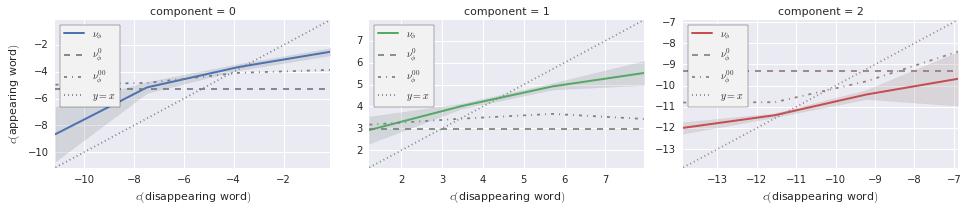

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2539 (cluster-unique) substitutions, but the PCA is in fact computed on 931 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.